# GALAH DR3 Tutorial 4: Plotting synthetic spectra

#### Author(s):
Sven Buder (SB, sven.buder@anu.edu.au)

In [8]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
from astropy.table import Table
from scipy.io.idl import readsav
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [9]:
galah_dr3 = Table.read('../catalogs/GALAH_DR3_main_200604_extended_caution_v2.fits')

In [10]:
def plot_sme_results(sobject_id, mode='Sp', directory='./', ylim=(-0.1,1.1)):
    """
    This function will read in the SME file for a given sobject_id
    and plot the observation and synthesis for all individual segments
    
    INPUT:
    sobject_id - GALAH identifier
    mode - used mode for calculations, e.g. Sp, Fe, or Mg5711
    directory - path where the sme files can be found
    
    OUTPUT:
    plt.figure and saved figure as PNG if savefig==True    
    """
    
    galah_dr3_index = np.where(galah_dr3['sobject_id'] == int(sobject_id))[0]
    if len(galah_dr3_index) == 1:
        galah_dr3_index = galah_dr3_index[0]
    else:
        print('No Correct Entry in DR3 Found')
            
    dr3_data = galah_dr3[galah_dr3_index]
    wg4_field = (str(dr3_data['wg4_field'])+'_lbol').replace(' ','')
    
    try:
        sme = readsav(directory+wg4_field+'_'+str(sobject_id)+'_DR3_'+mode+'_SME.out').sme[0]
    except:
        print('Could not find SME files here:')
        print(directory+wg4_field+'_'+str(sobject_id)+'_DR3_'+mode+'_SME.out')
        try:
            sme = readsav('sme_output/'+str(sobject_id)[:6]+'/'+str(sobject_id)+'/'+wg4_field+'_'+str(sobject_id)+'_DR3_'+mode+'_SME.out').sme[0]
        except:
            print('Could also not find SME files here:')
            print('sme_output/'+str(sobject_id)[:6]+'/'+str(sobject_id)+'/'+wg4_field+'_'+str(sobject_id)+'_DR3_'+mode+'_SME.out')

    with PdfPages(wg4_field+'_'+str(sobject_id)+'_DR3_'+mode+'.pdf') as pdf:
        for each_index, each in enumerate(sme['WIND']):

            if each_index==0:
                in_segment = np.arange(0,sme['WIND'][0]+1)
            else:
                in_segment = np.arange(sme['WIND'][each_index-1]+1,sme['WIND'][each_index]+1)
            if each_index%2:
                ax=ax2
            else:
                f, (ax1, ax2) = plt.subplots(2,1,figsize=(11.75, 8.25))
                ax1.set_xlabel('Wavelength [Å]')
                ax1.set_ylabel('Flux [norm.]')
                ax1.set_ylim(ylim)
                ax1.set_title('MODE: '+mode+' for '+str(sobject_id)+': TEFF='+"{:.1f}".format(sme.teff)+' LOGG='+"{:.2f}".format(sme.grav)+' FEH='+"{:.2f}".format(sme.feh)+' VMIC='+"{:.2f}".format(sme.vmic)+' VSINI='+"{:.2f}".format(sme.vsini))
                ax2.set_xlabel('Wavelength [Å]')
                ax2.set_ylabel('Flux [norm.]')
                ax2.set_ylim(ylim)
                ax2.set_title('MODE: '+mode+' for '+str(sobject_id)+': TEFF='+"{:.1f}".format(sme.teff)+' LOGG='+"{:.2f}".format(sme.grav)+' FEH='+"{:.2f}".format(sme.feh)+' VMIC='+"{:.2f}".format(sme.vmic)+' VSINI='+"{:.2f}".format(sme.vsini))
                ax=ax1

            d_lambda = sme['WAVE'][in_segment][1]-sme['WAVE'][in_segment][0]-0.001
            line_mask = np.where(sme['MOB'][in_segment] == 1)[0]
            for each_line_mask in line_mask:
                ax.axvspan(
                    sme['WAVE'][in_segment][each_line_mask]-d_lambda/2.0,
                    sme['WAVE'][in_segment][each_line_mask]+d_lambda/2.0,
                    color='yellow',zorder=1
                )

                #ax.axvspan(sme['WAVE'][in_segment][line_mask]-d_lambda/2.0,sme['WAVE'][in_segment][line_mask]+d_lambda/2.0)

            ax.errorbar(
                sme['WAVE'][in_segment],
                sme['SOB'][in_segment],
                yerr = sme['UOB'][in_segment],
                color='k',fmt='o',zorder=2,ls='',capsize=3
            )
            ax.plot(
                sme['WAVE'][in_segment],
                sme['SMOD'][in_segment],
                color='r',zorder=3
            )

            if each_index%2:
                plt.tight_layout()
                plt.show()
                pdf.savefig(f)
                plt.close()
            else:
                plt.tight_layout()
                if each_index==len(sme['WIND'])-1:
                    plt.show()
                    pdf.savefig(f)
                    plt.close()

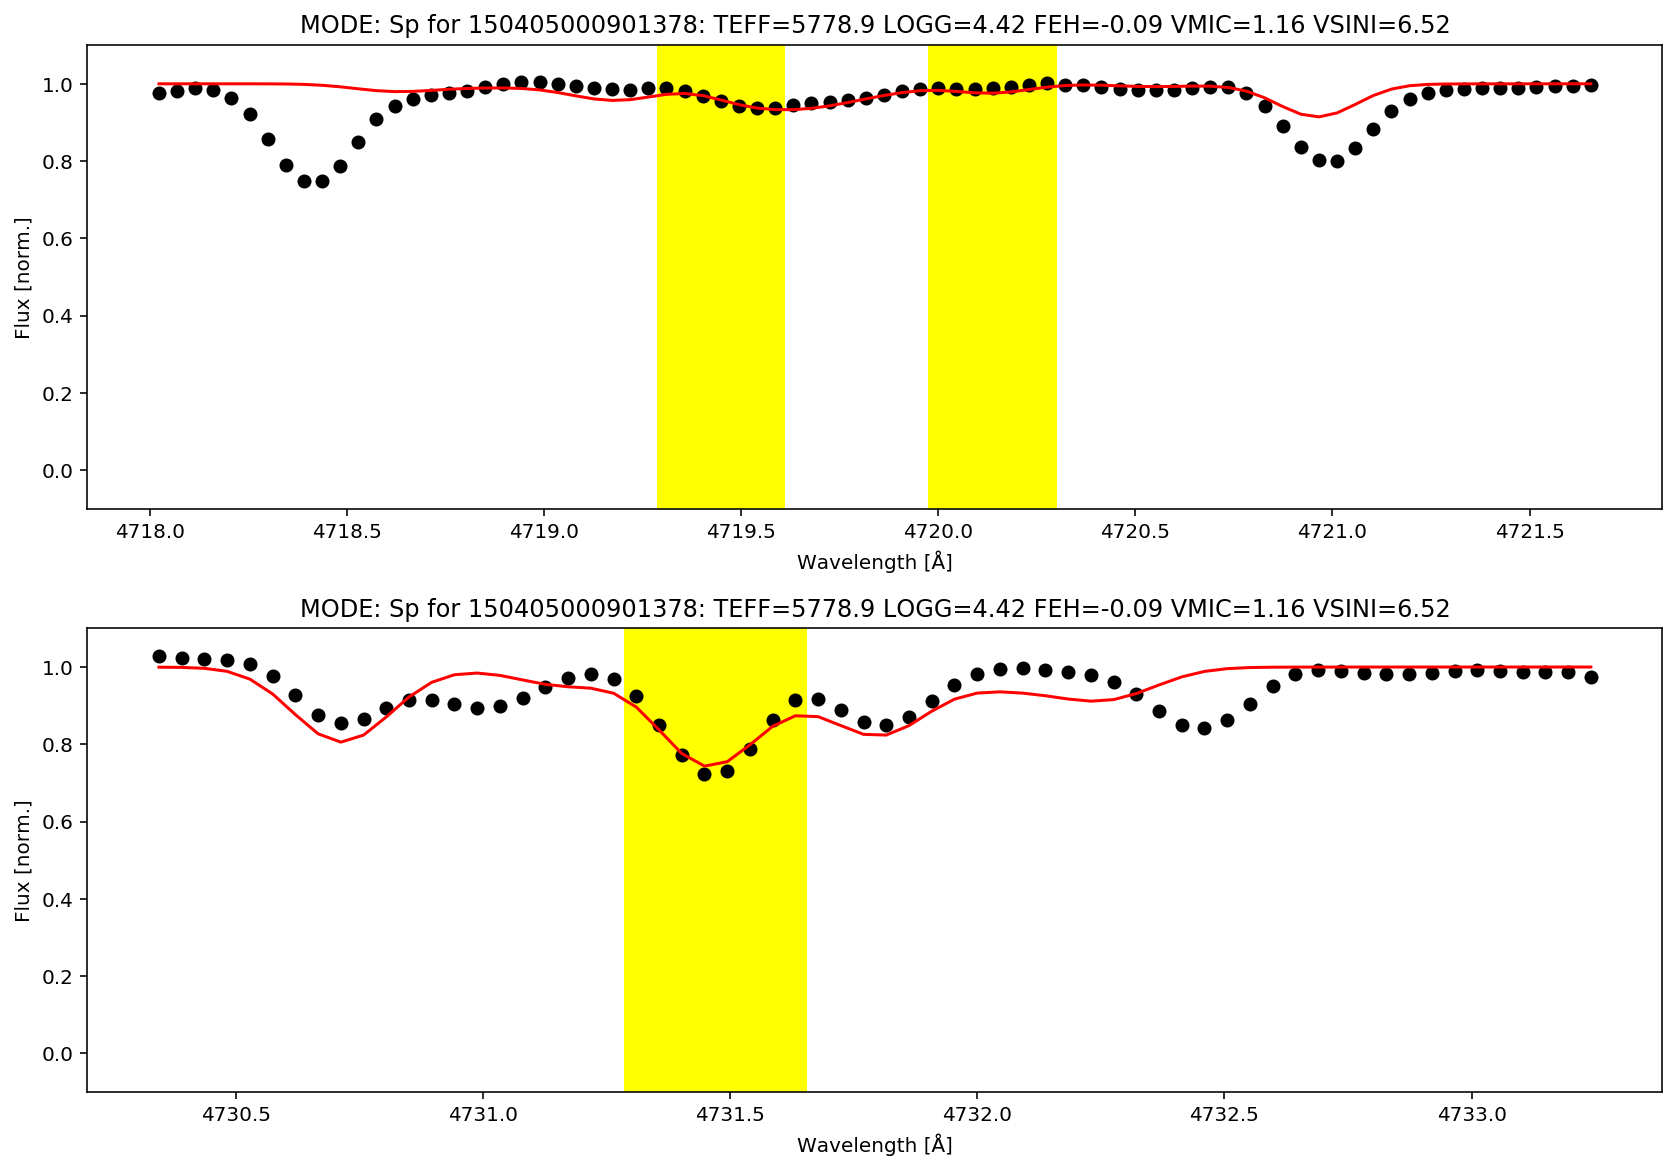

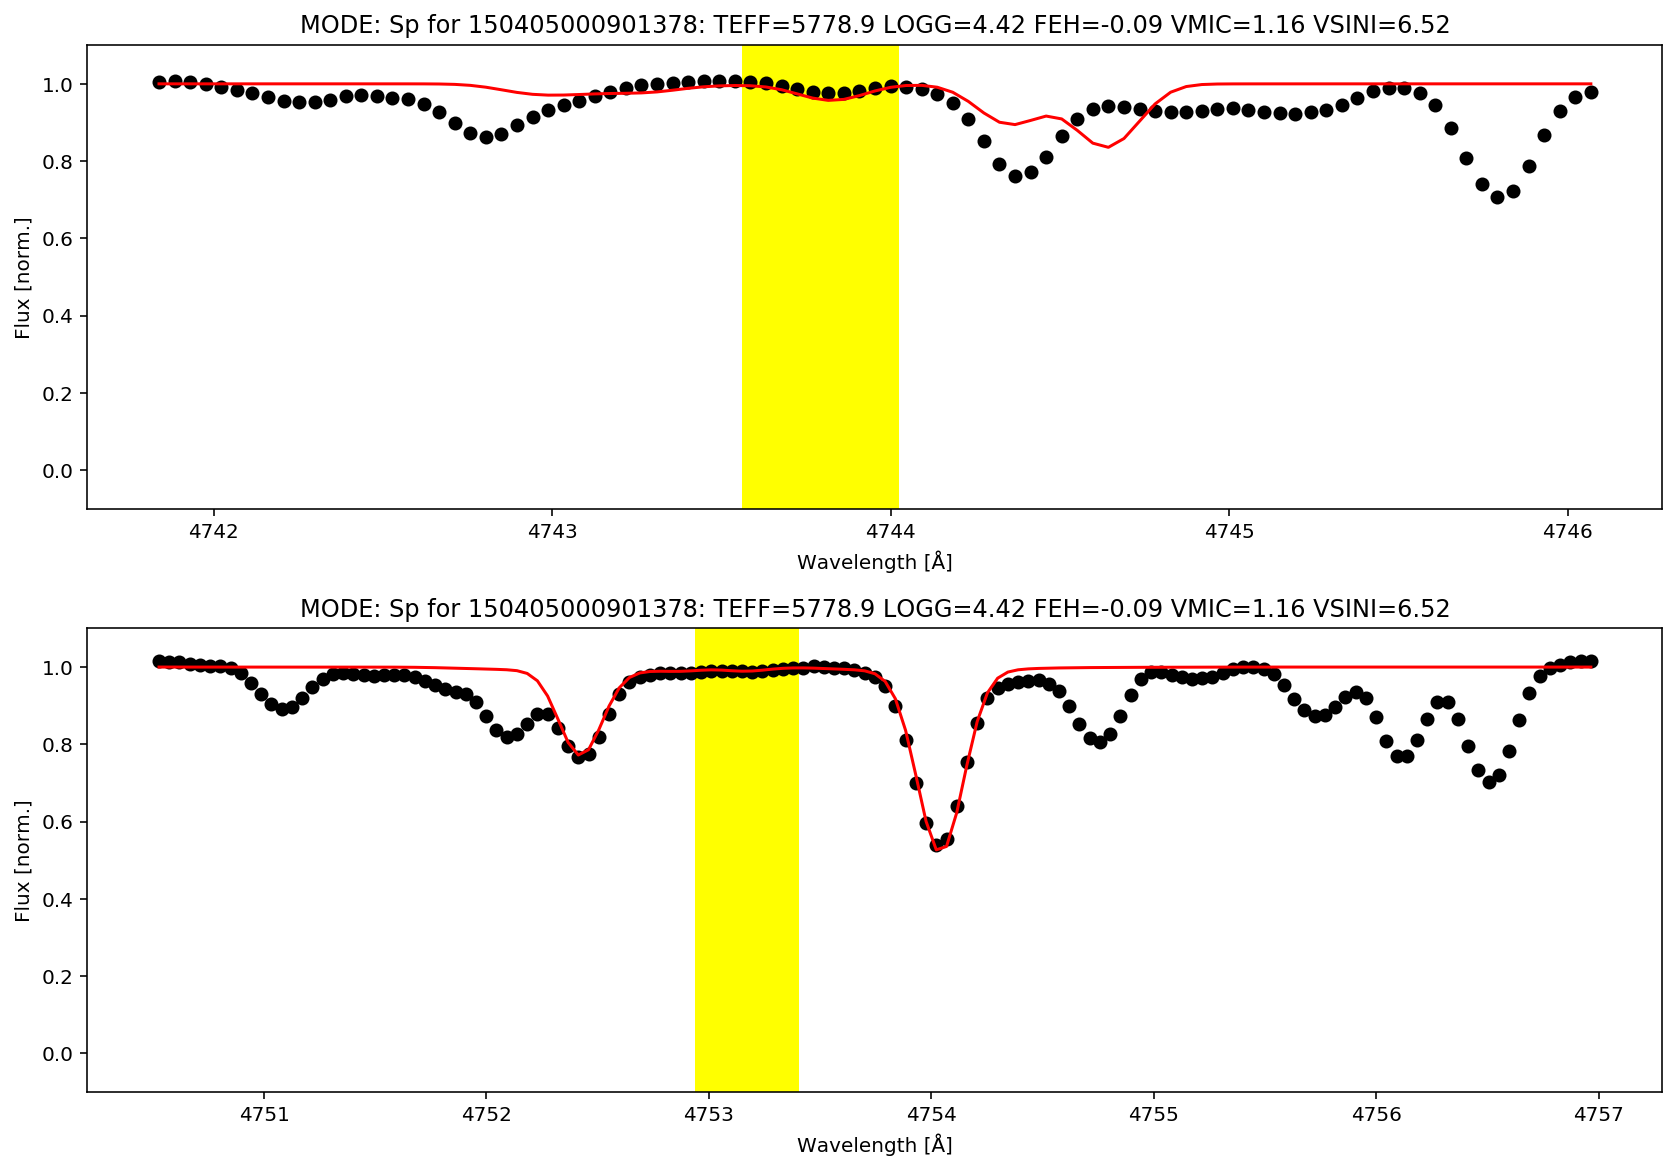

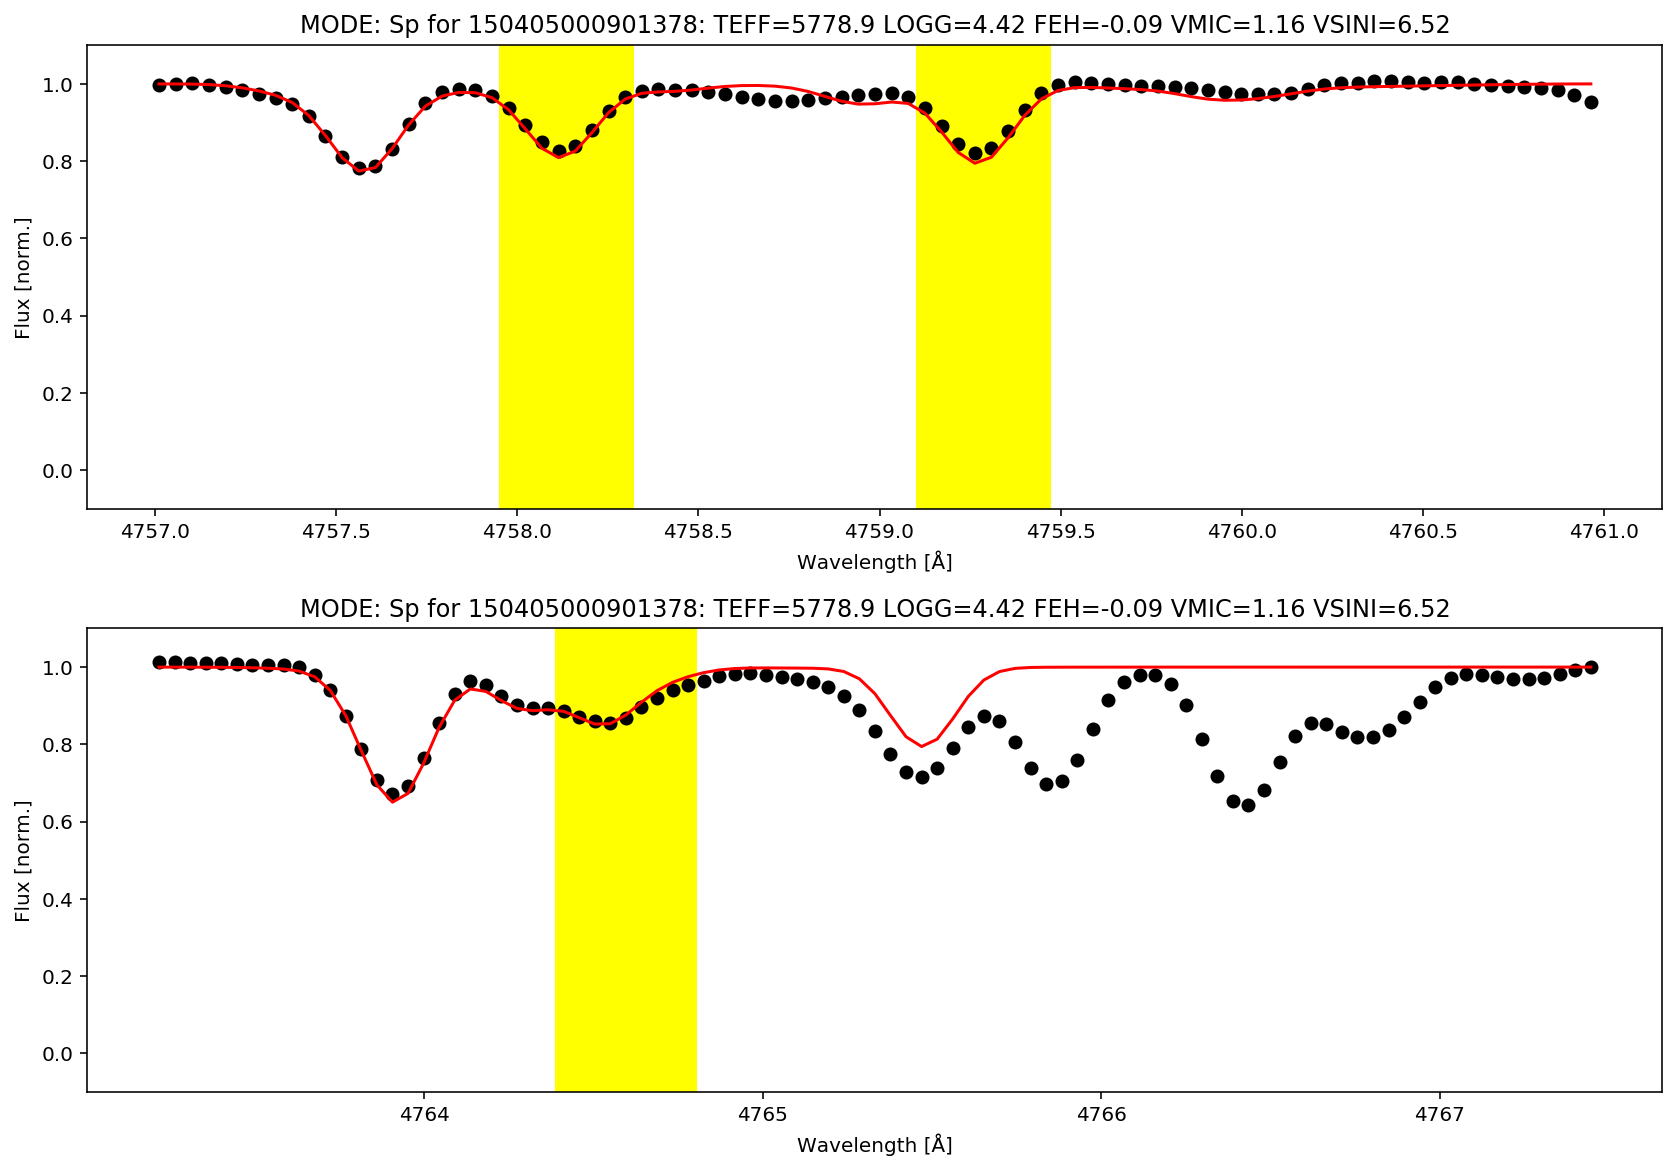

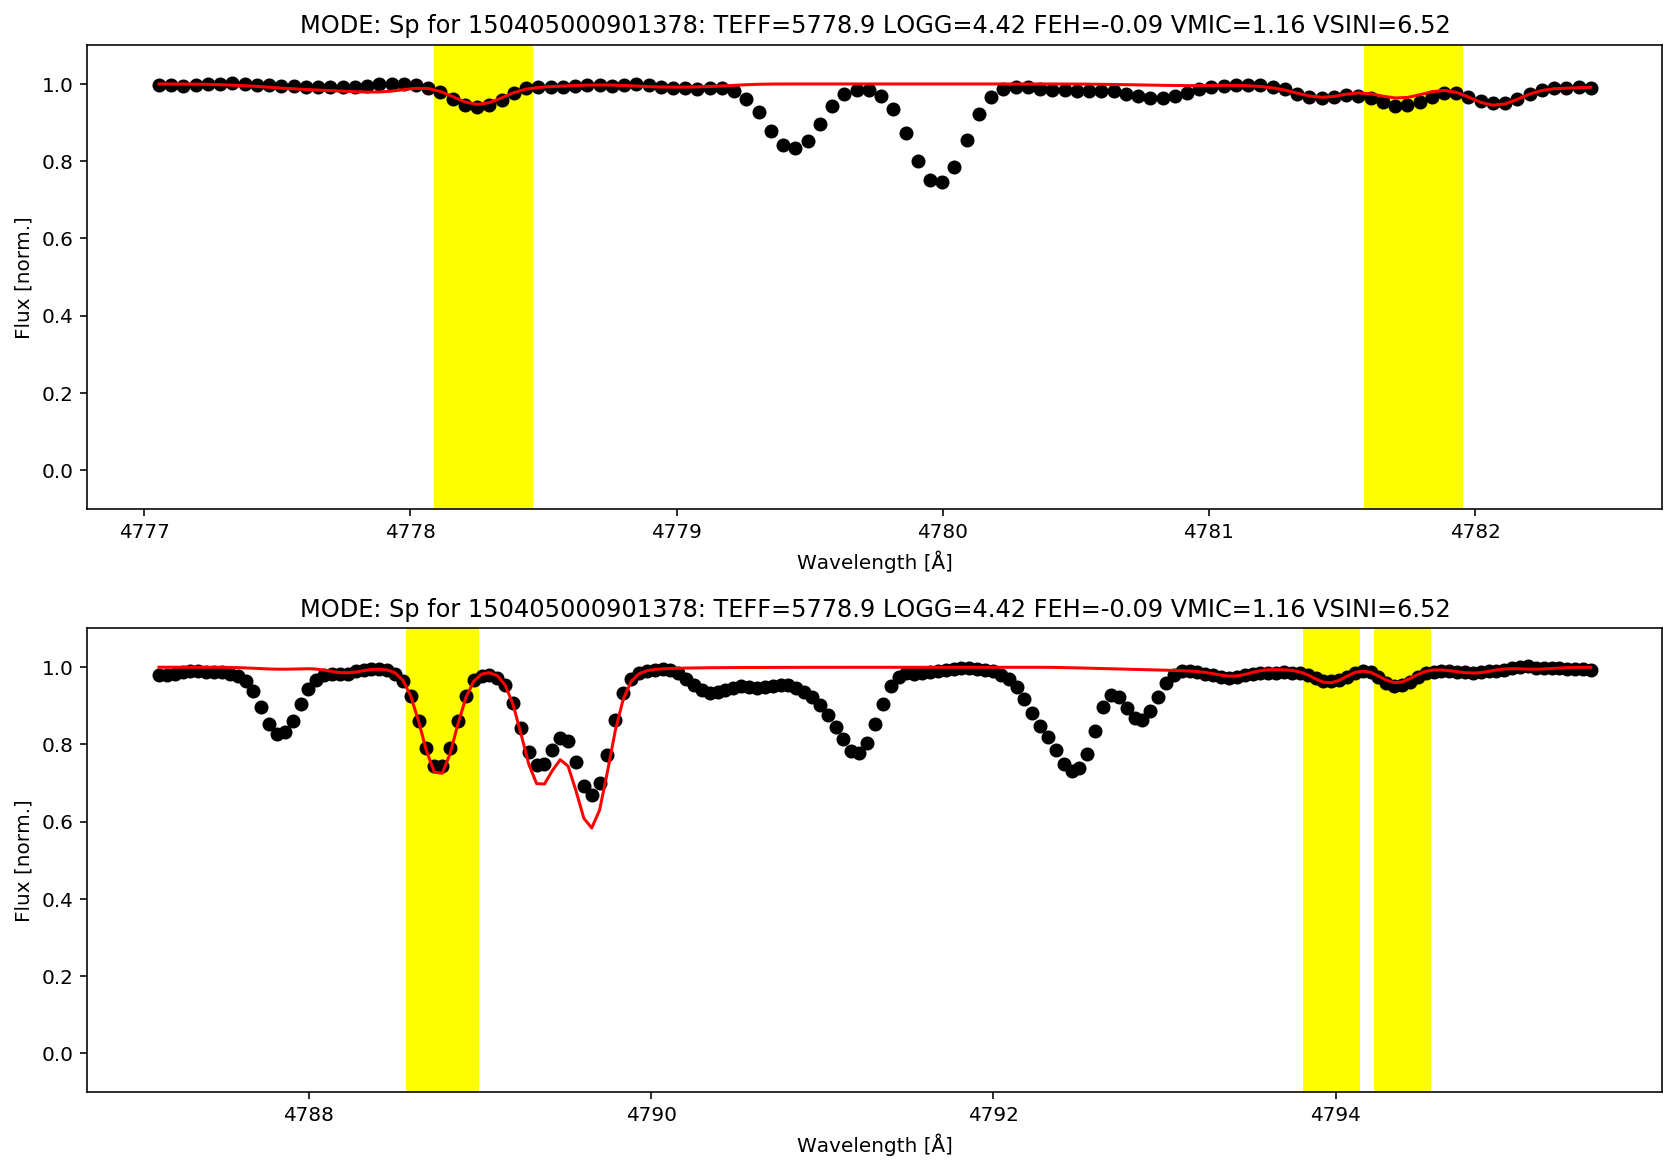

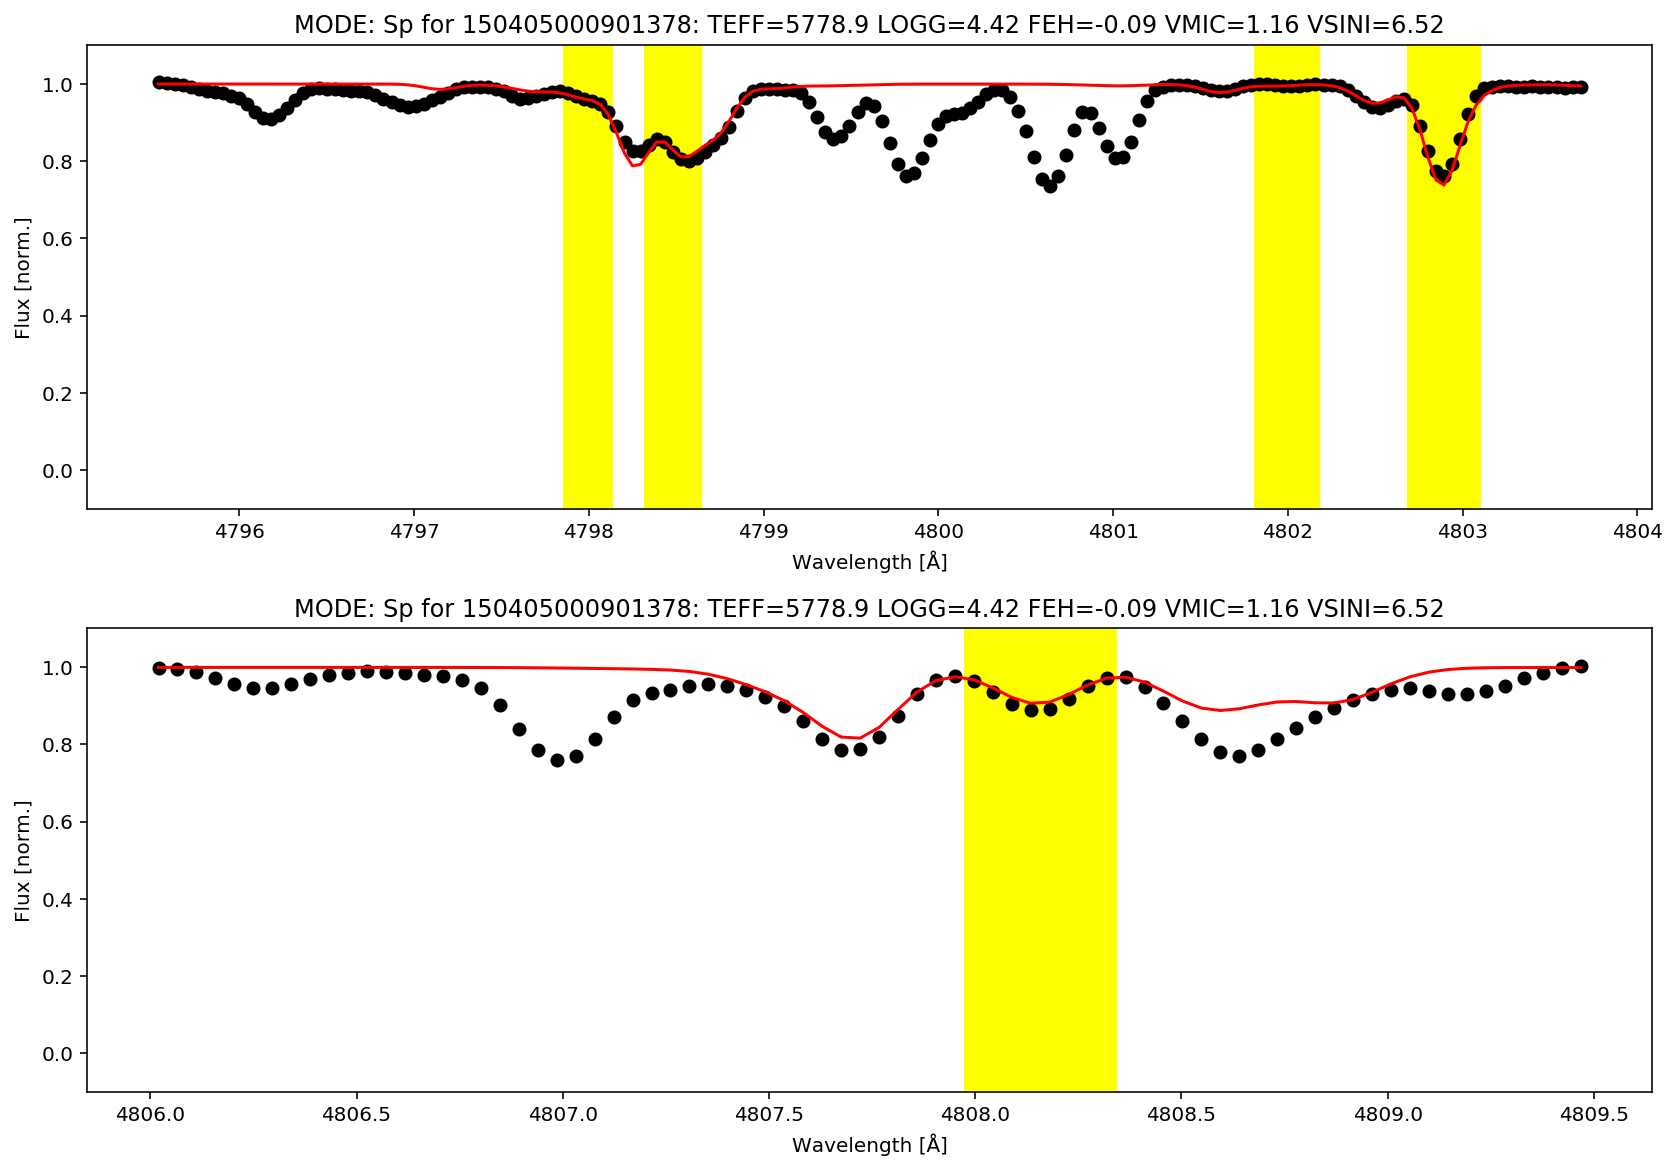

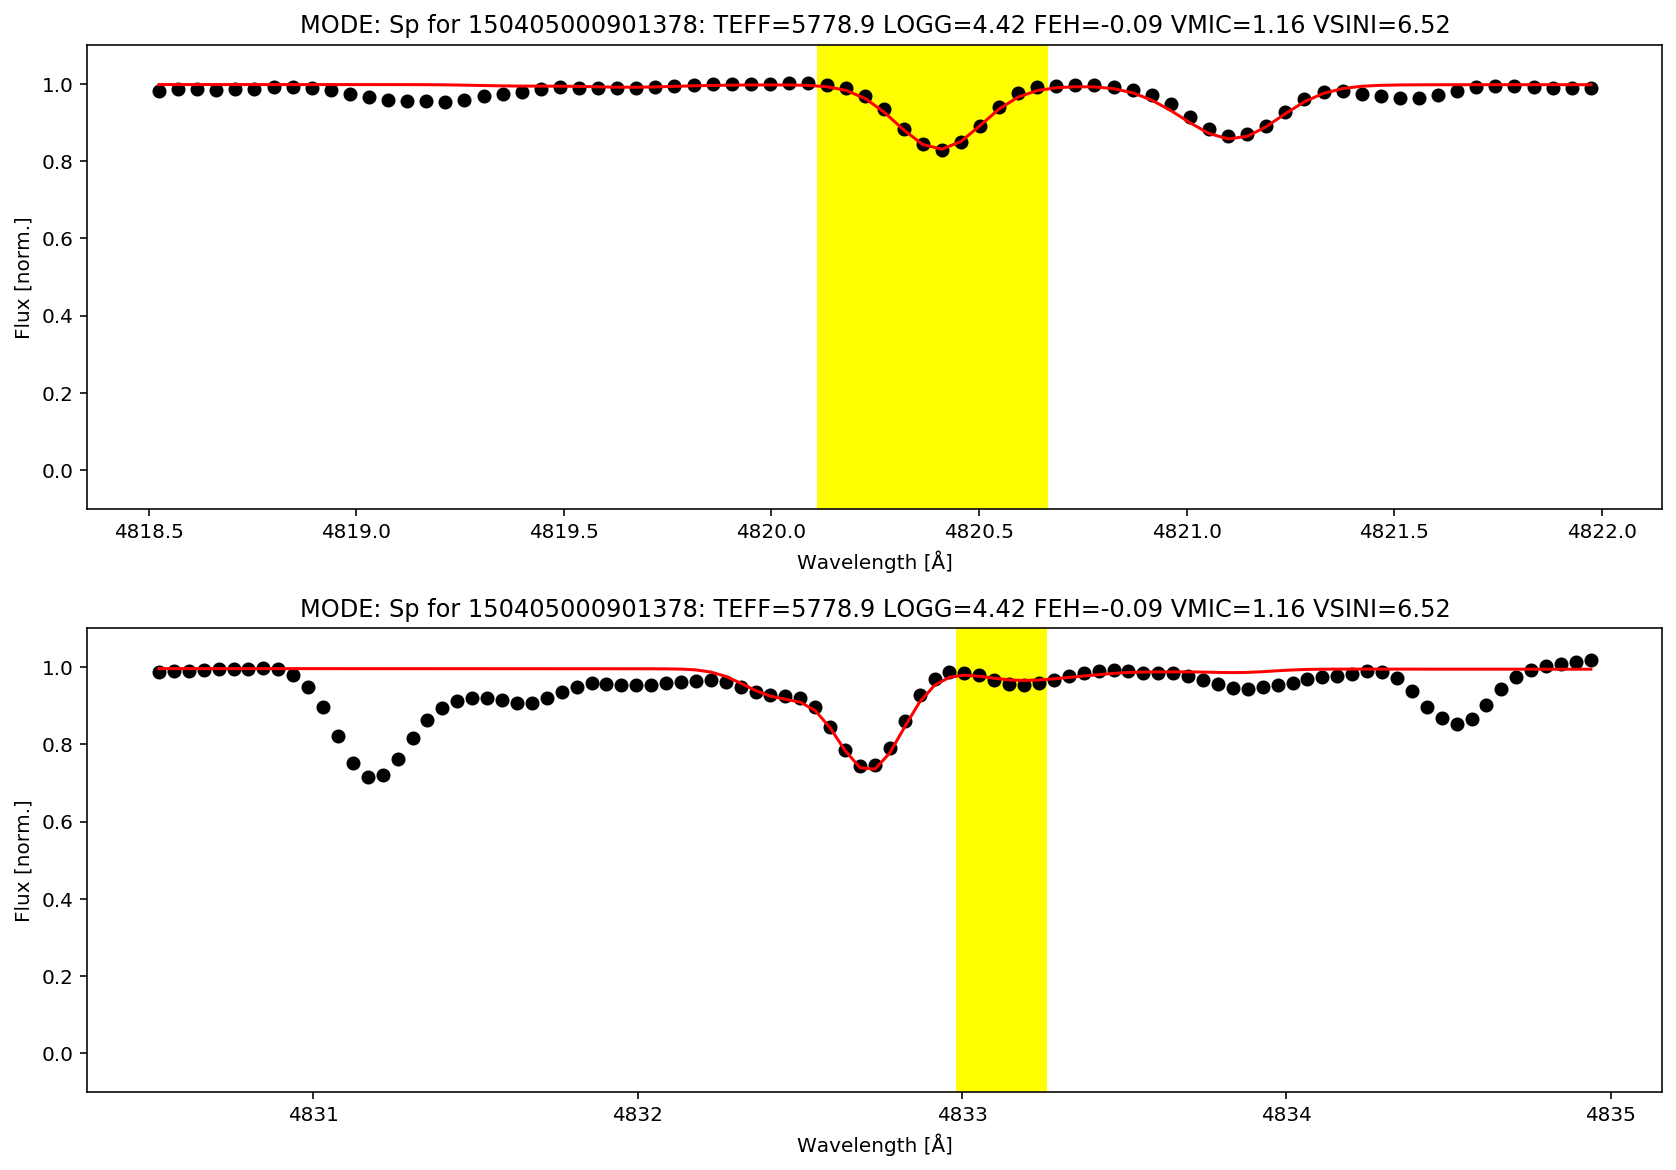

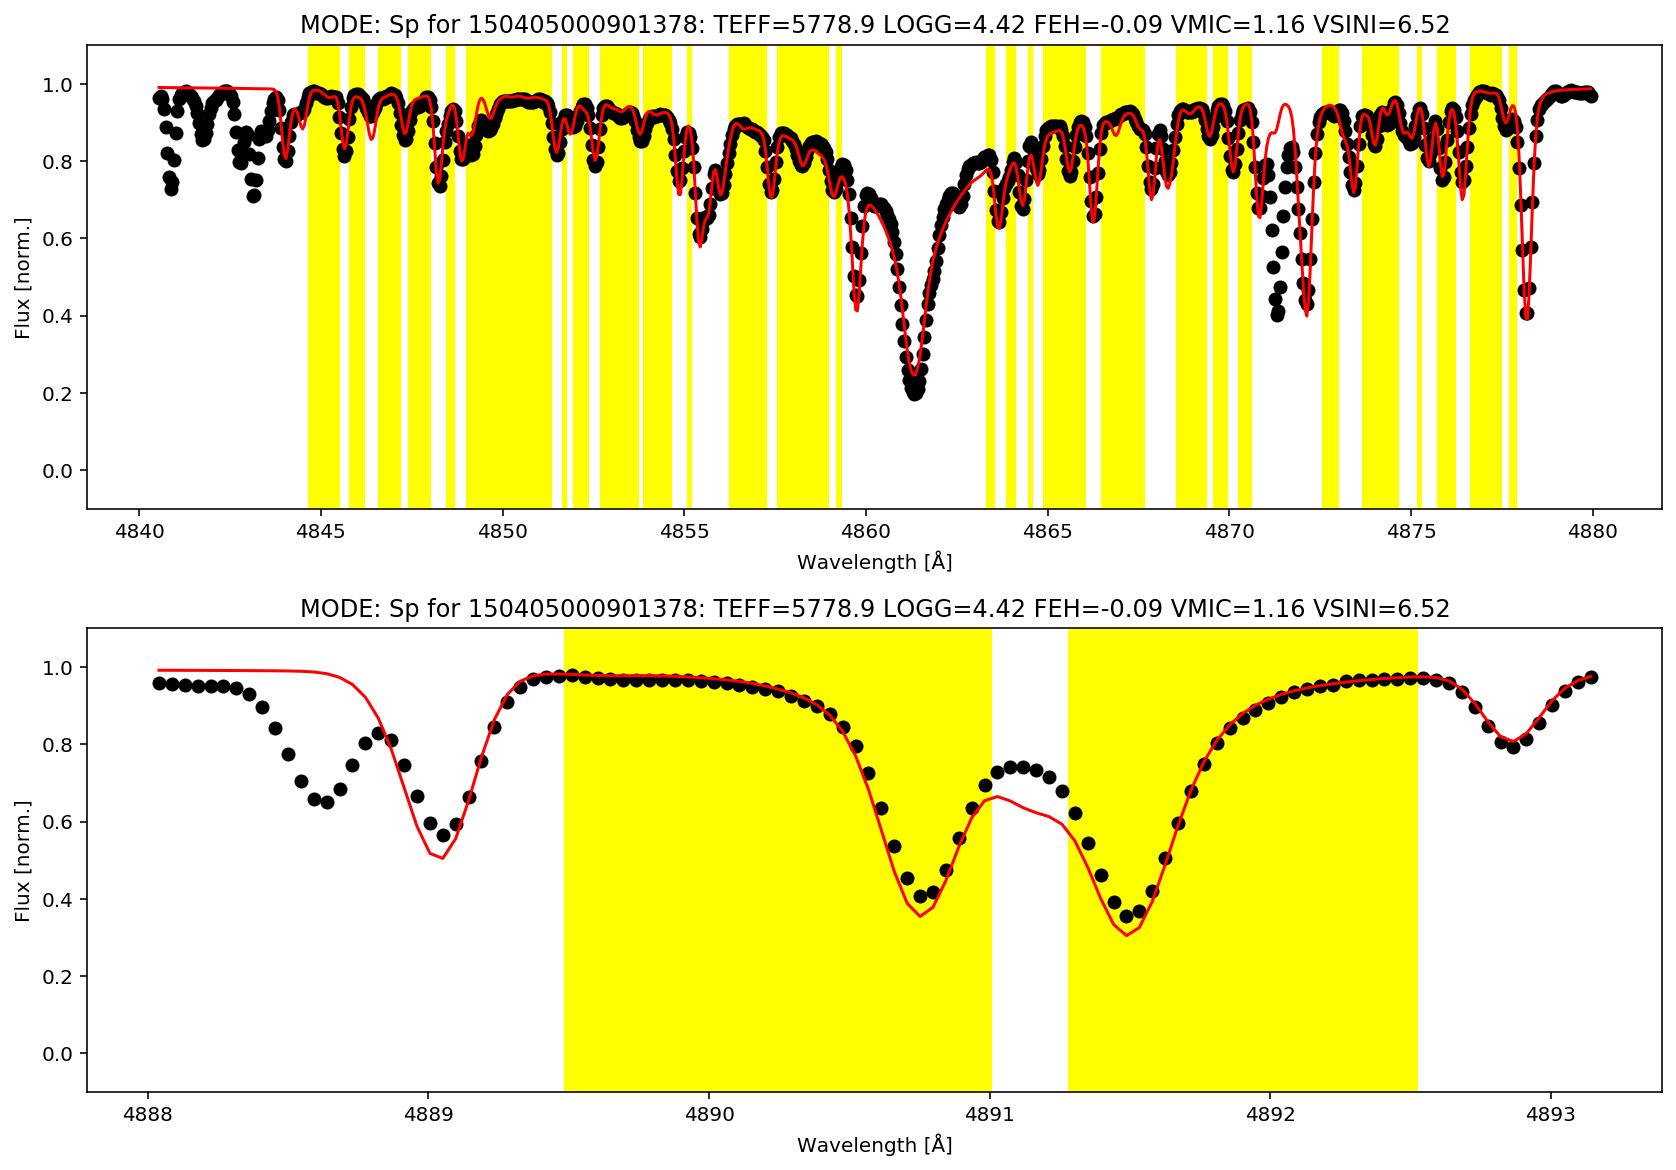

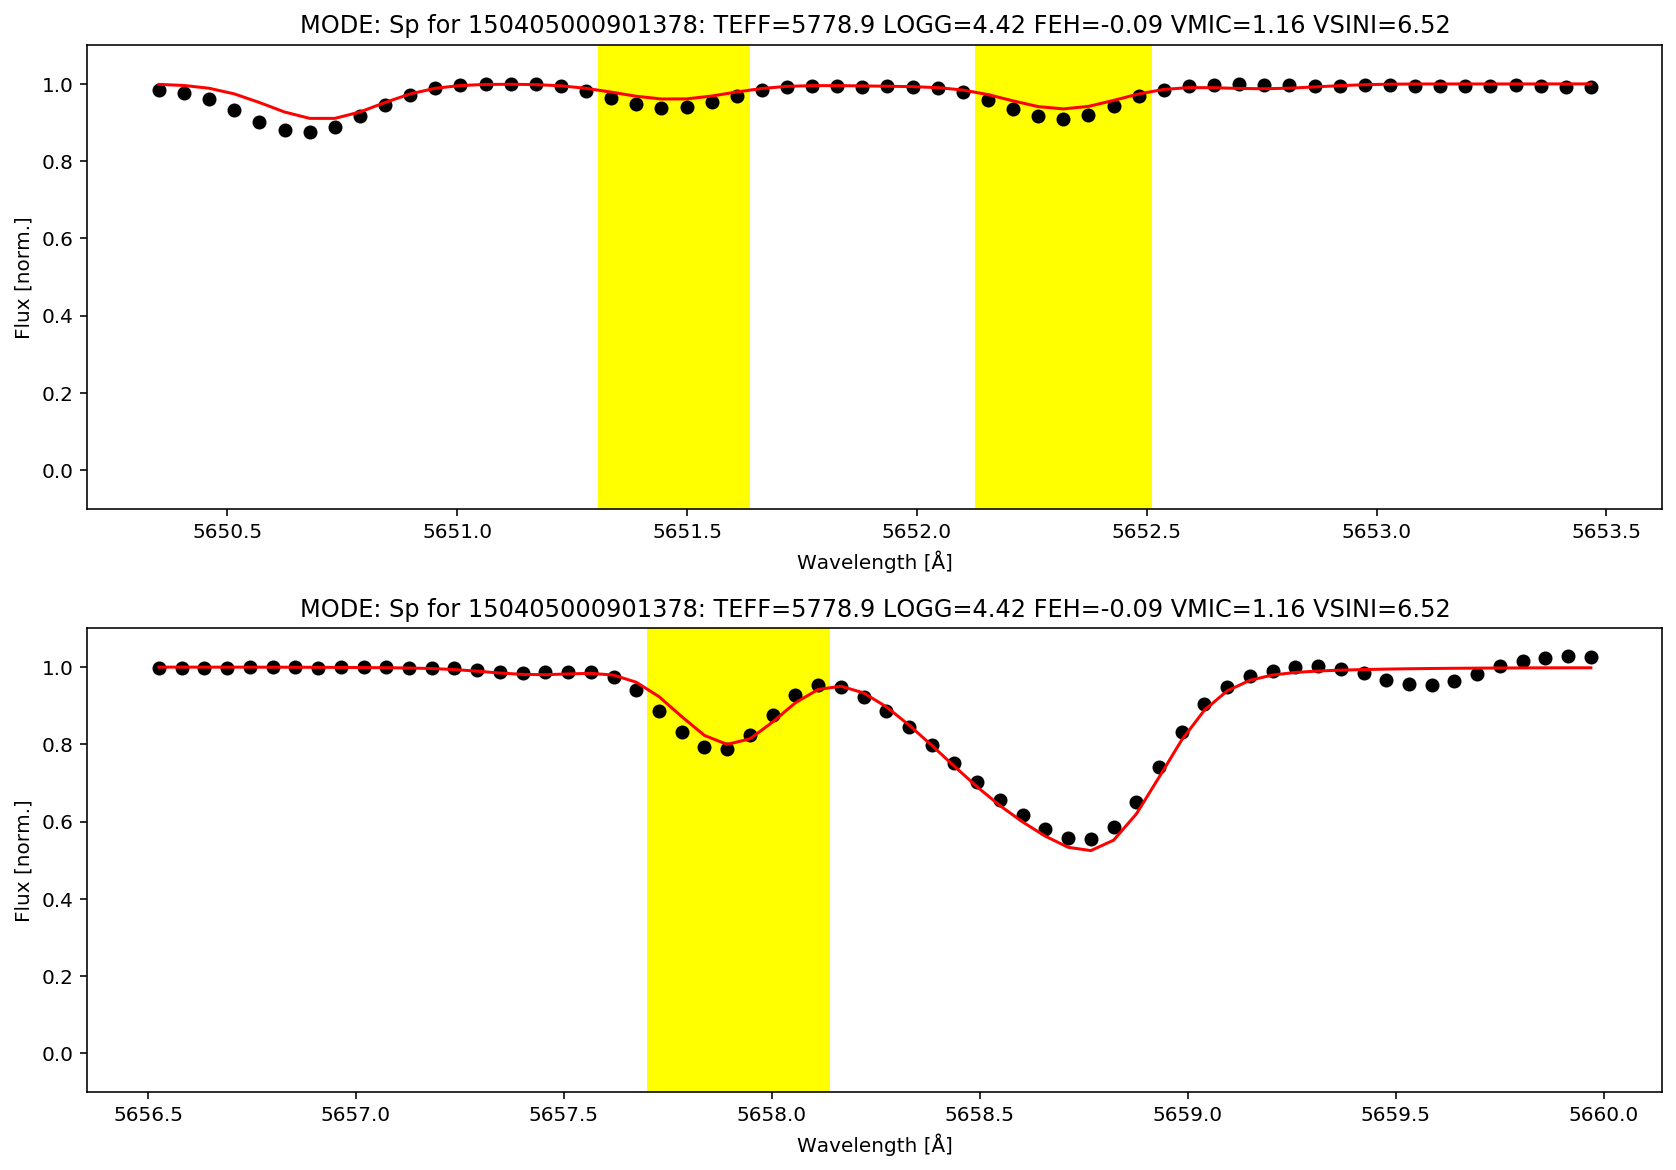

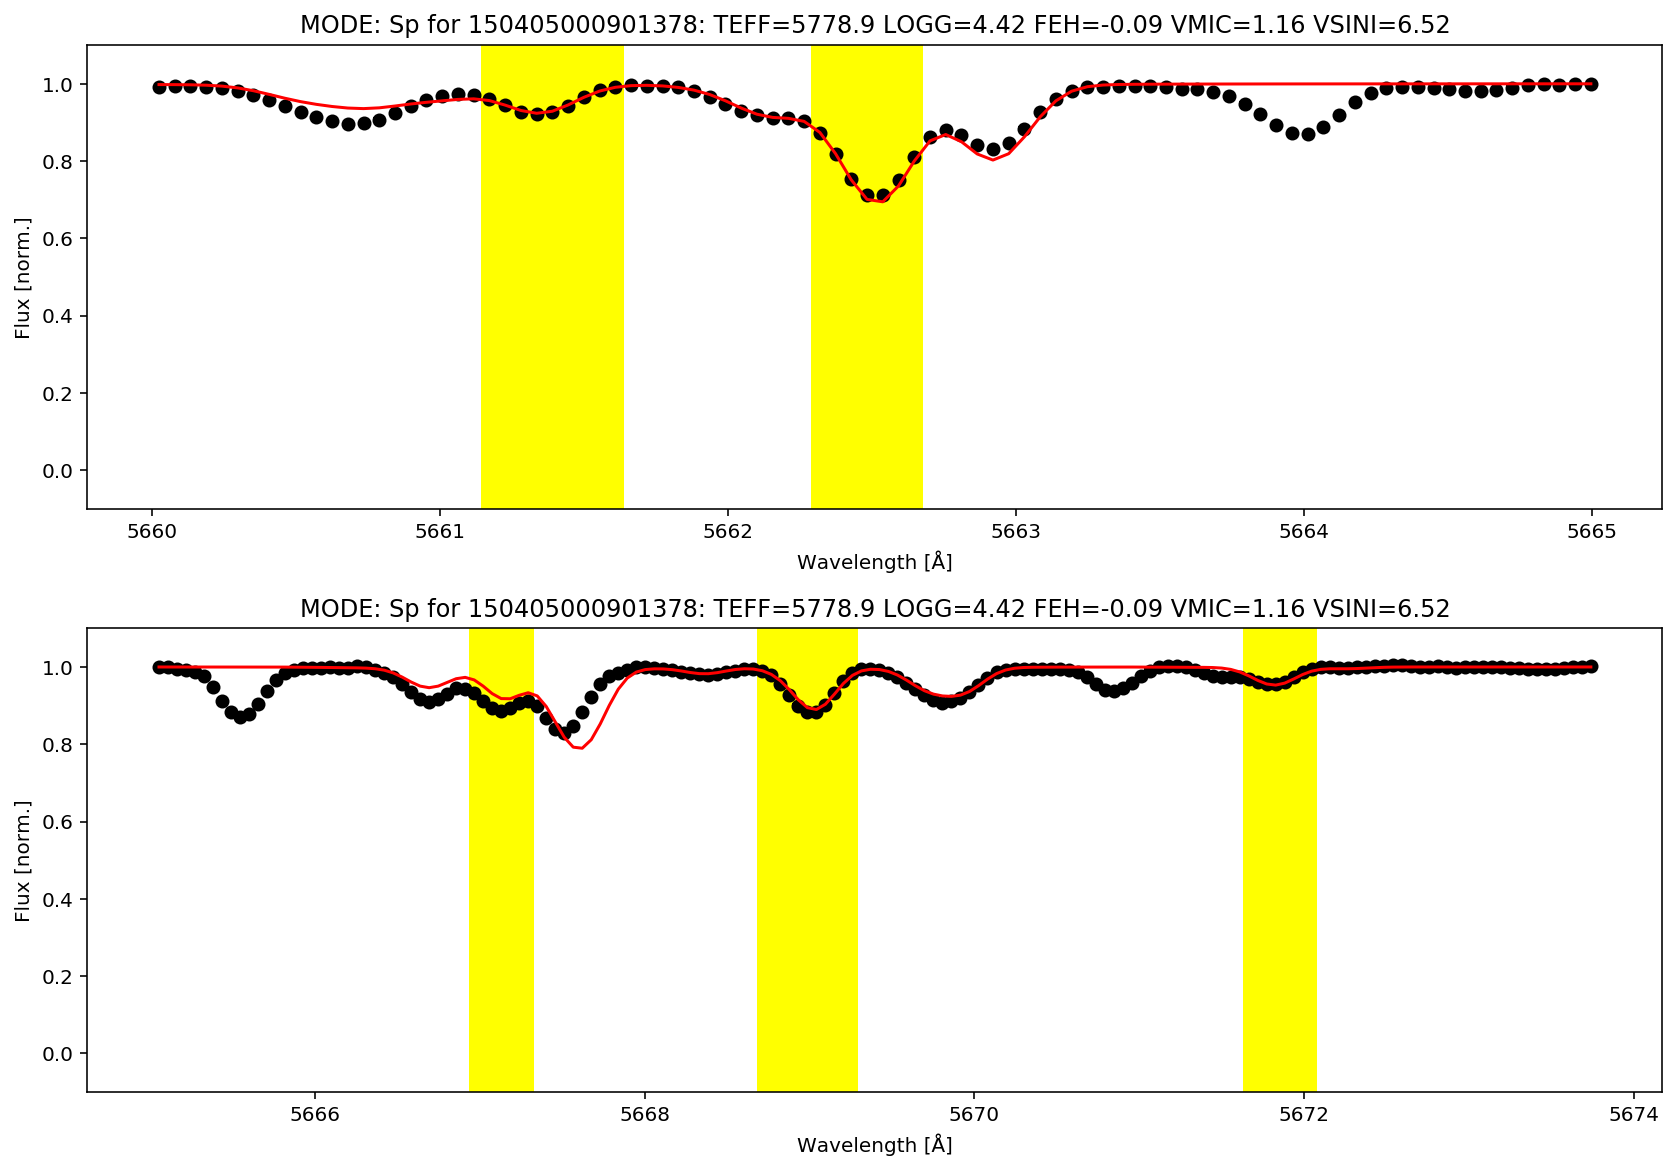

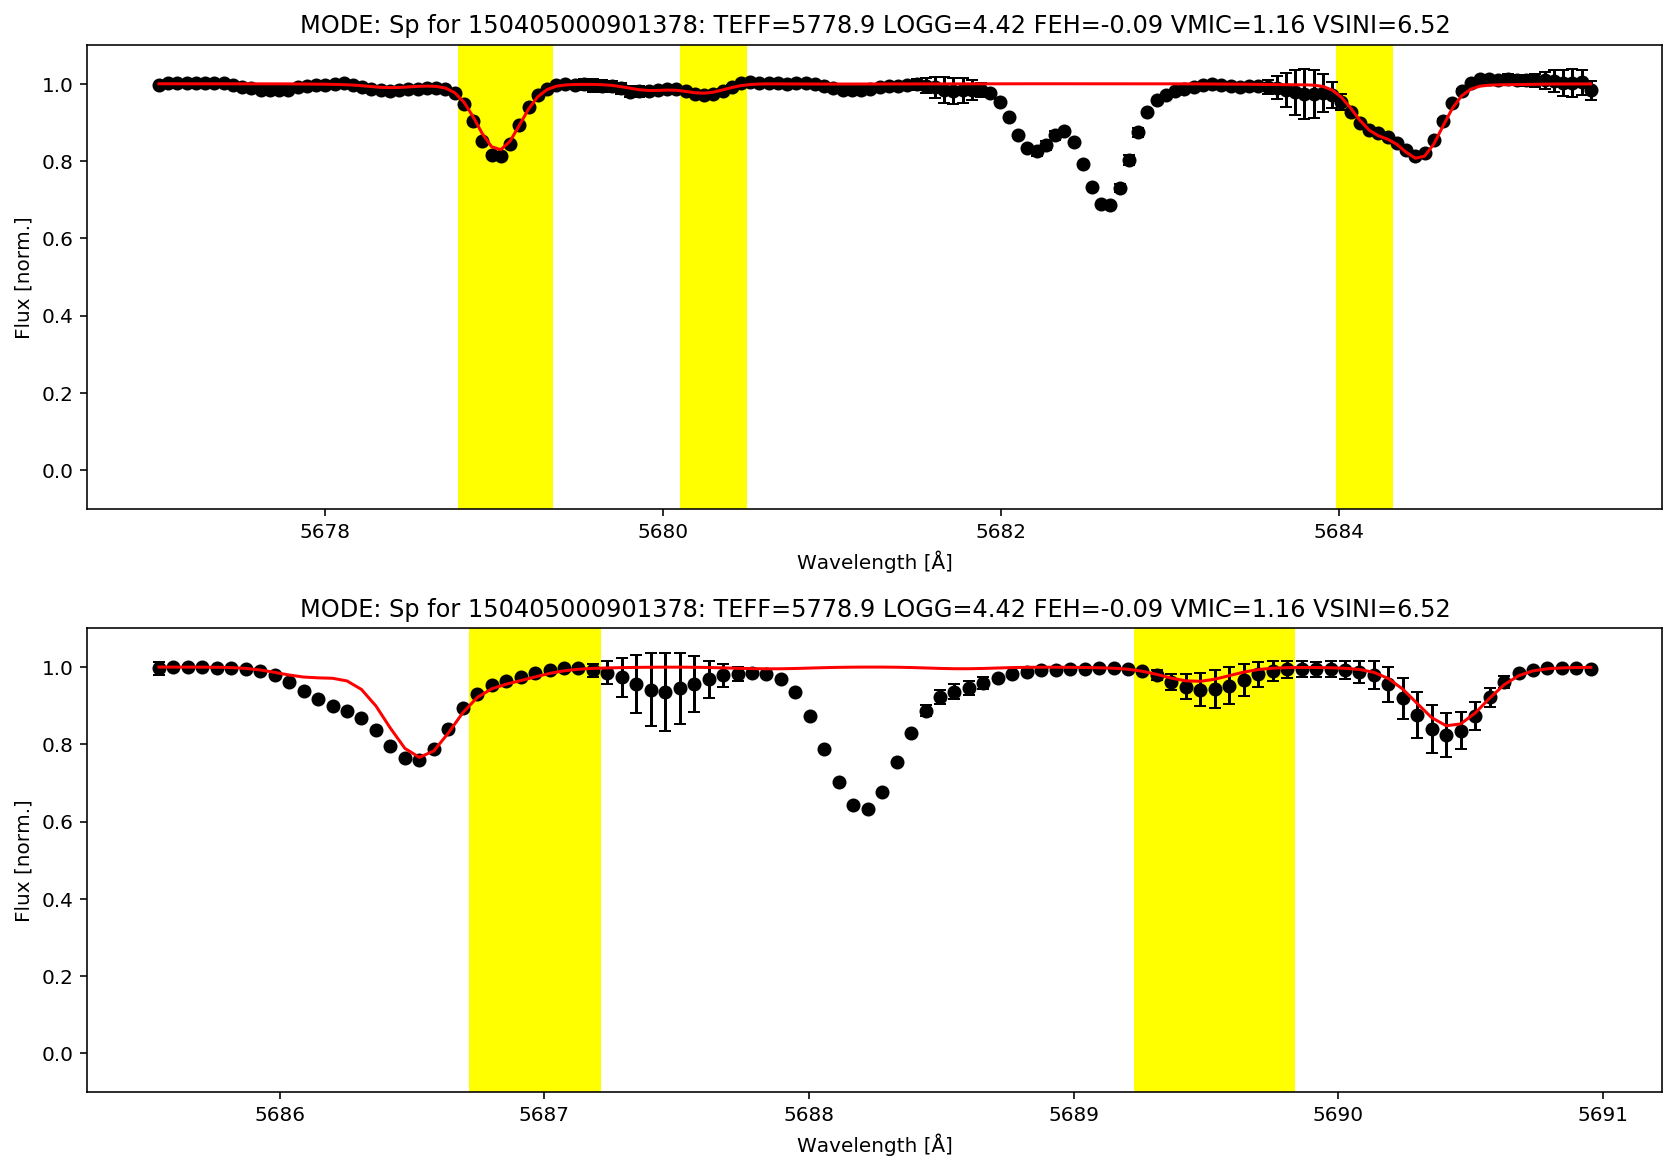

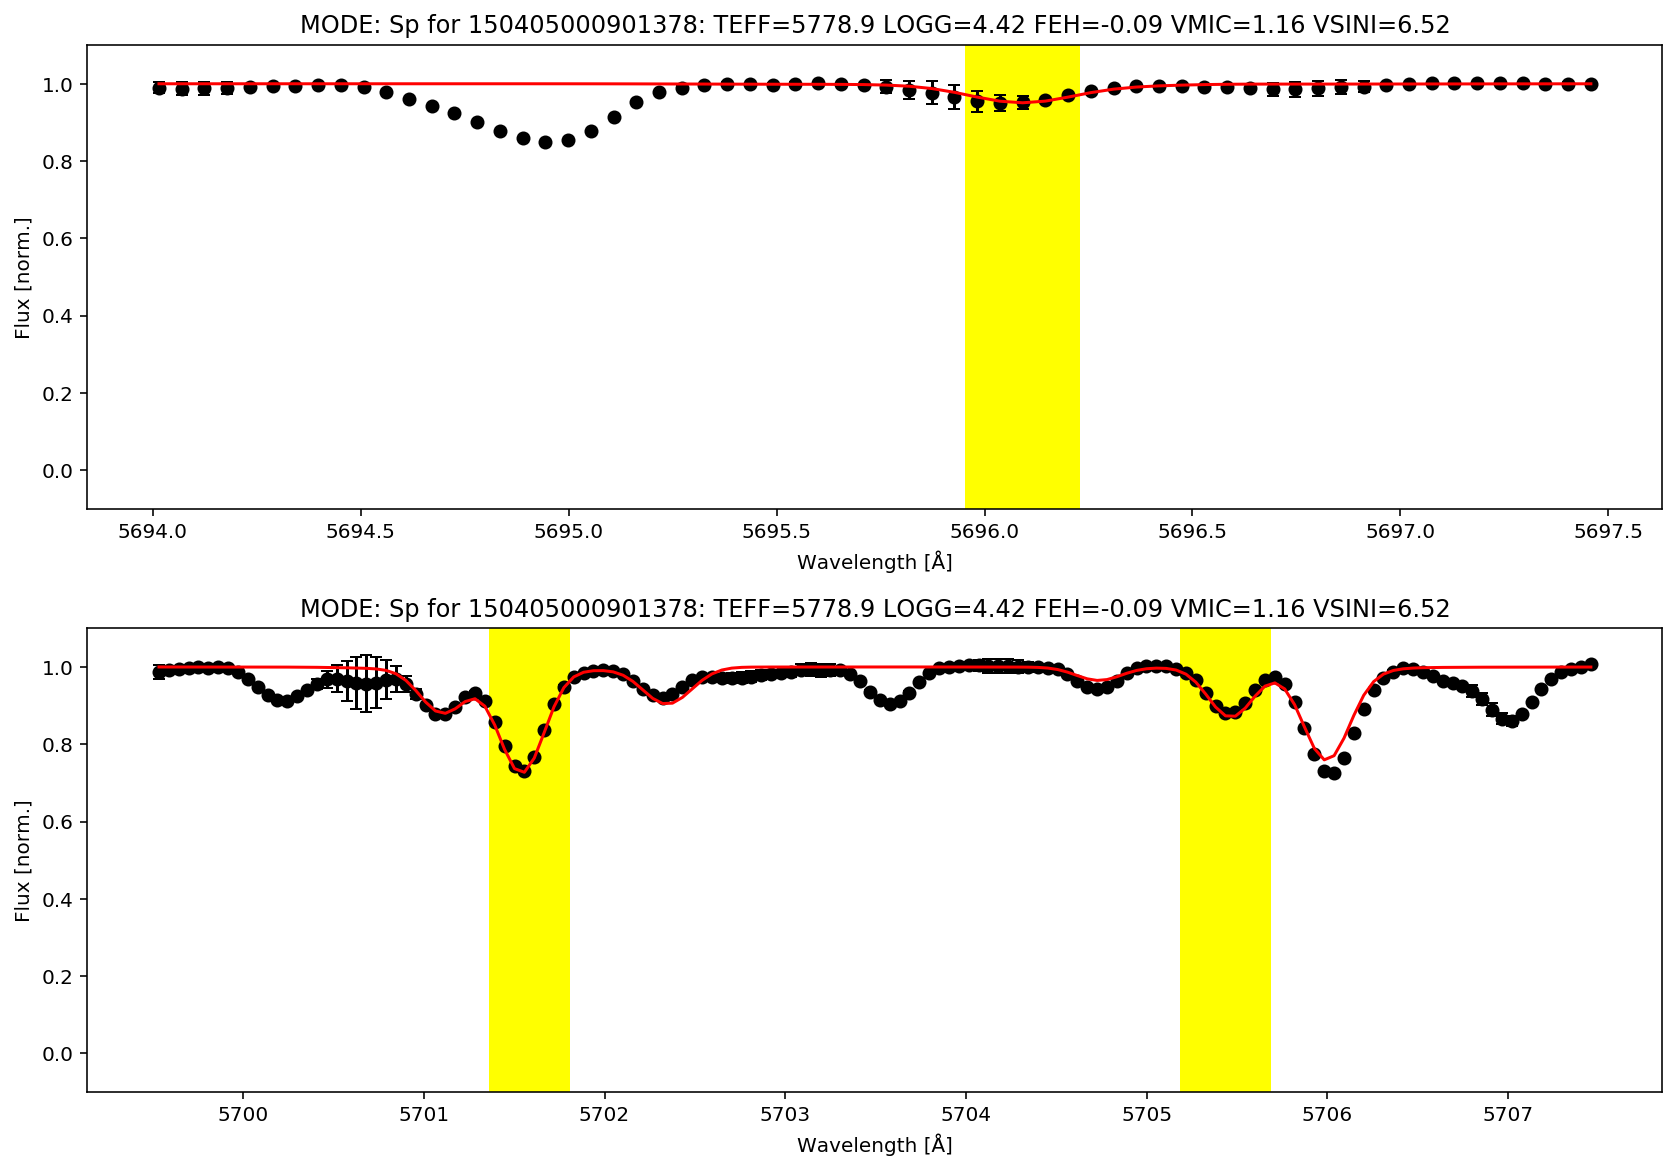

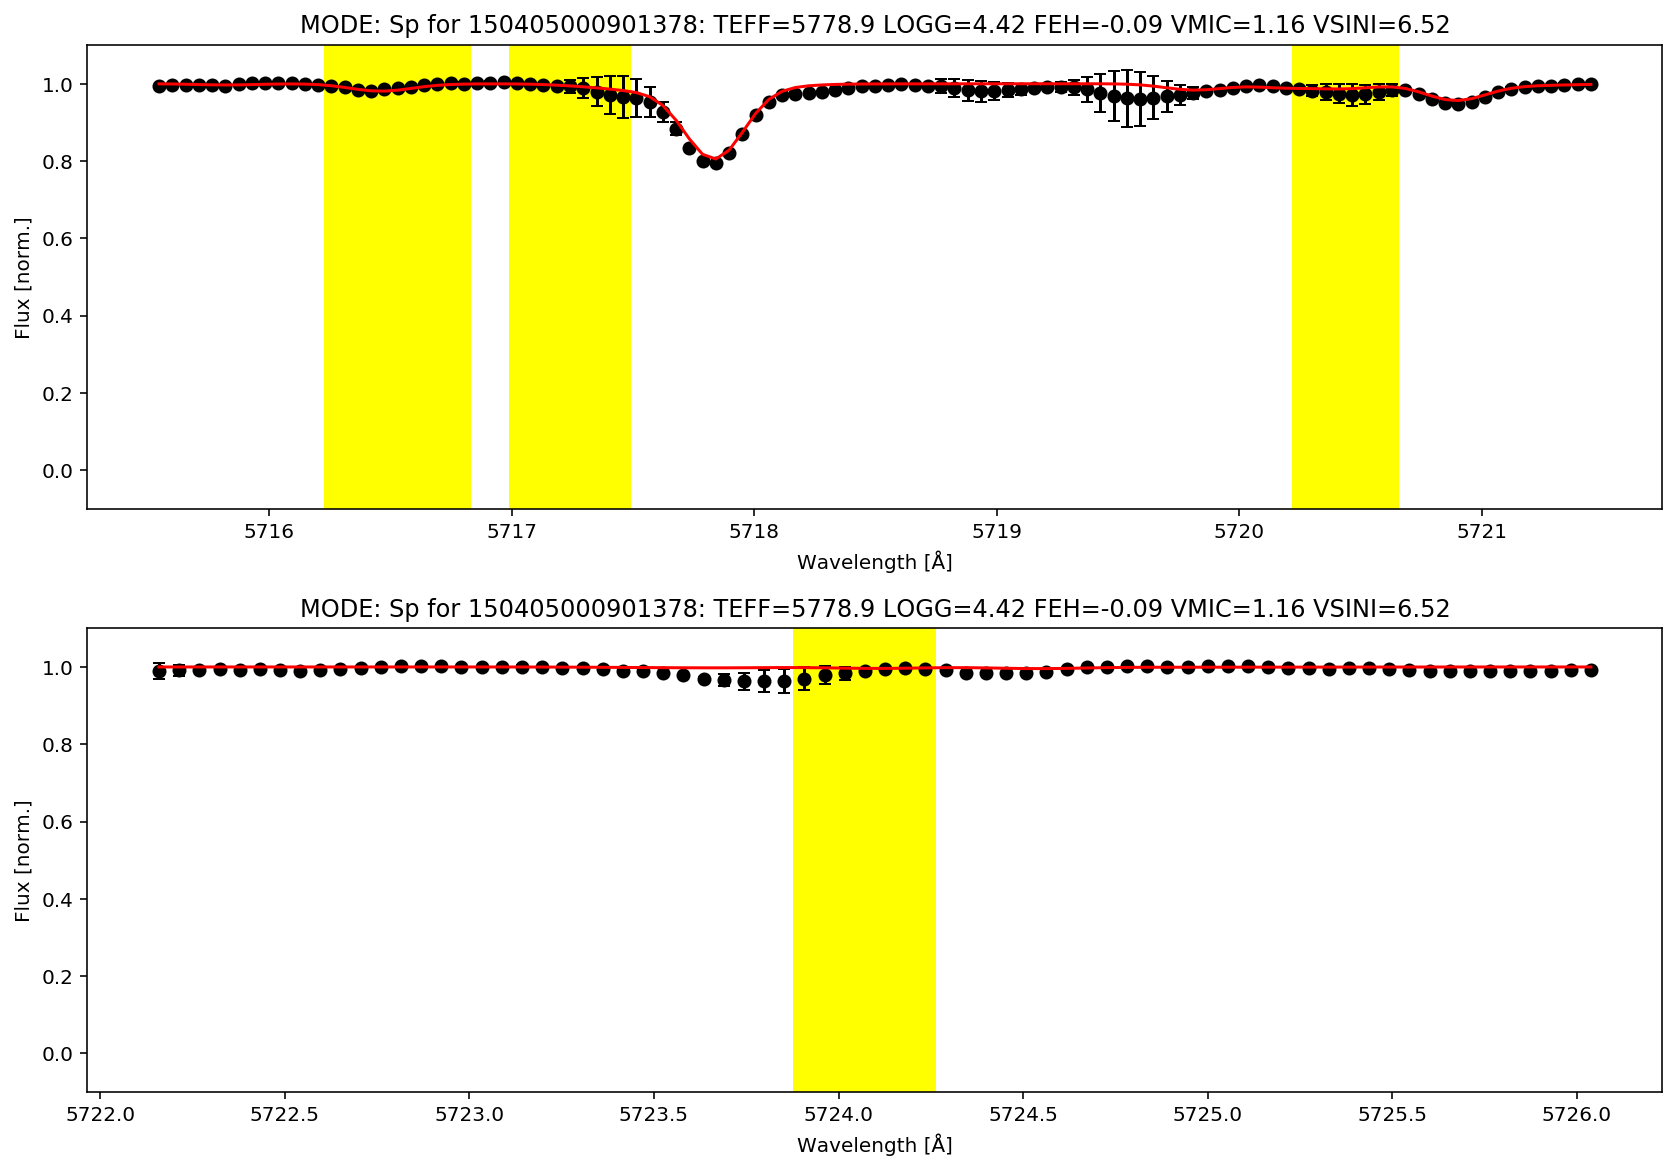

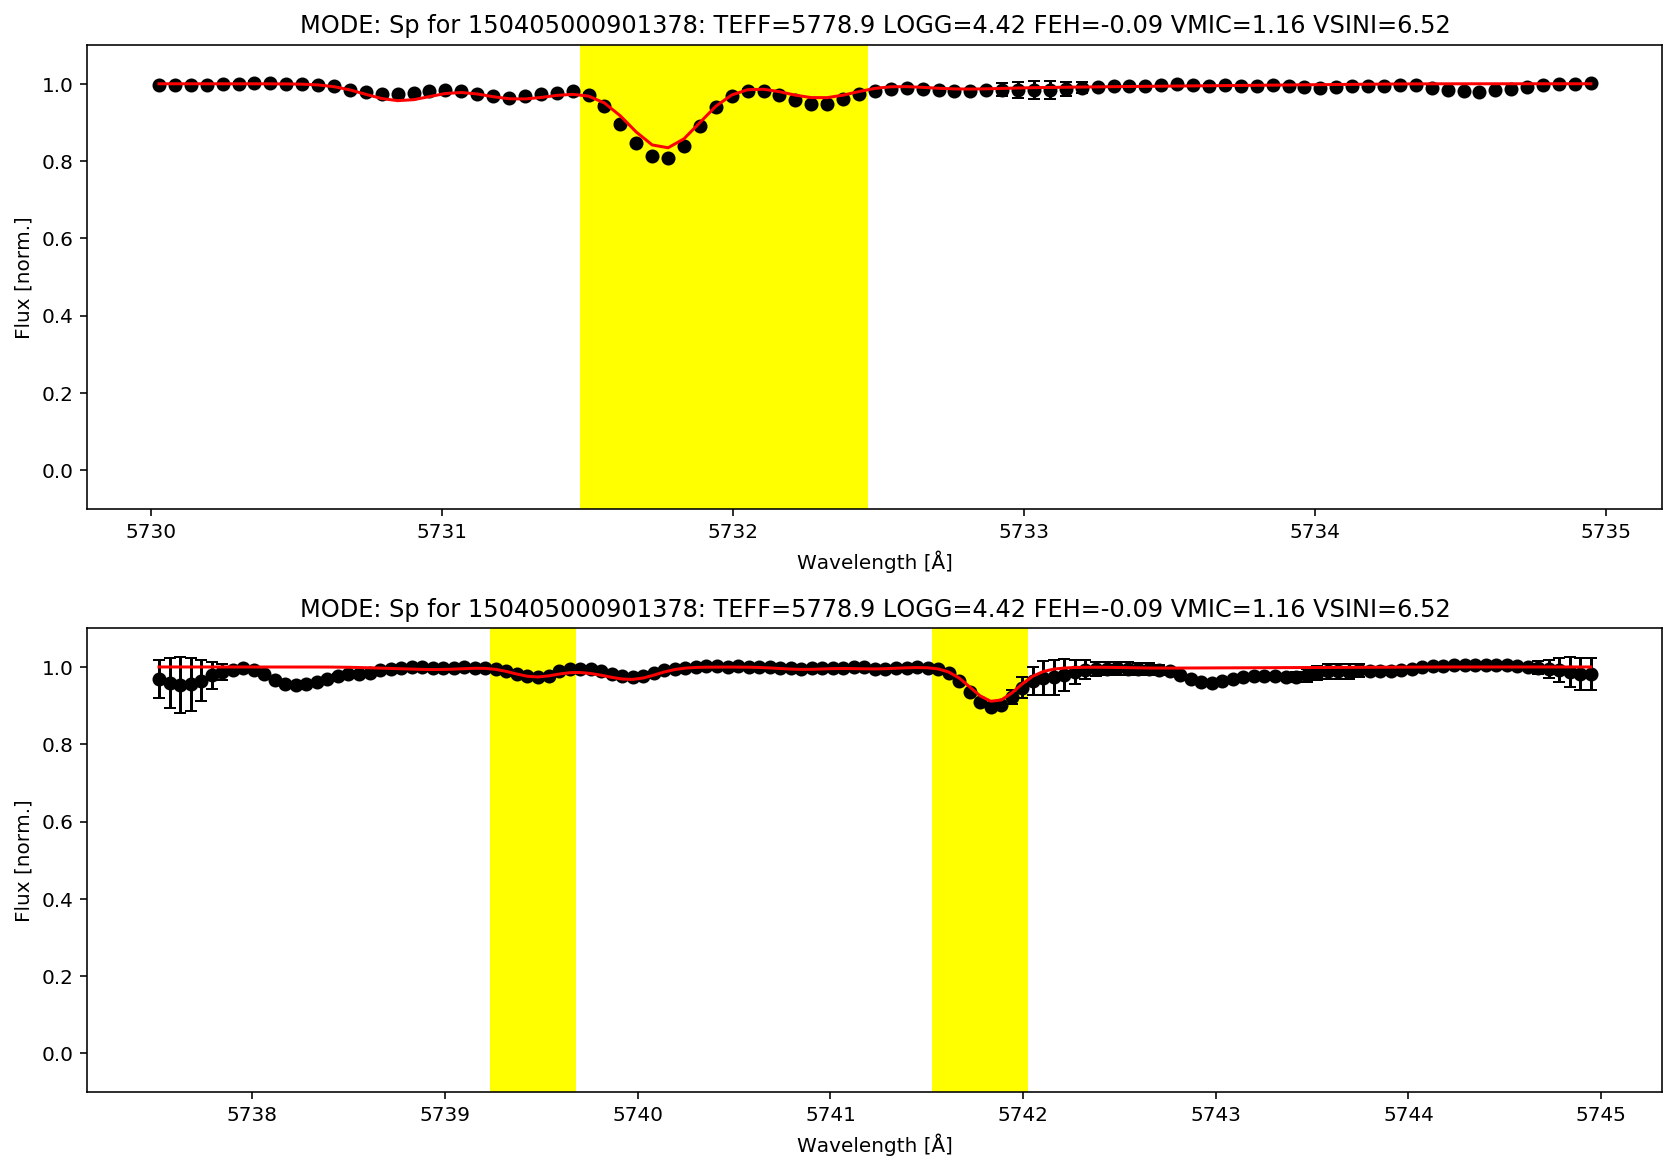

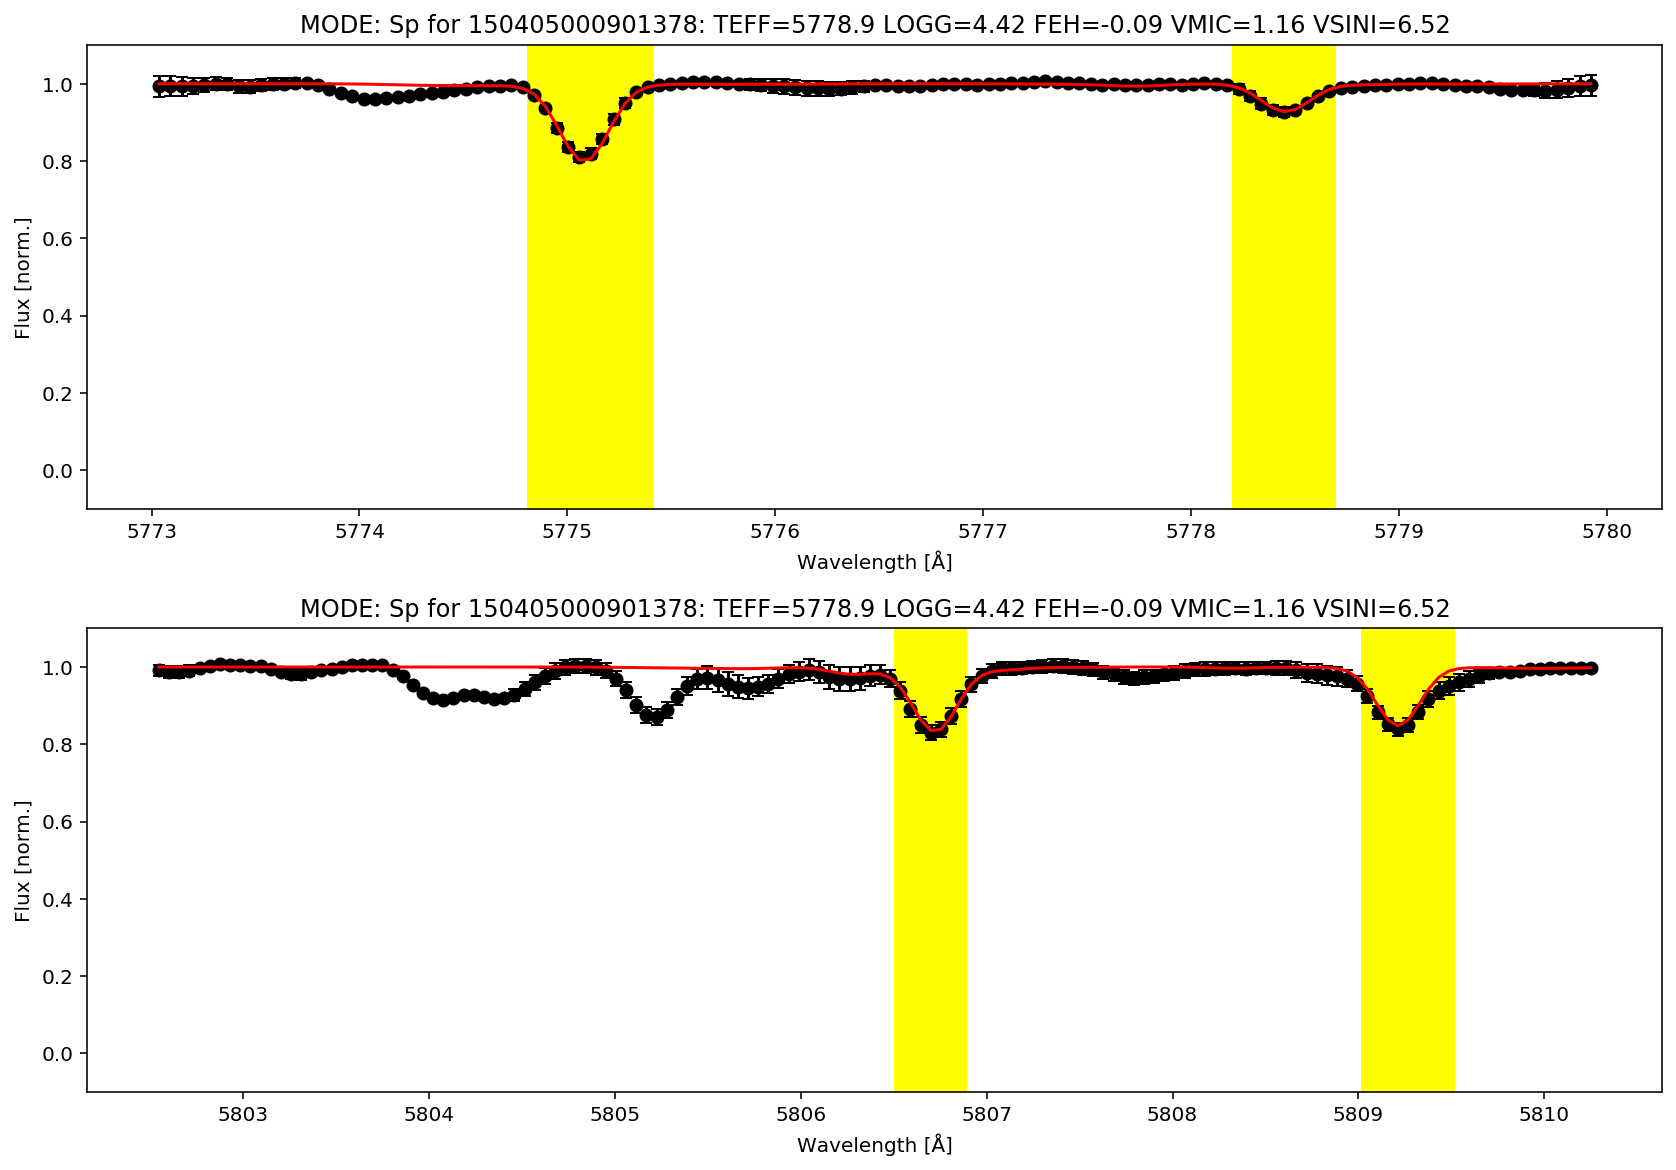

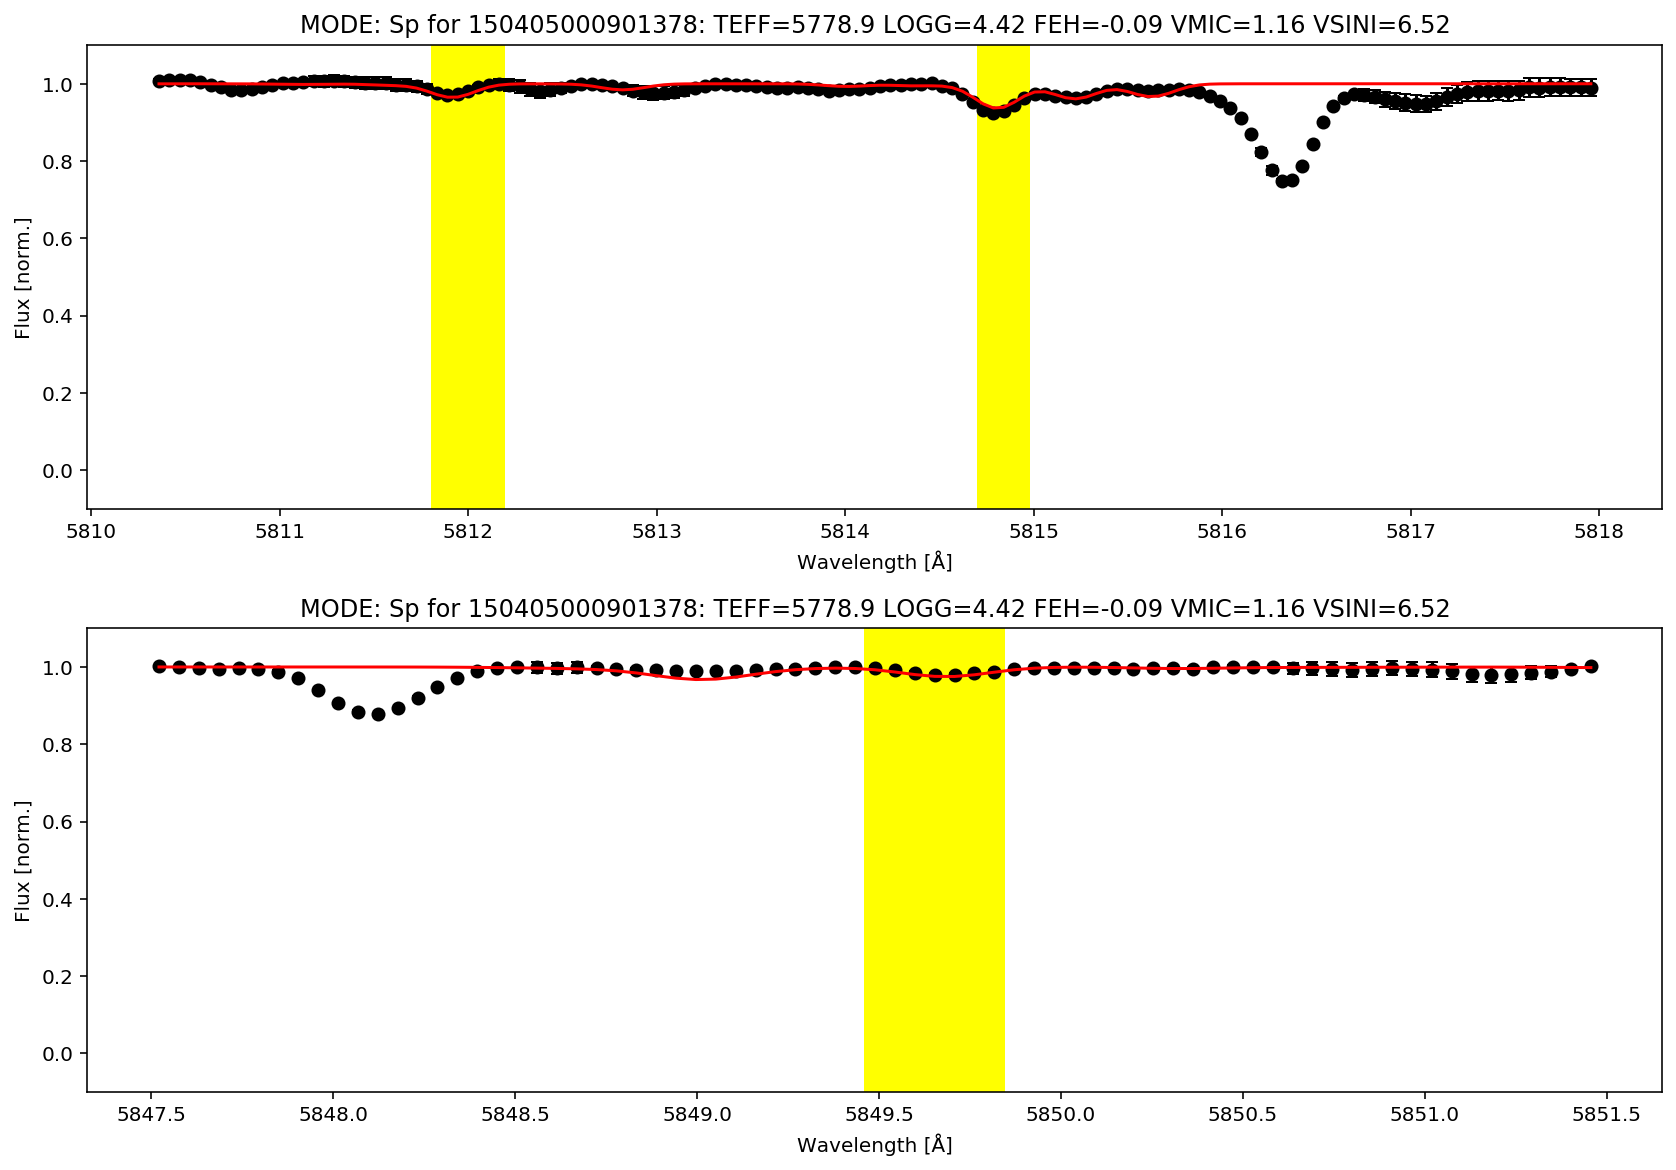

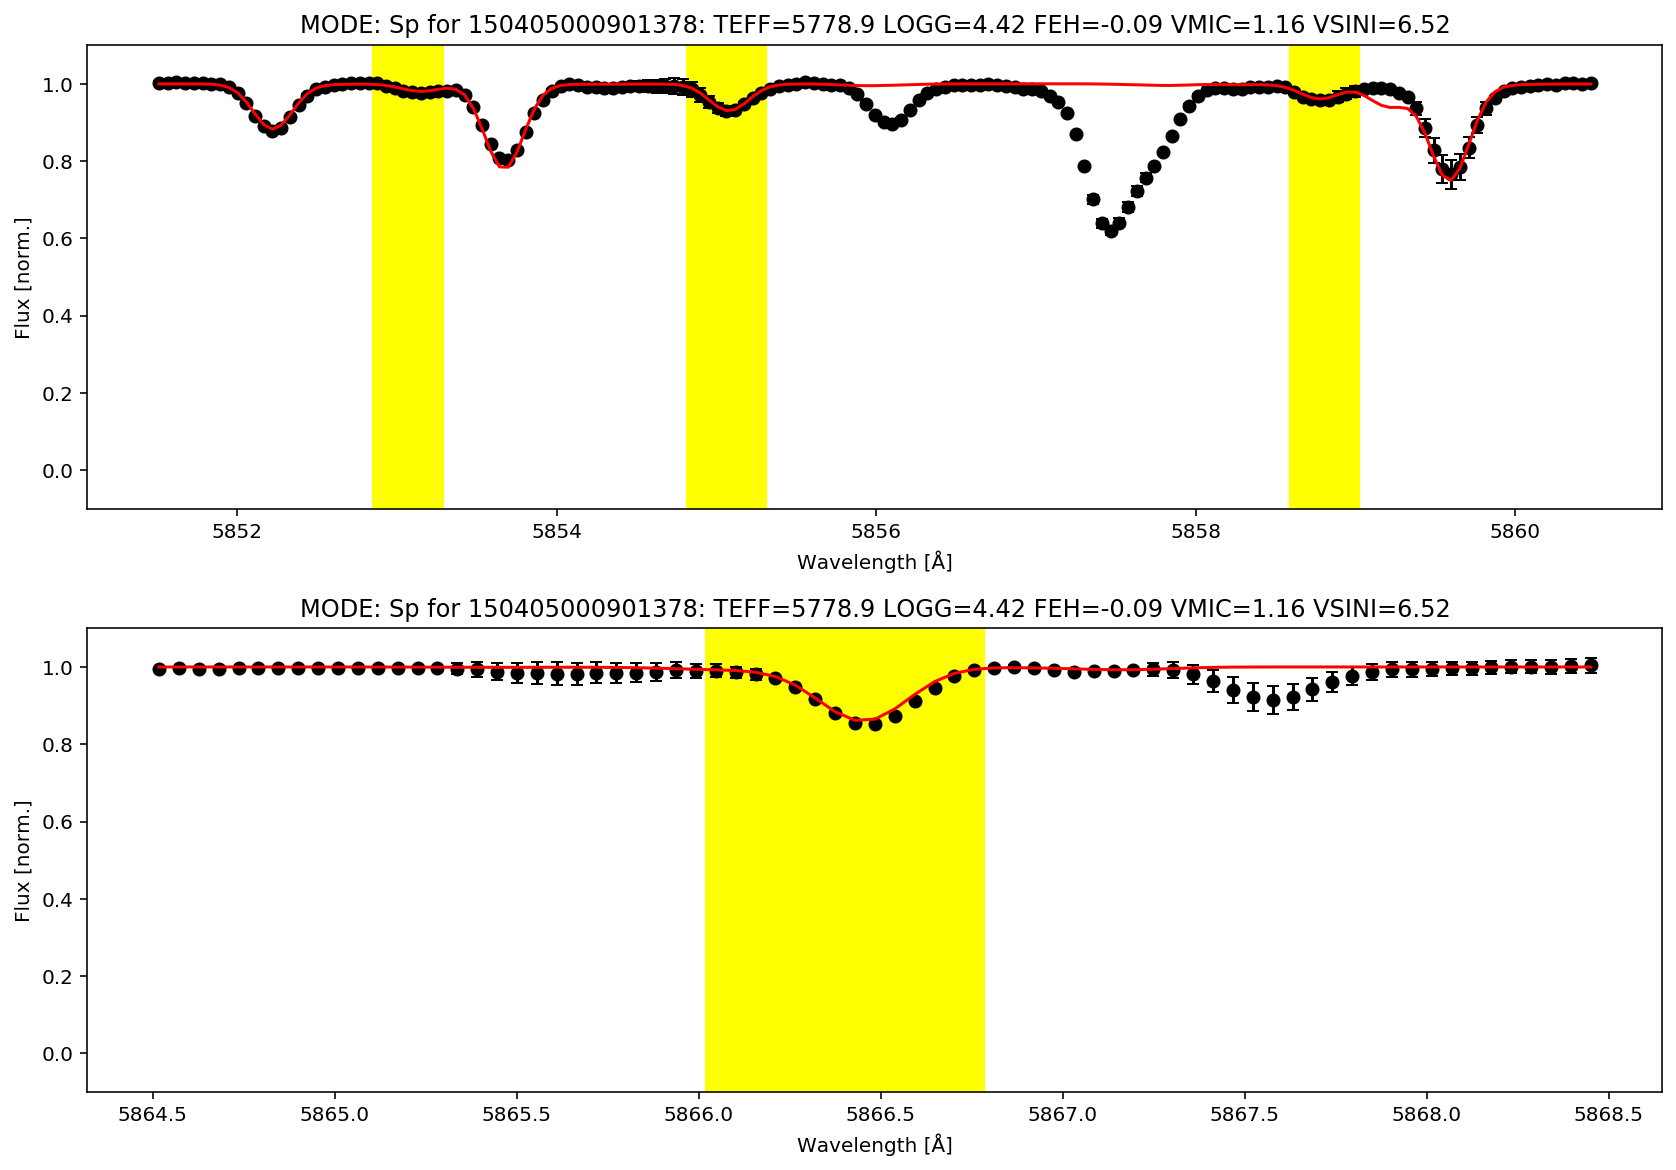

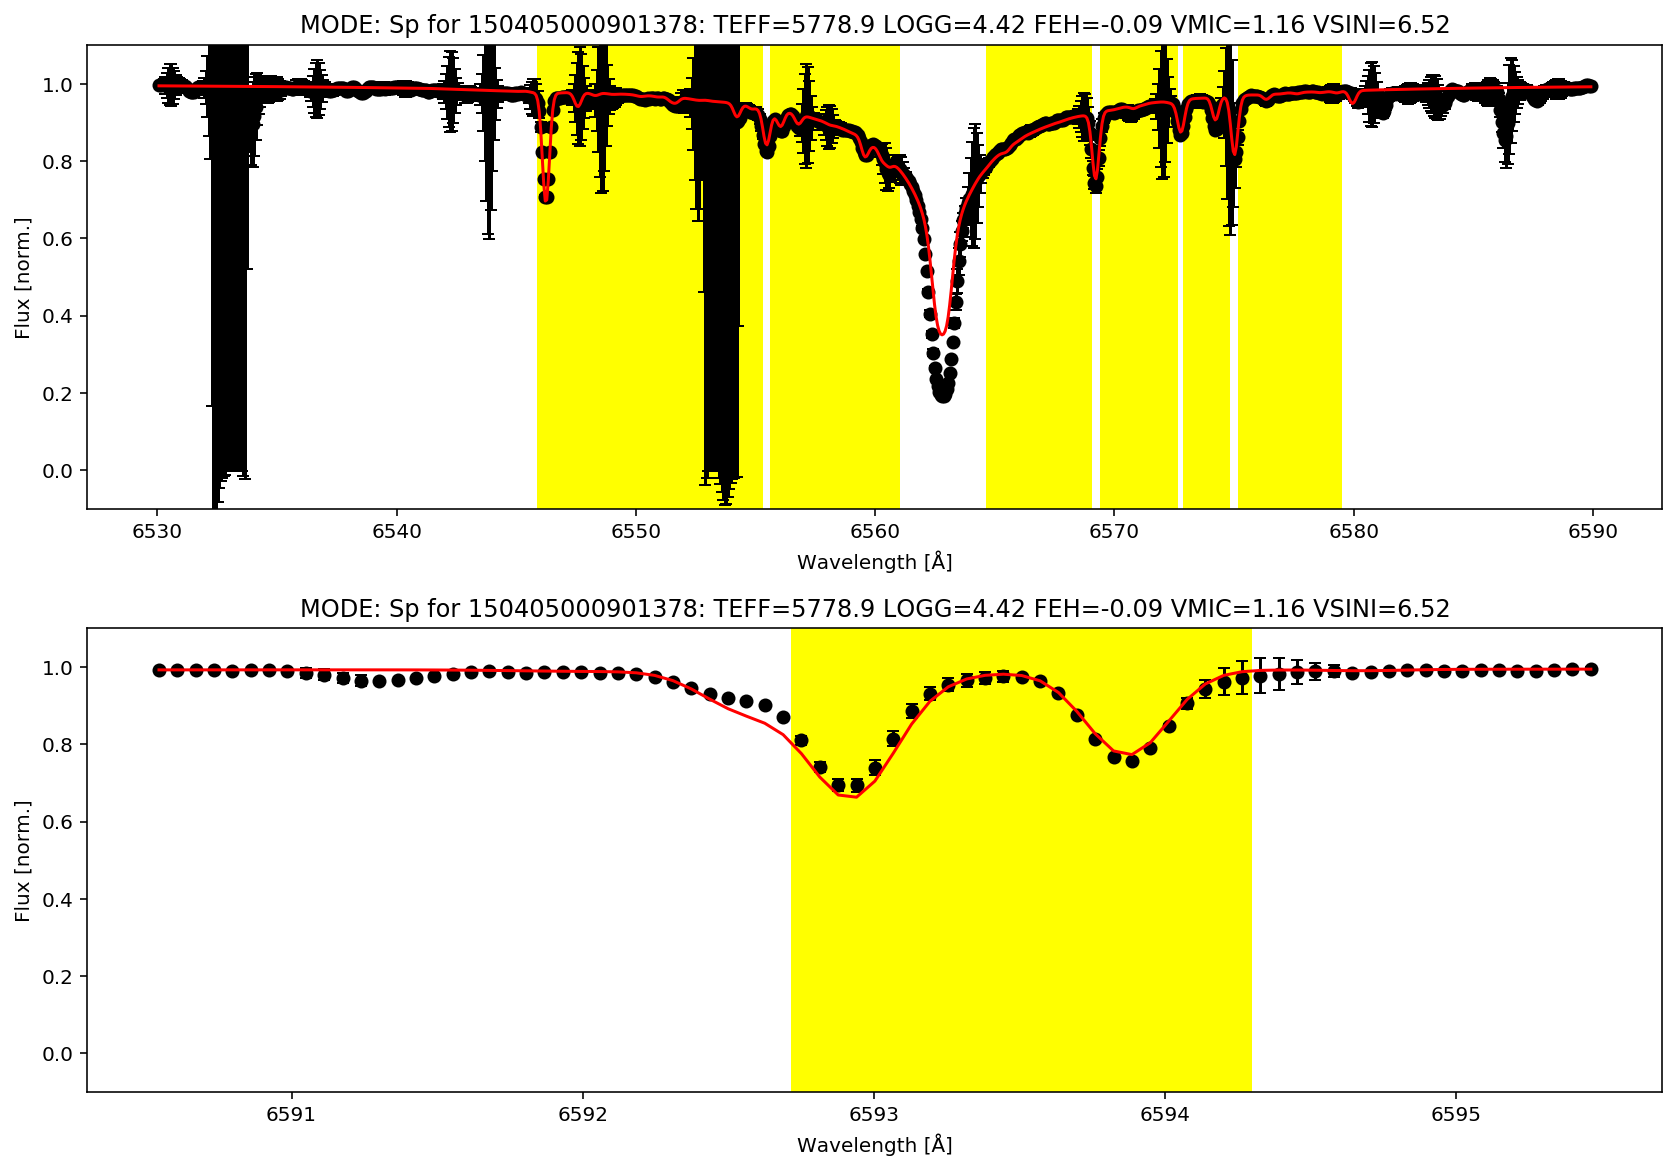

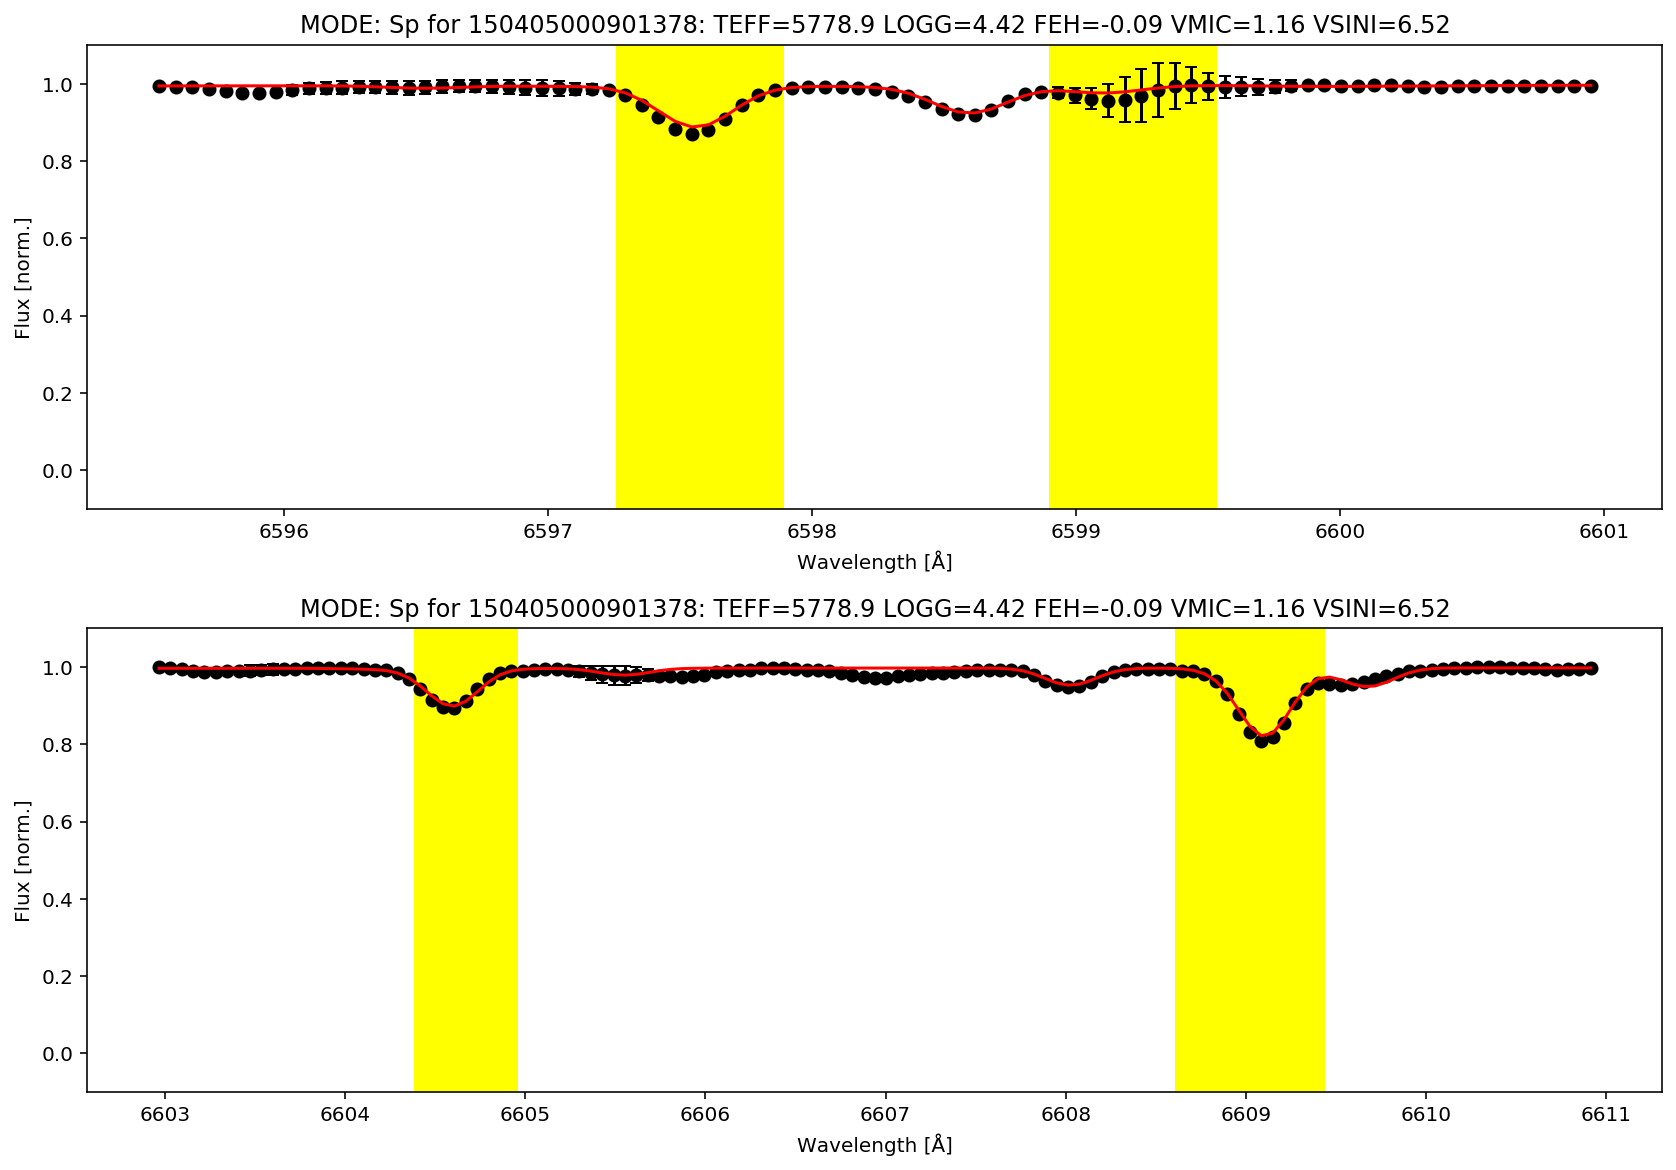

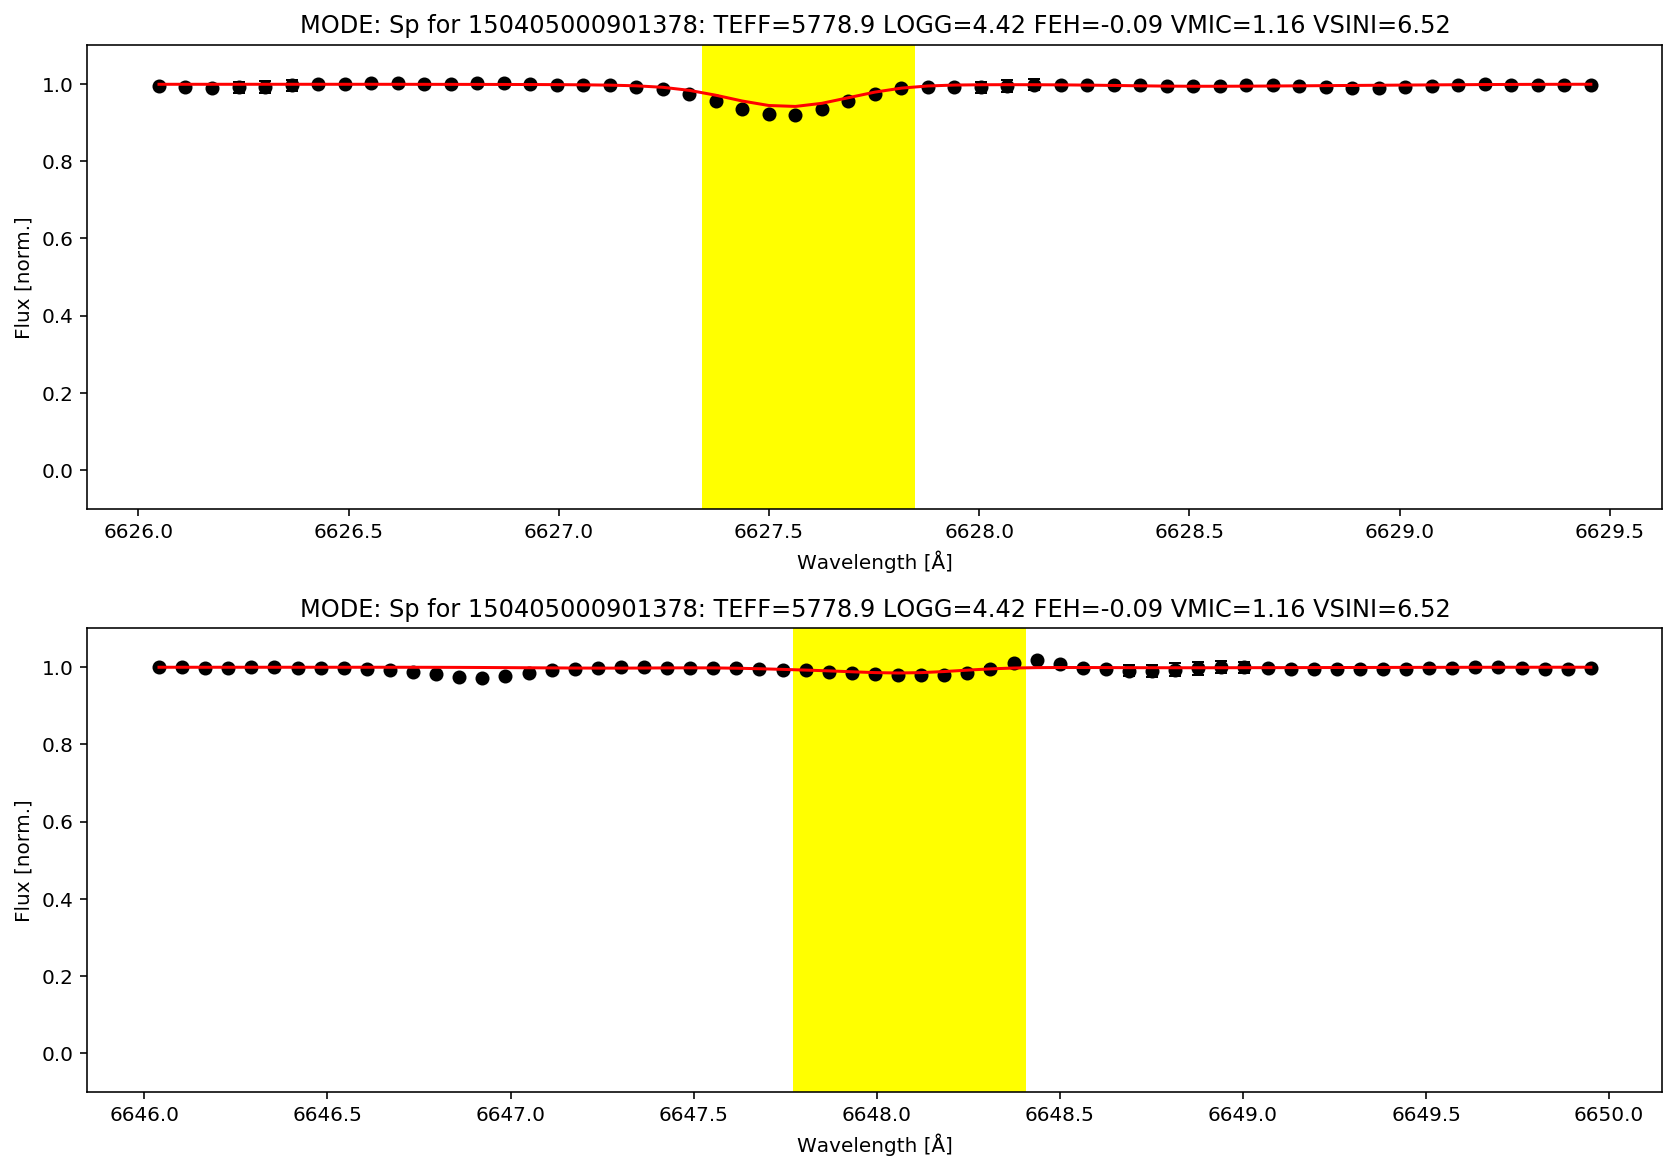

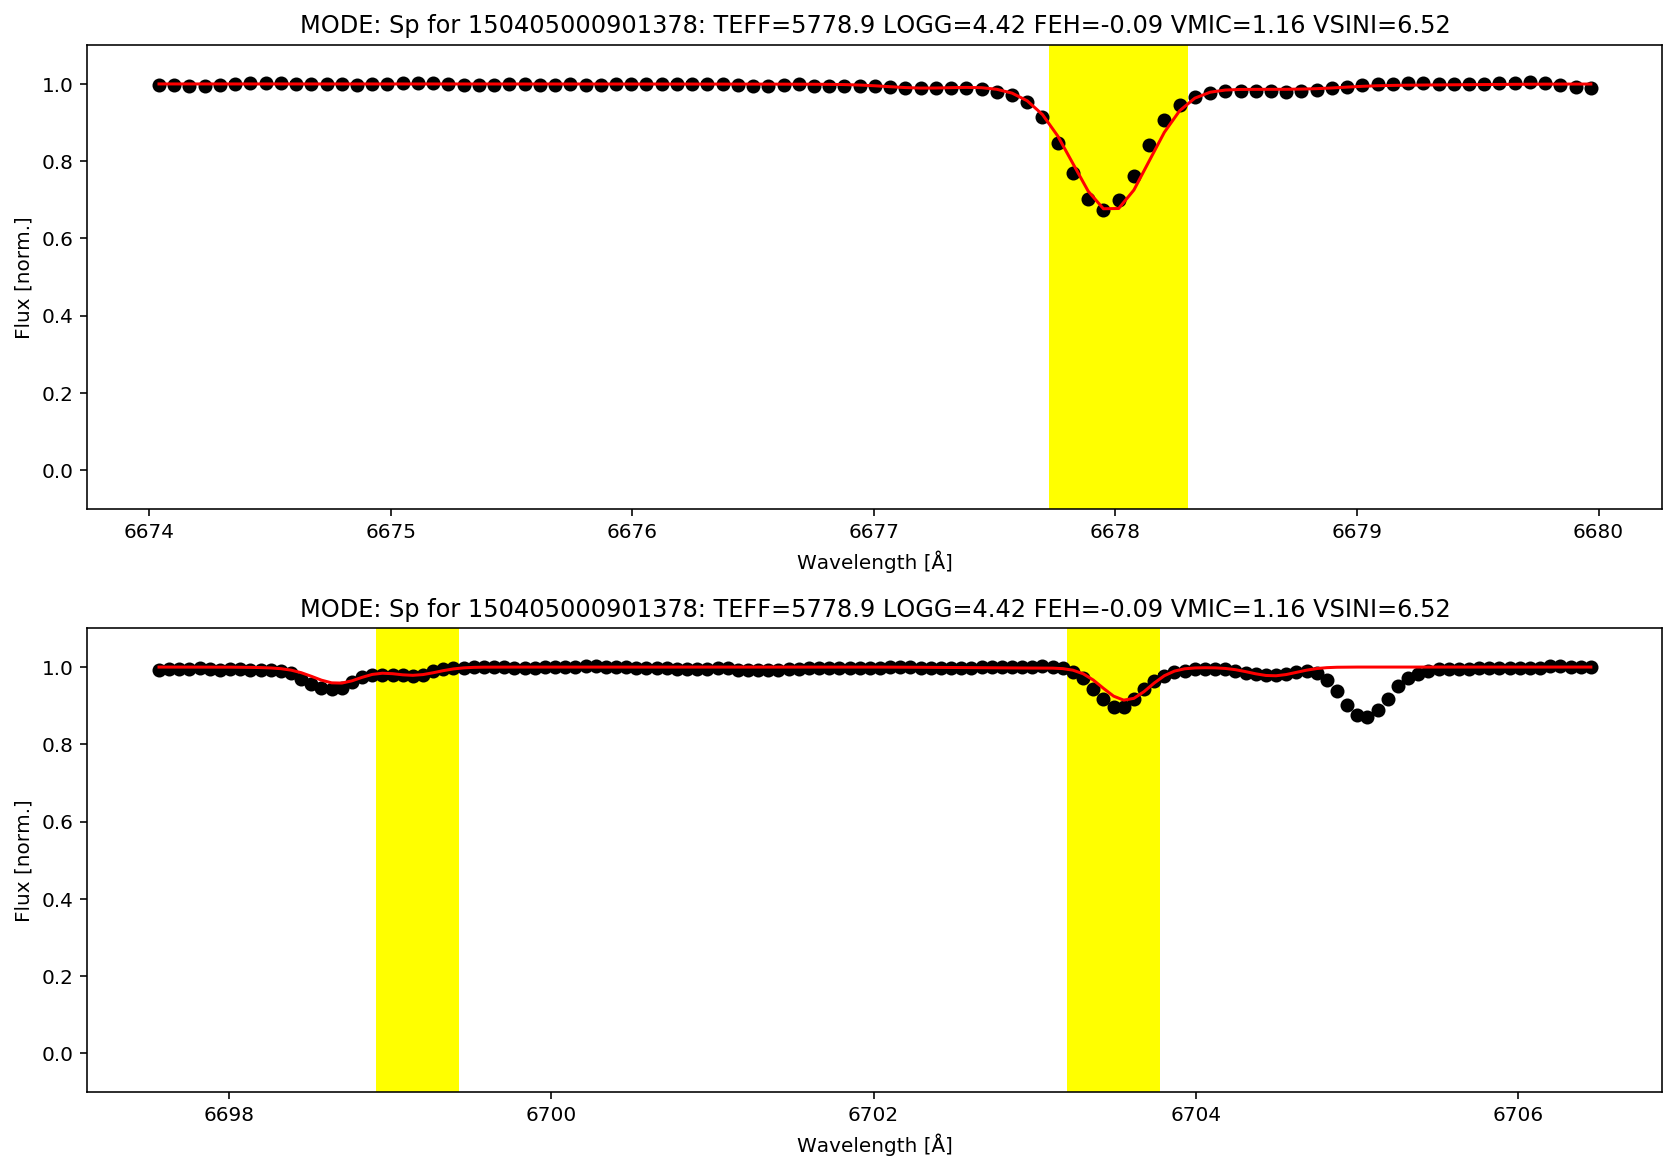

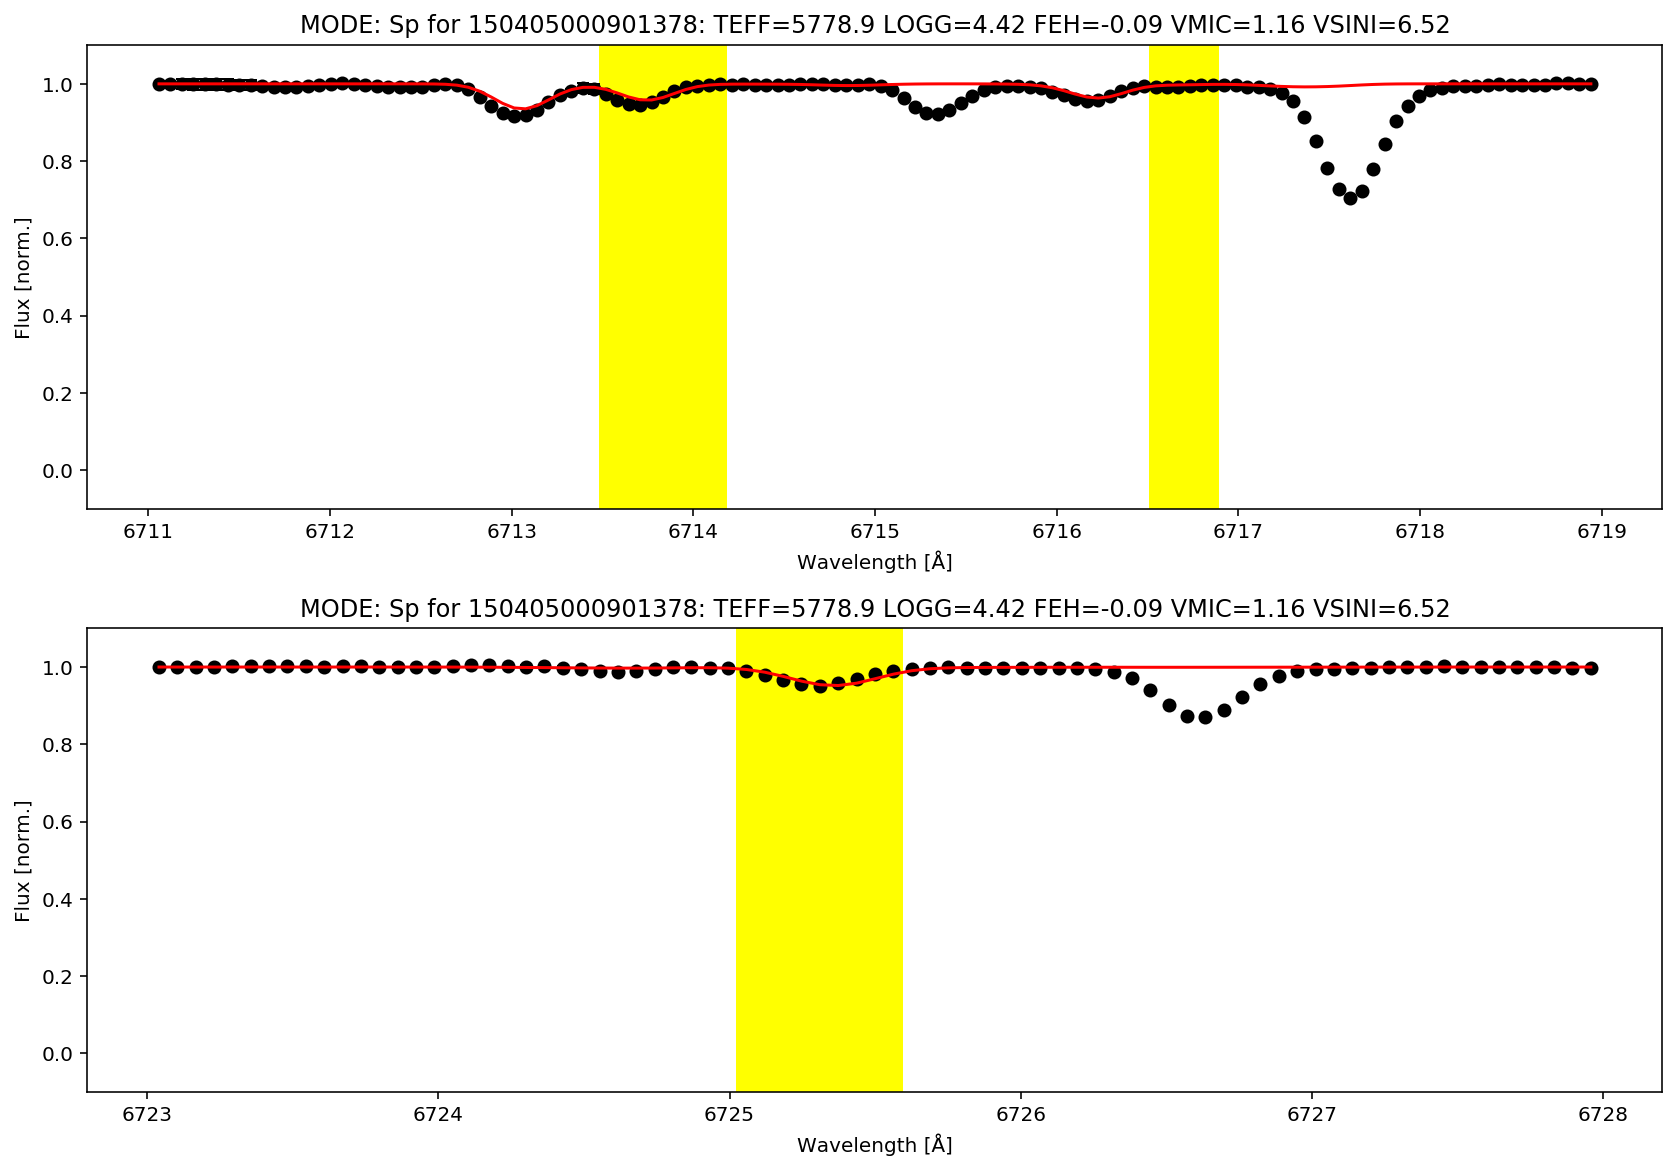

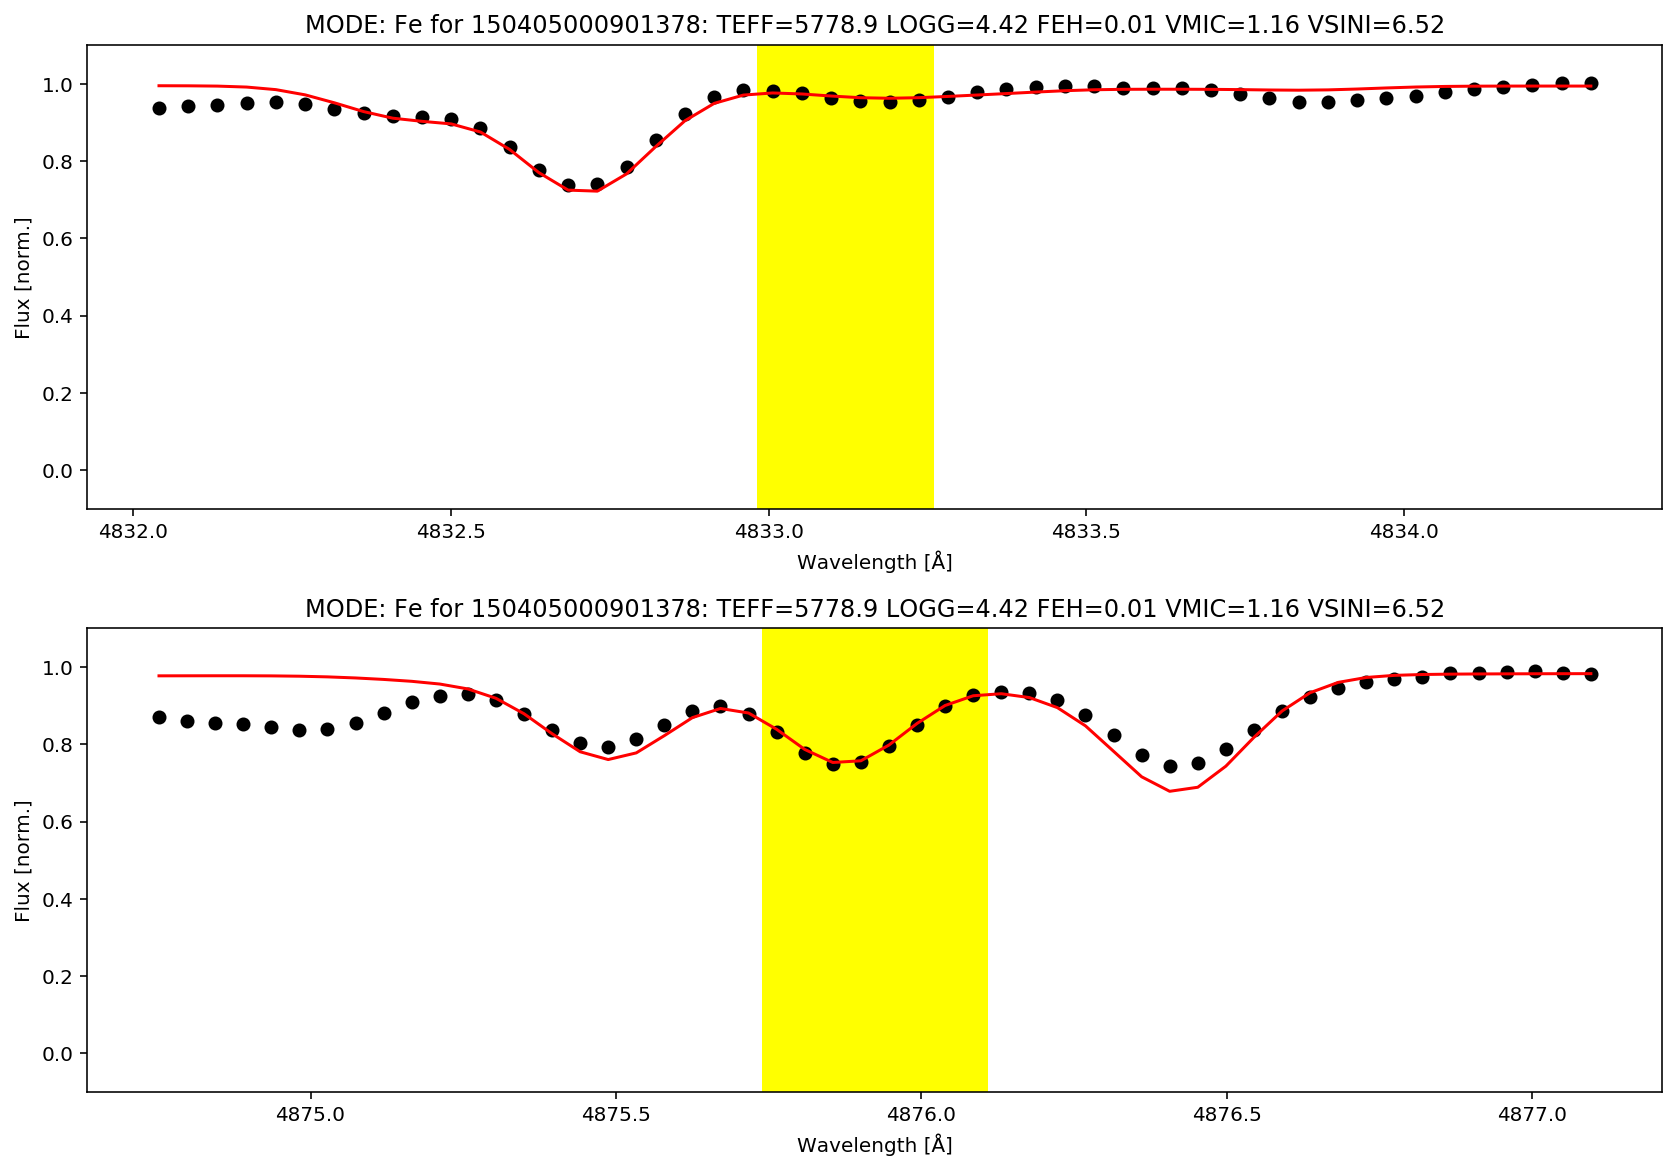

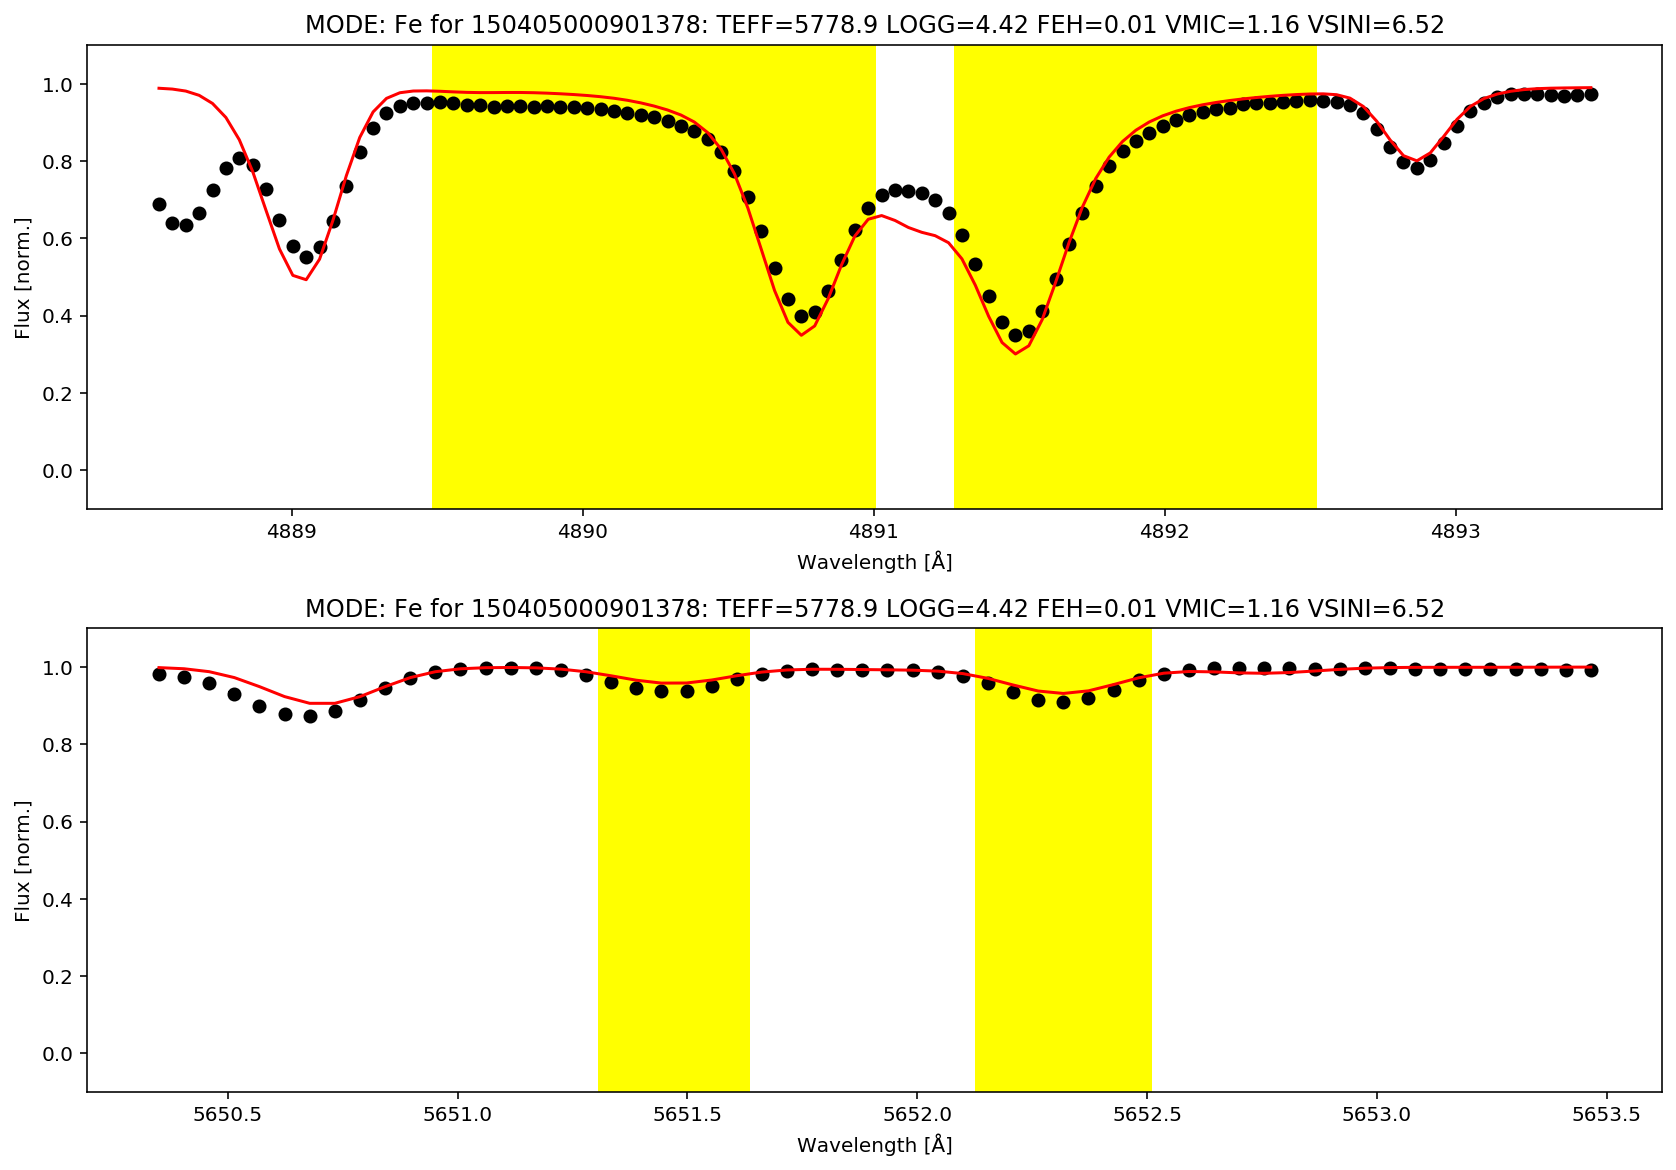

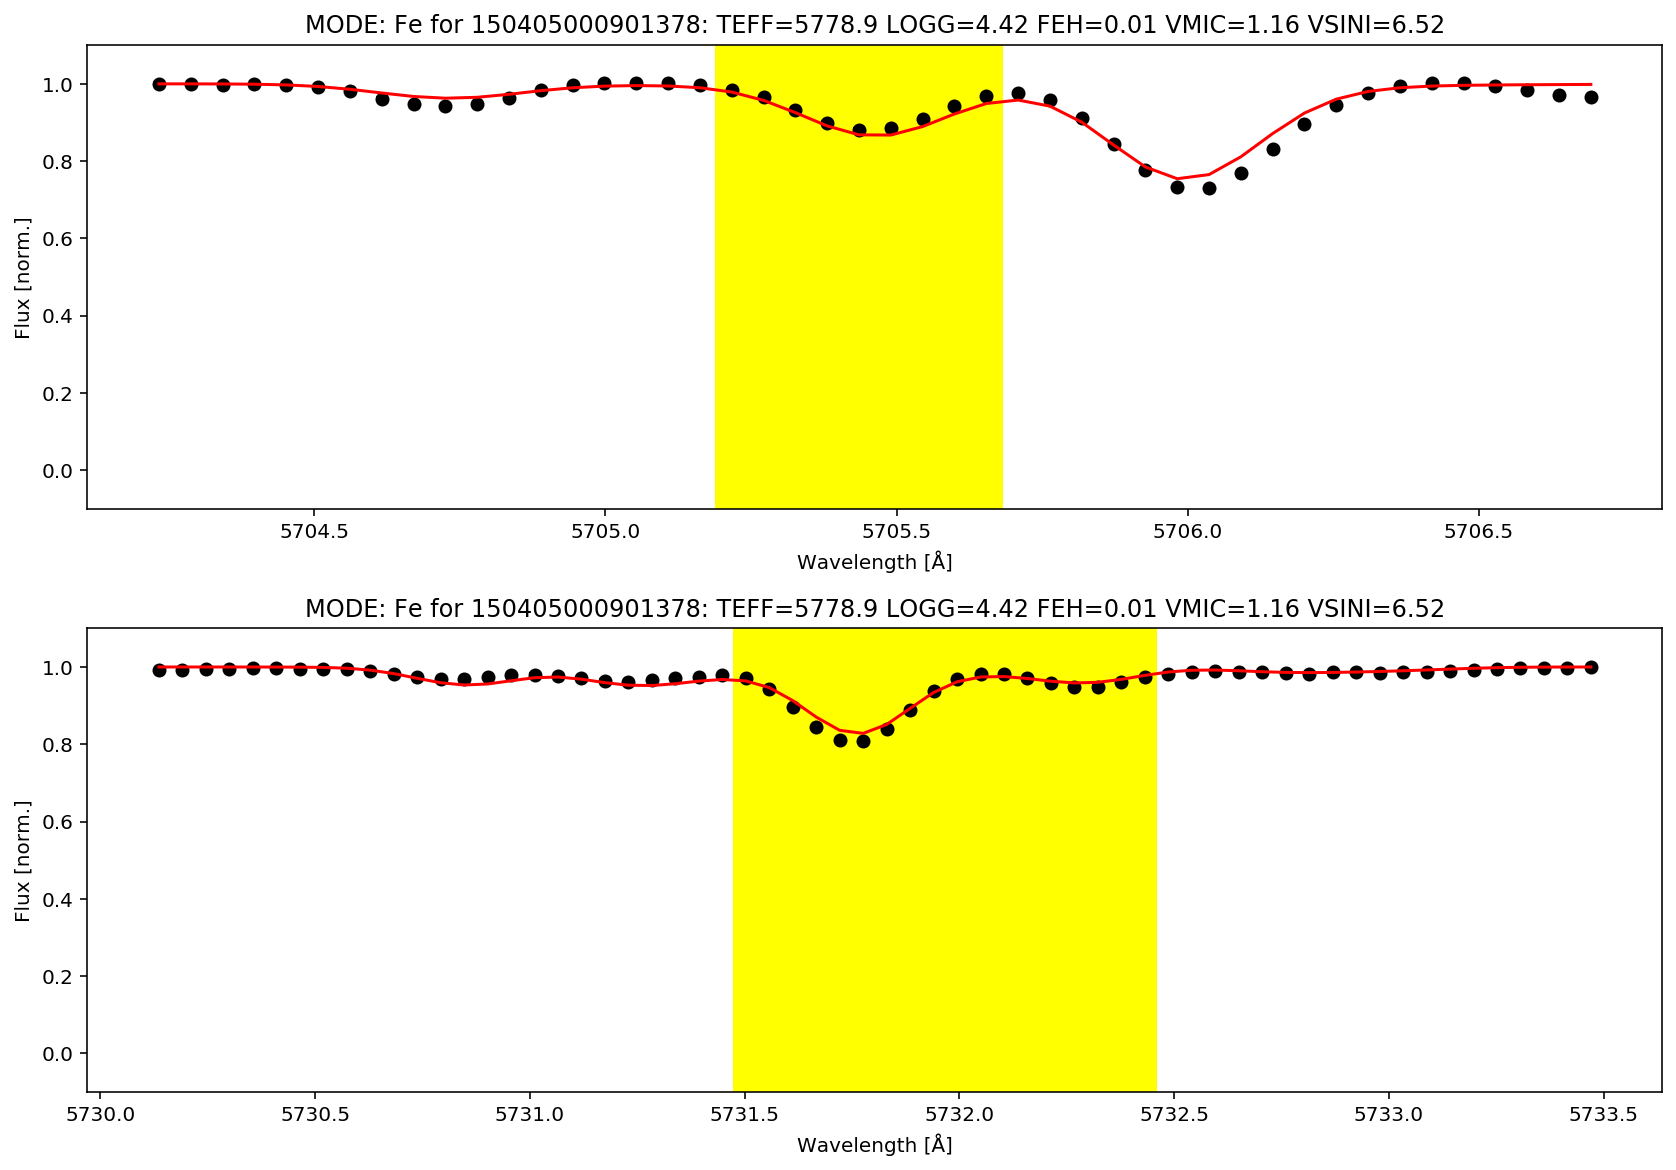

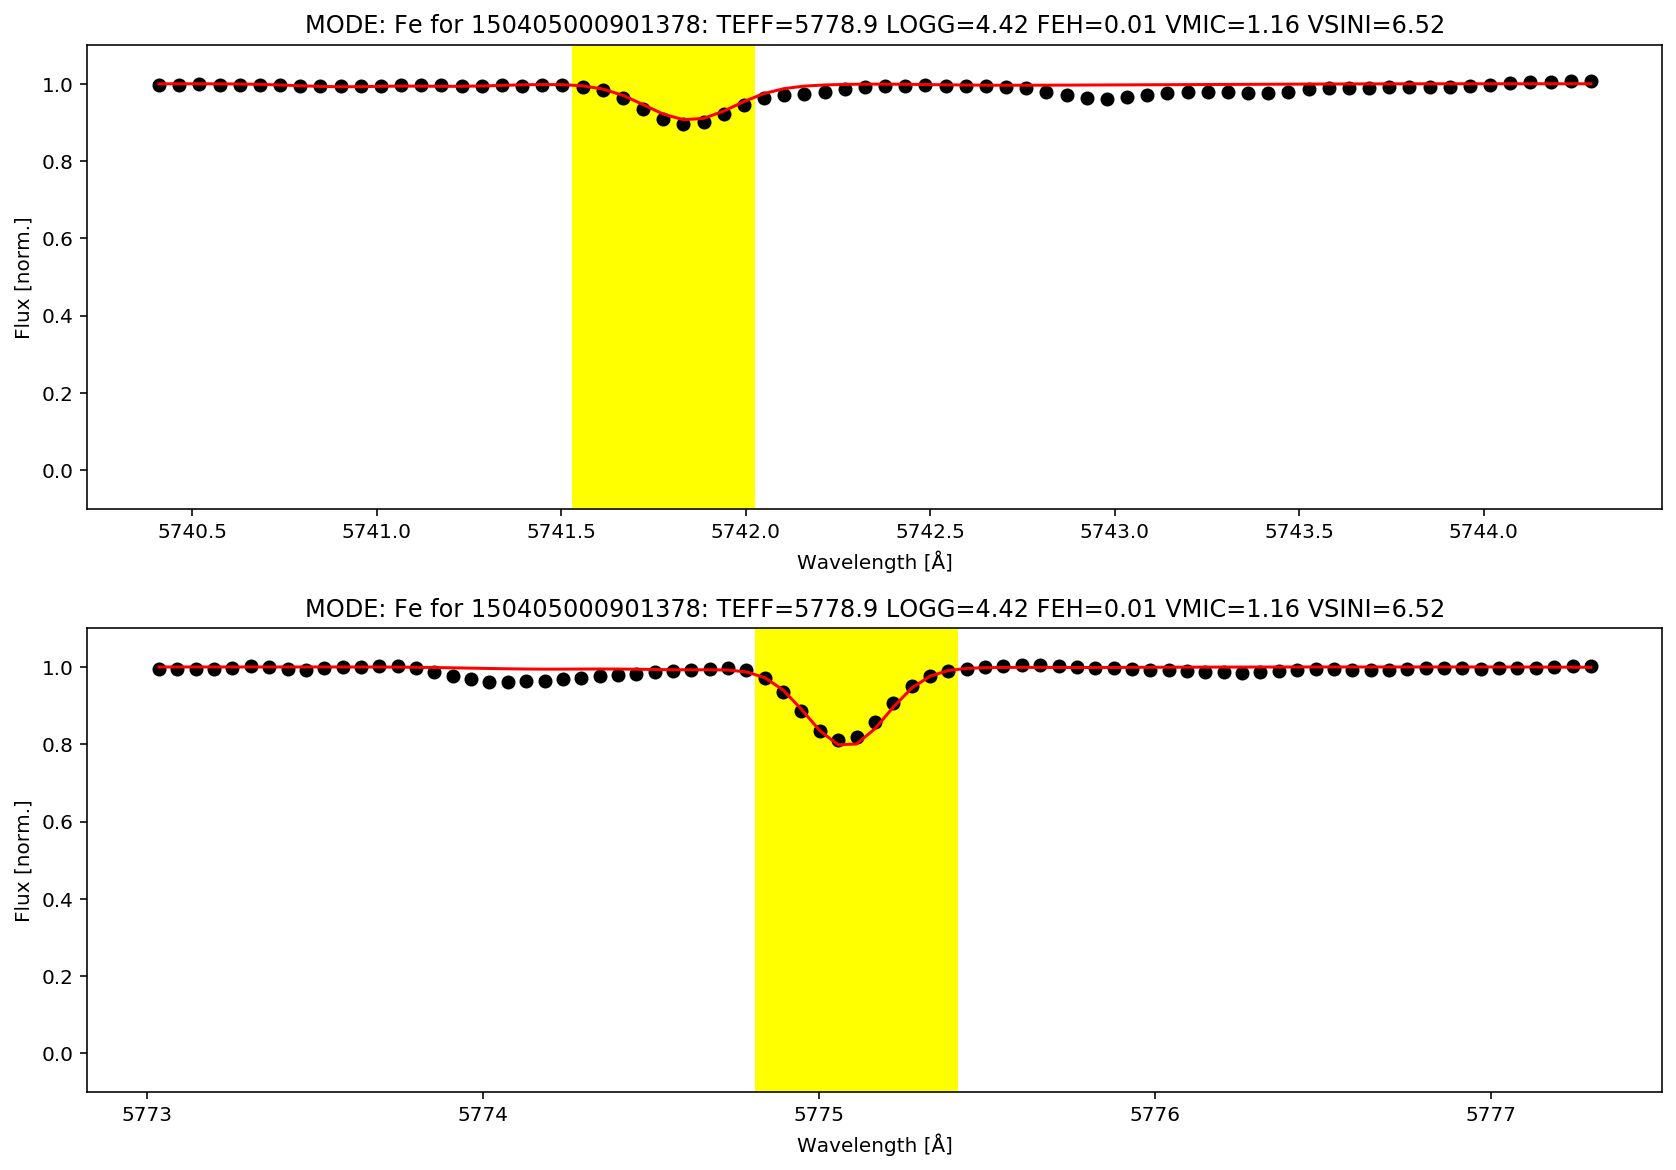

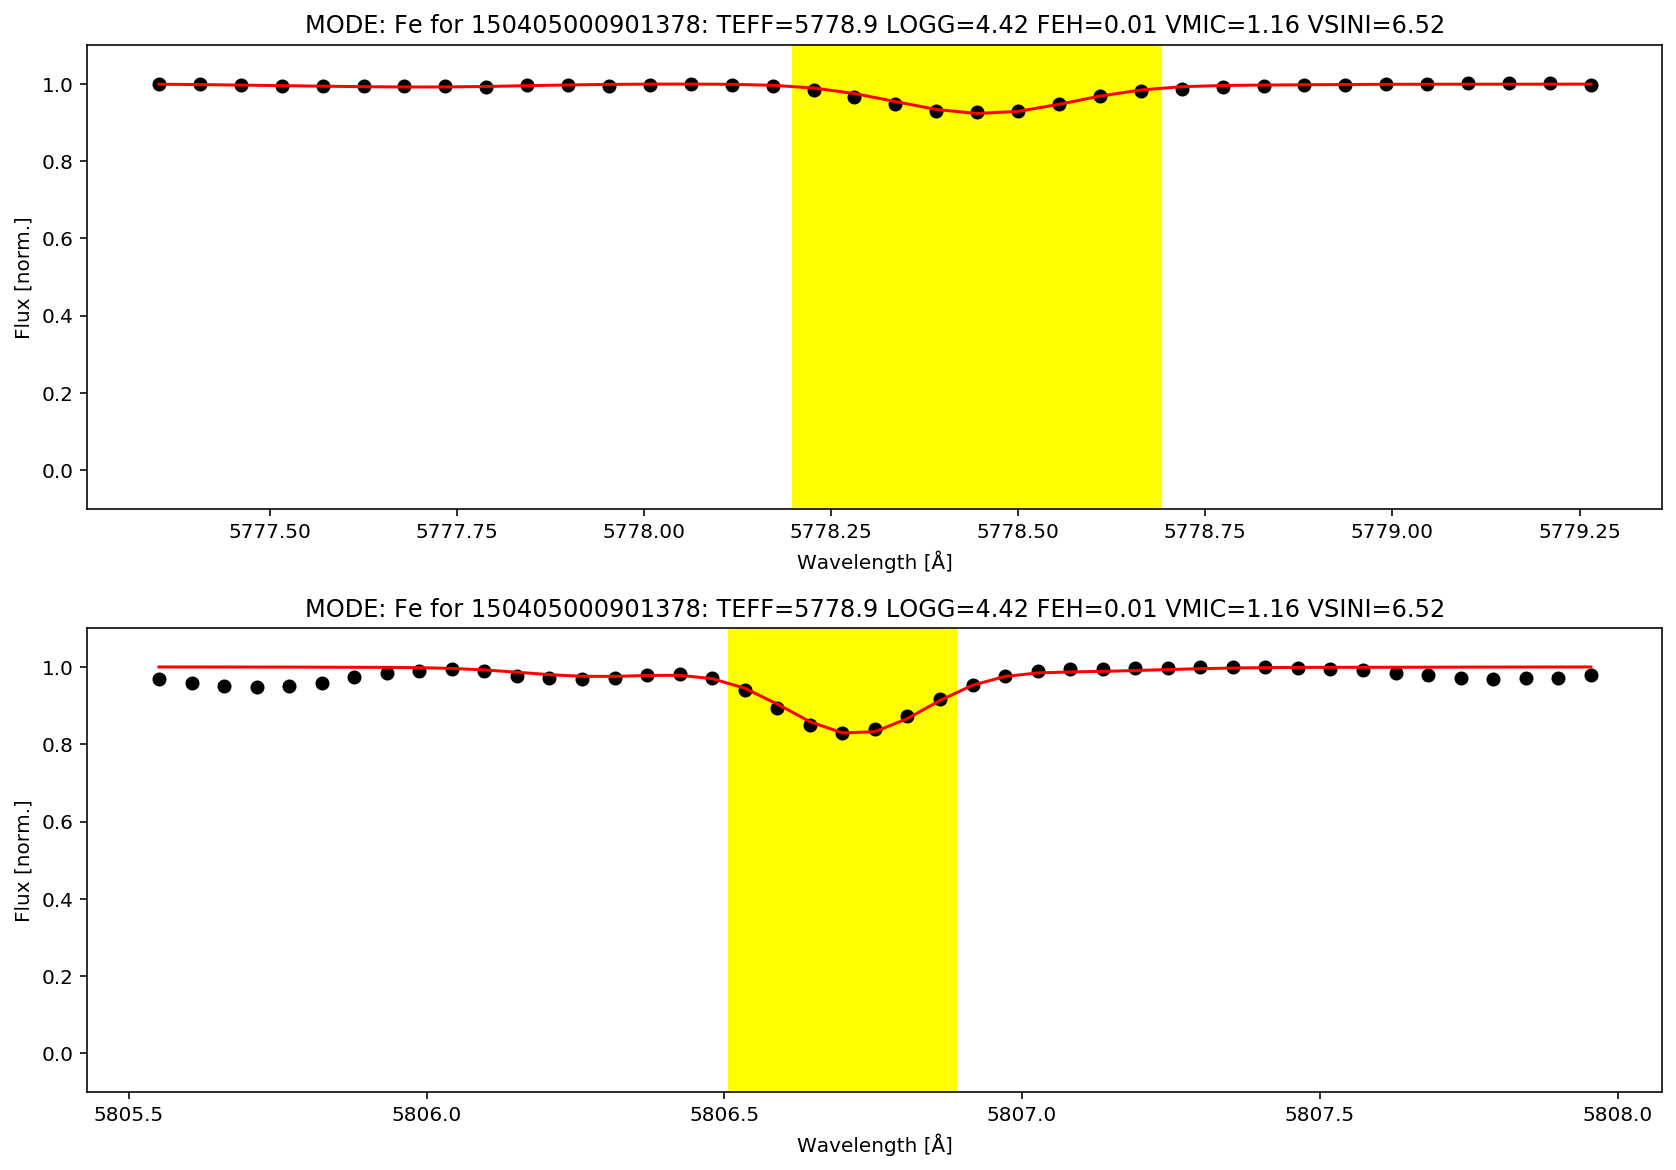

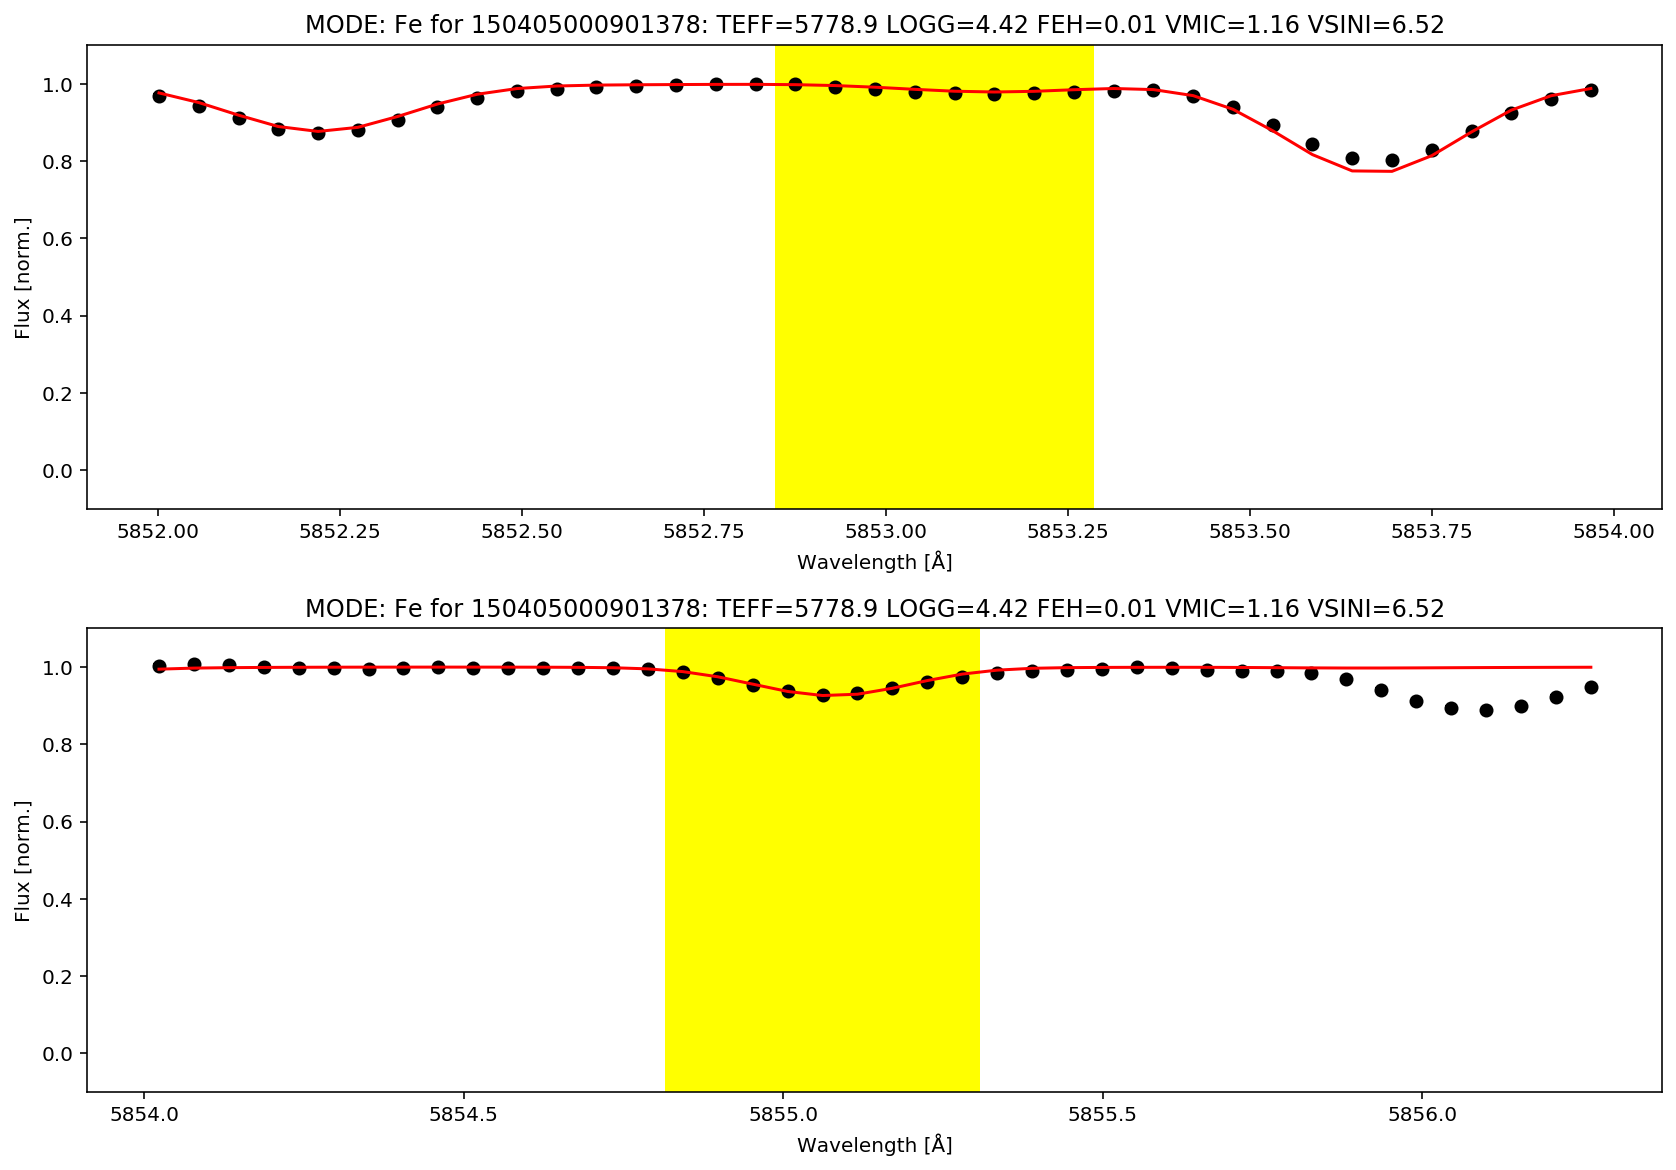

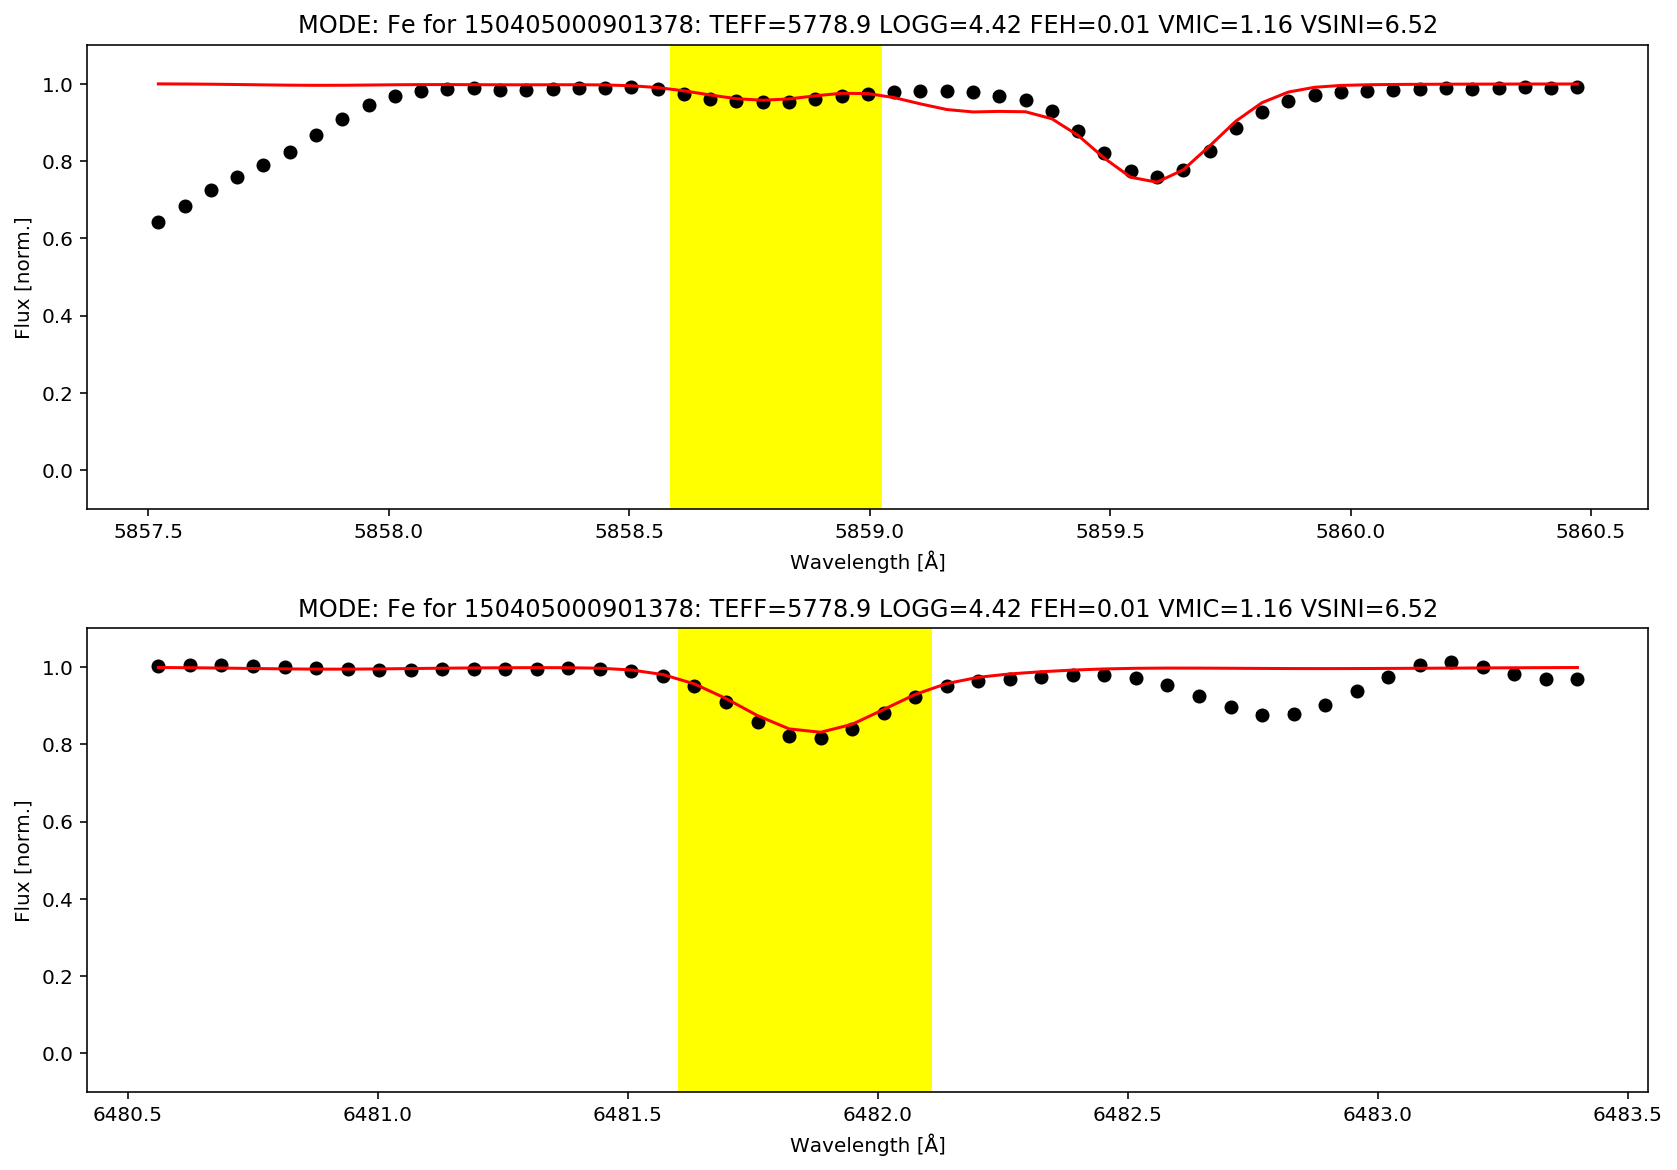

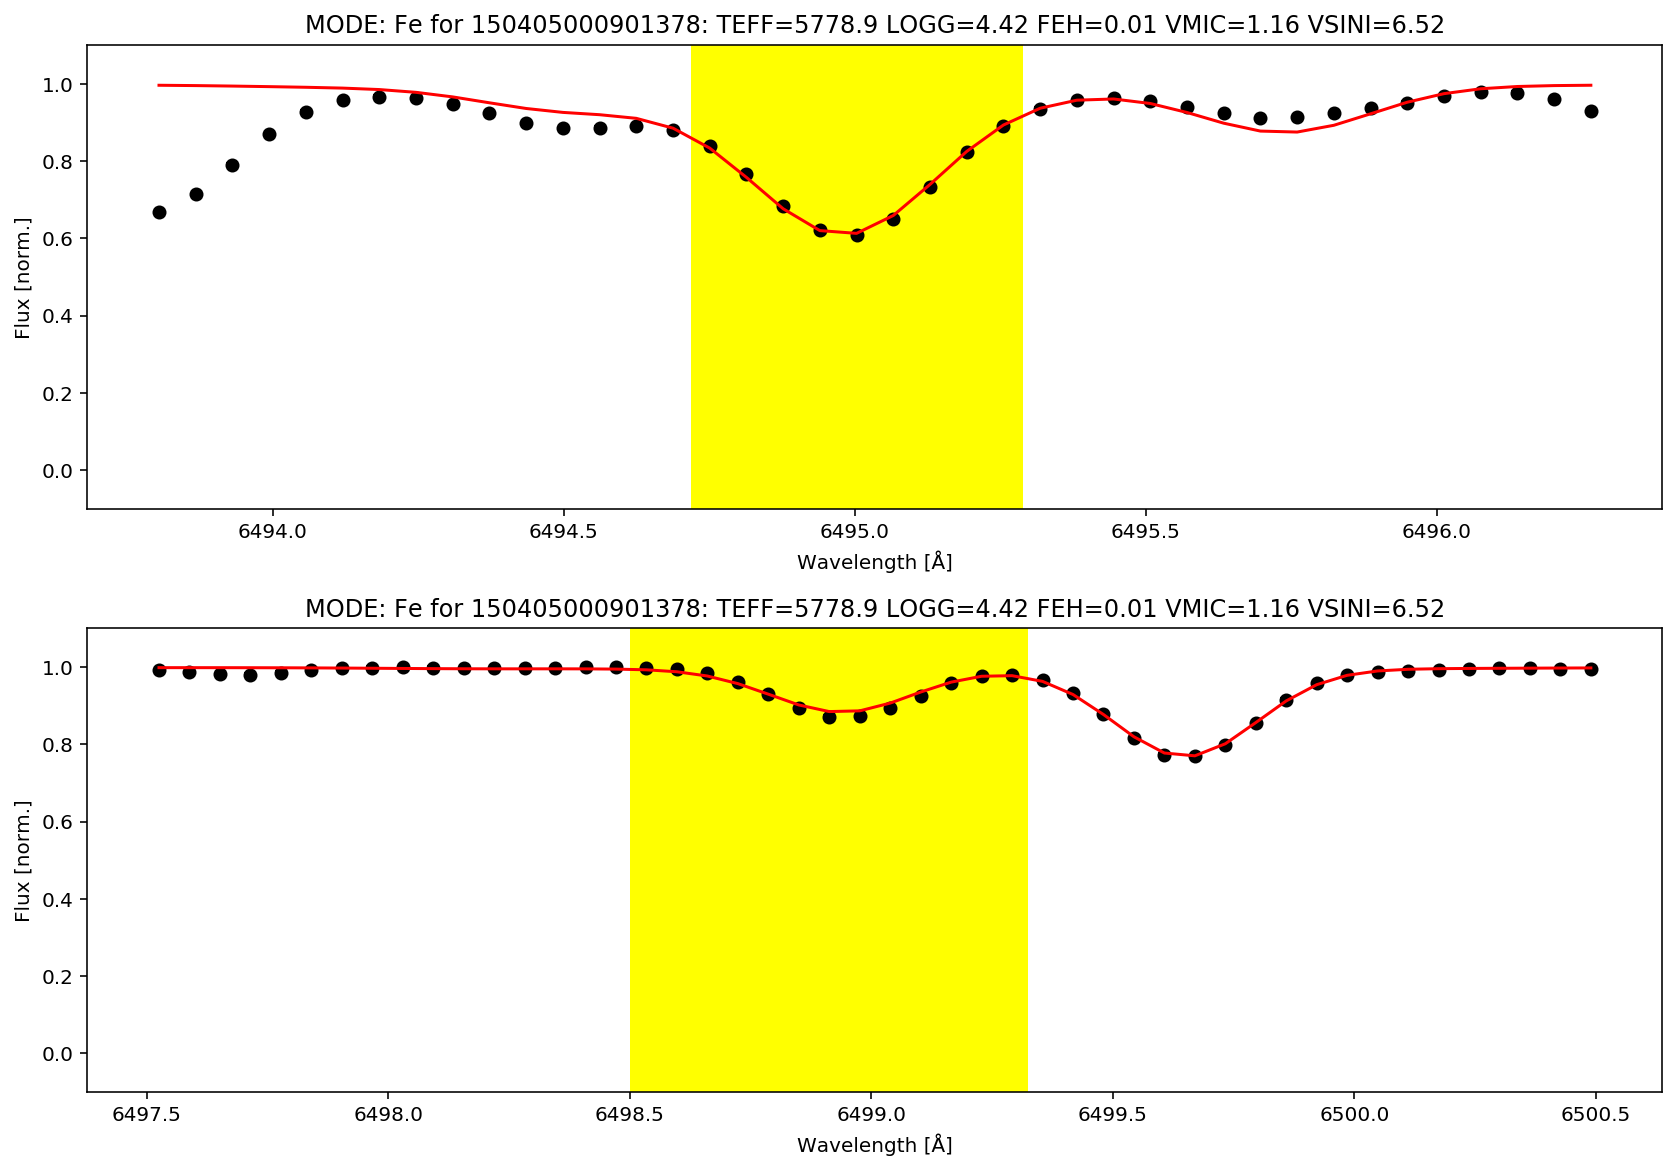

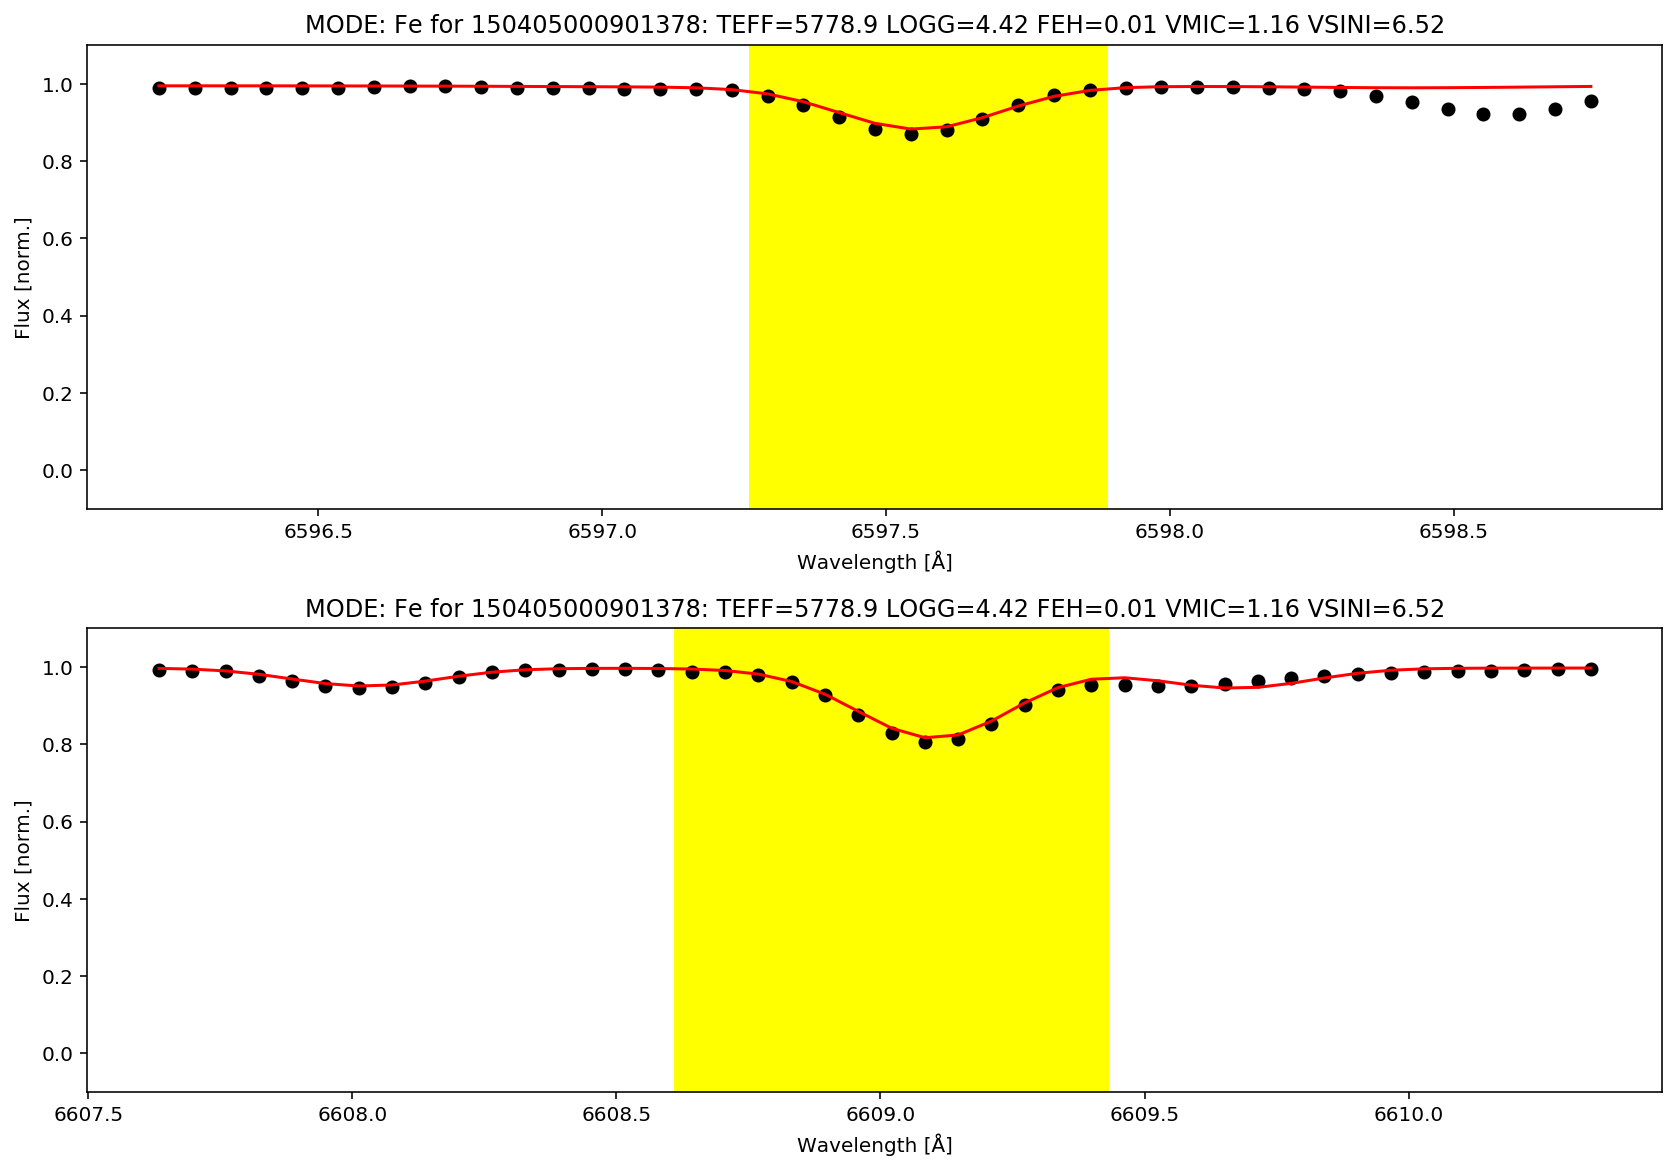

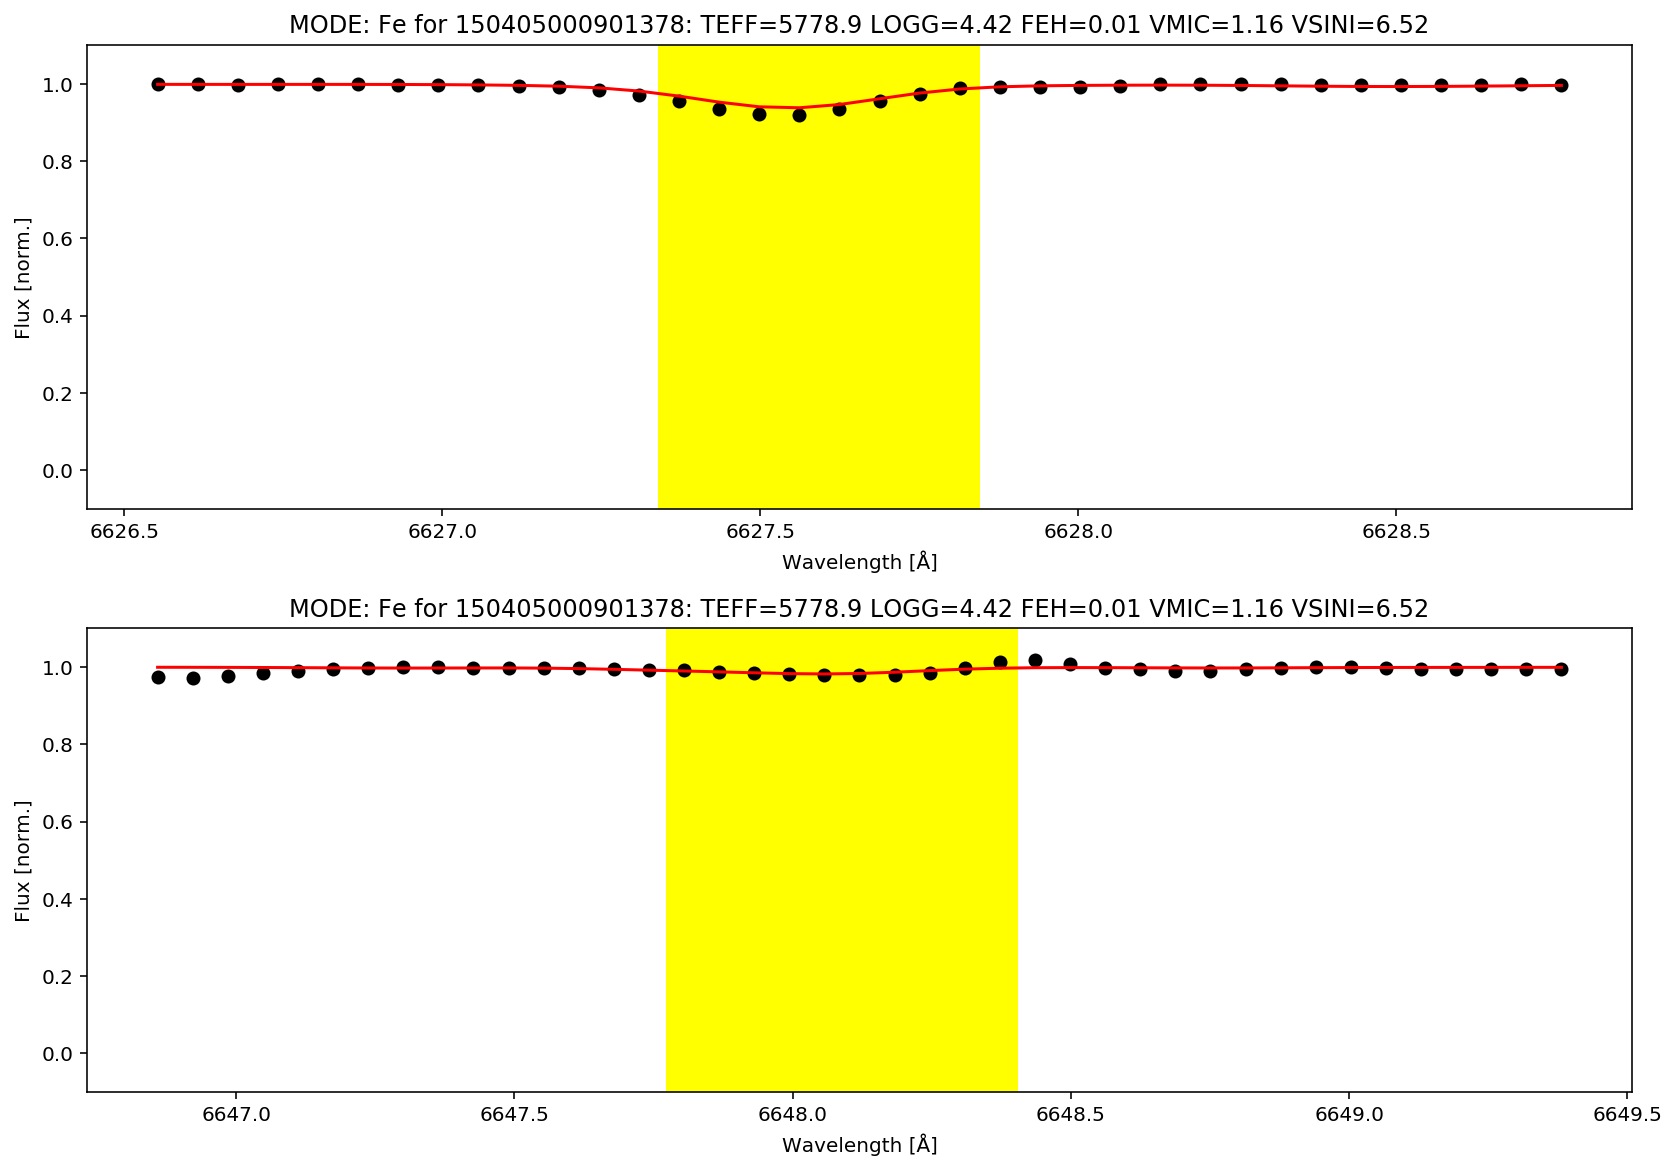

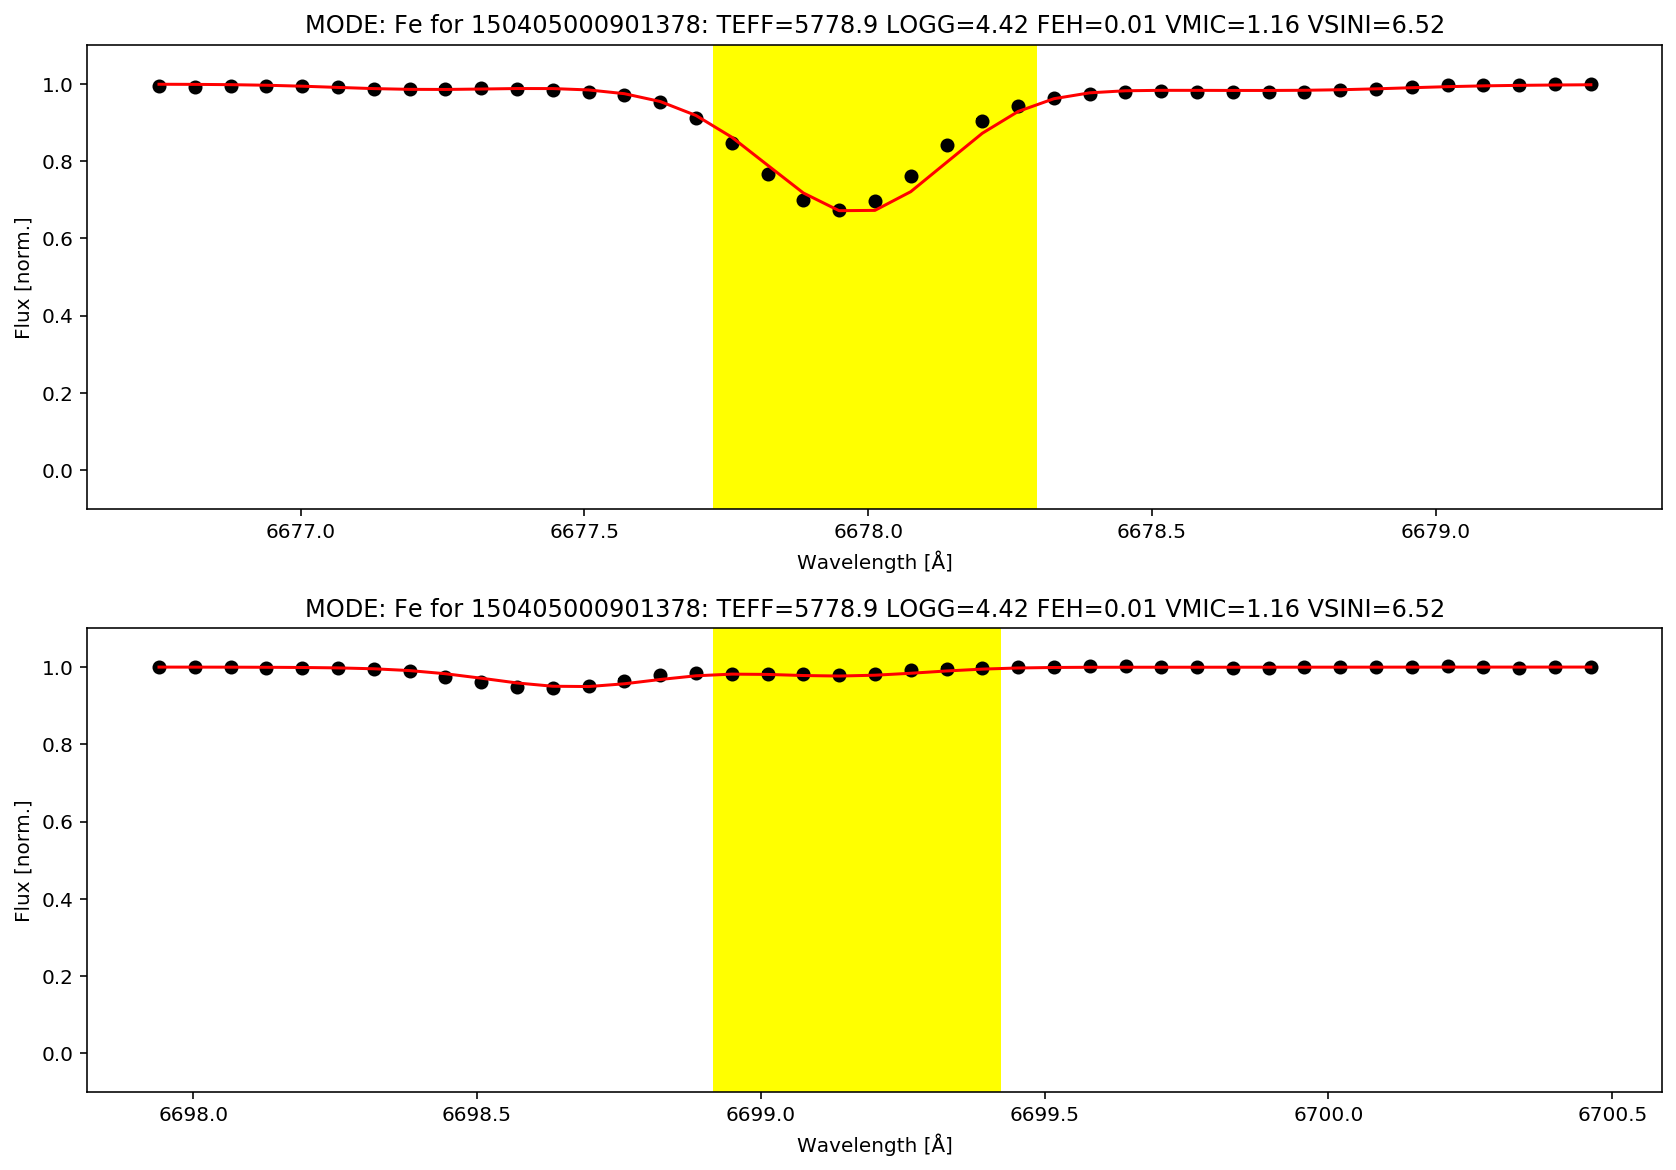

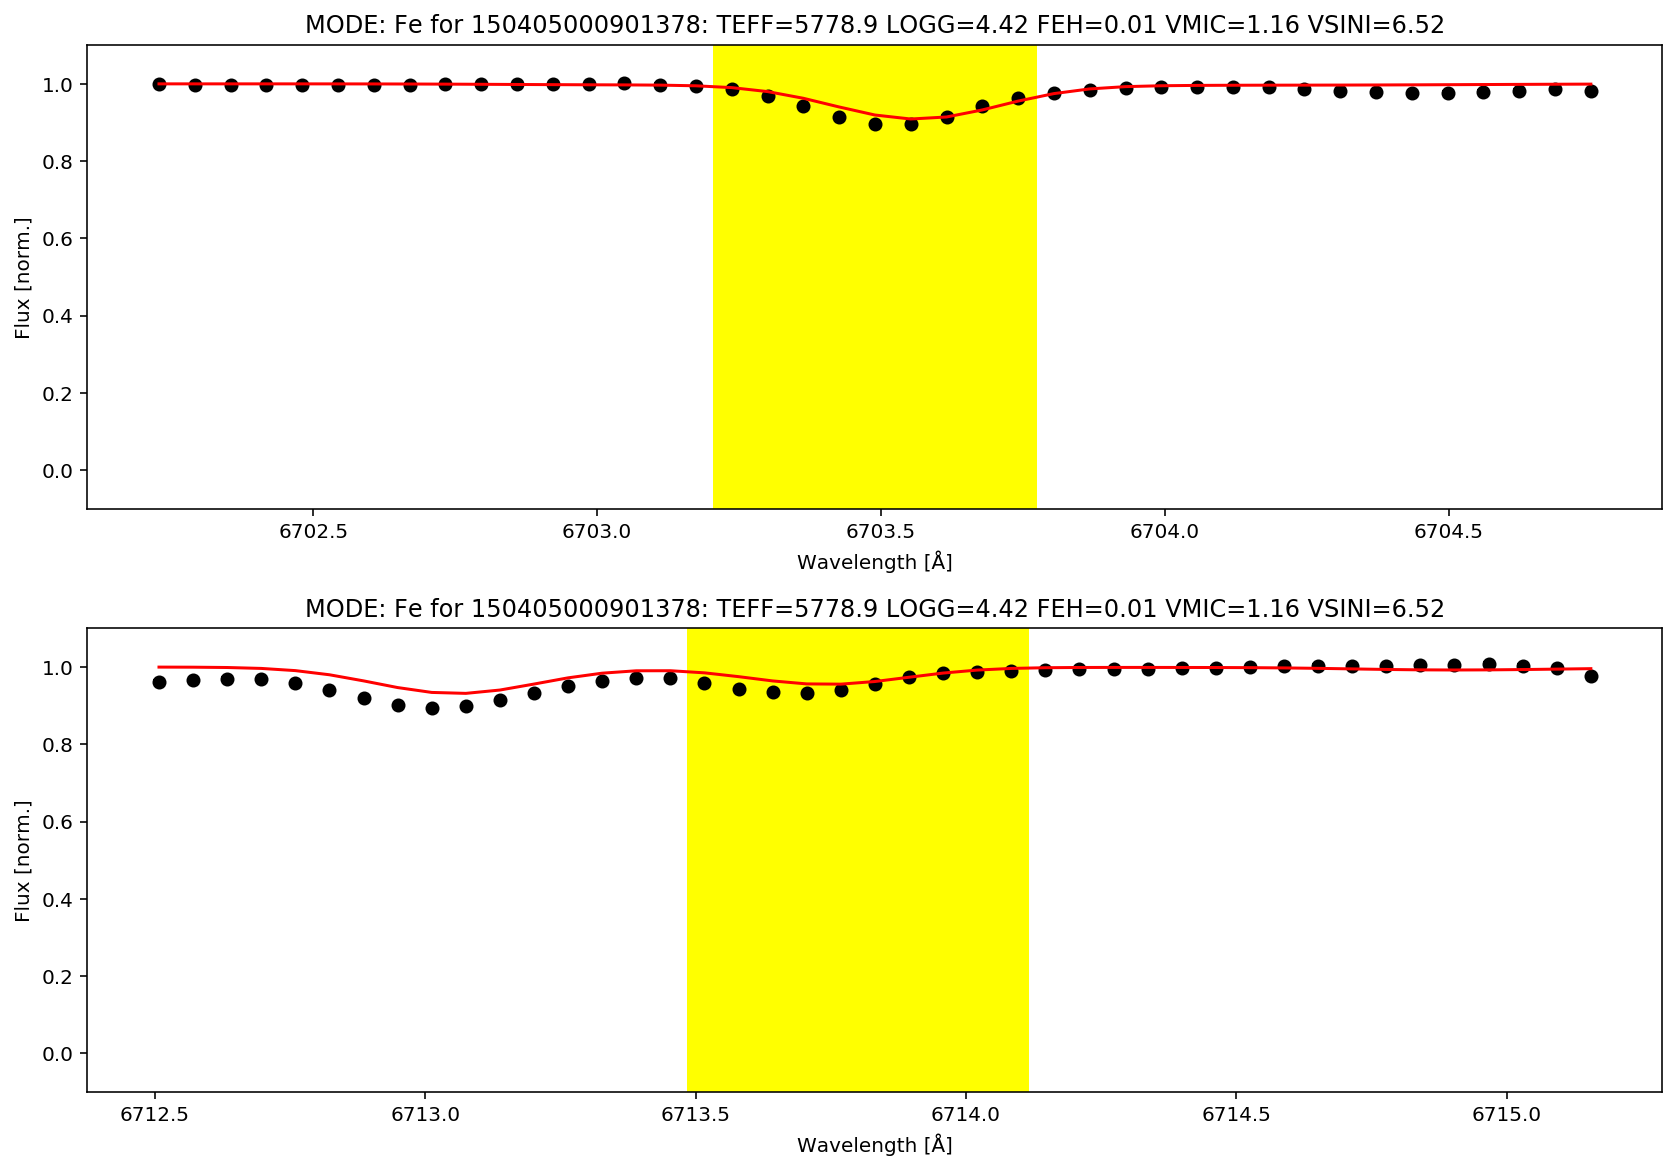

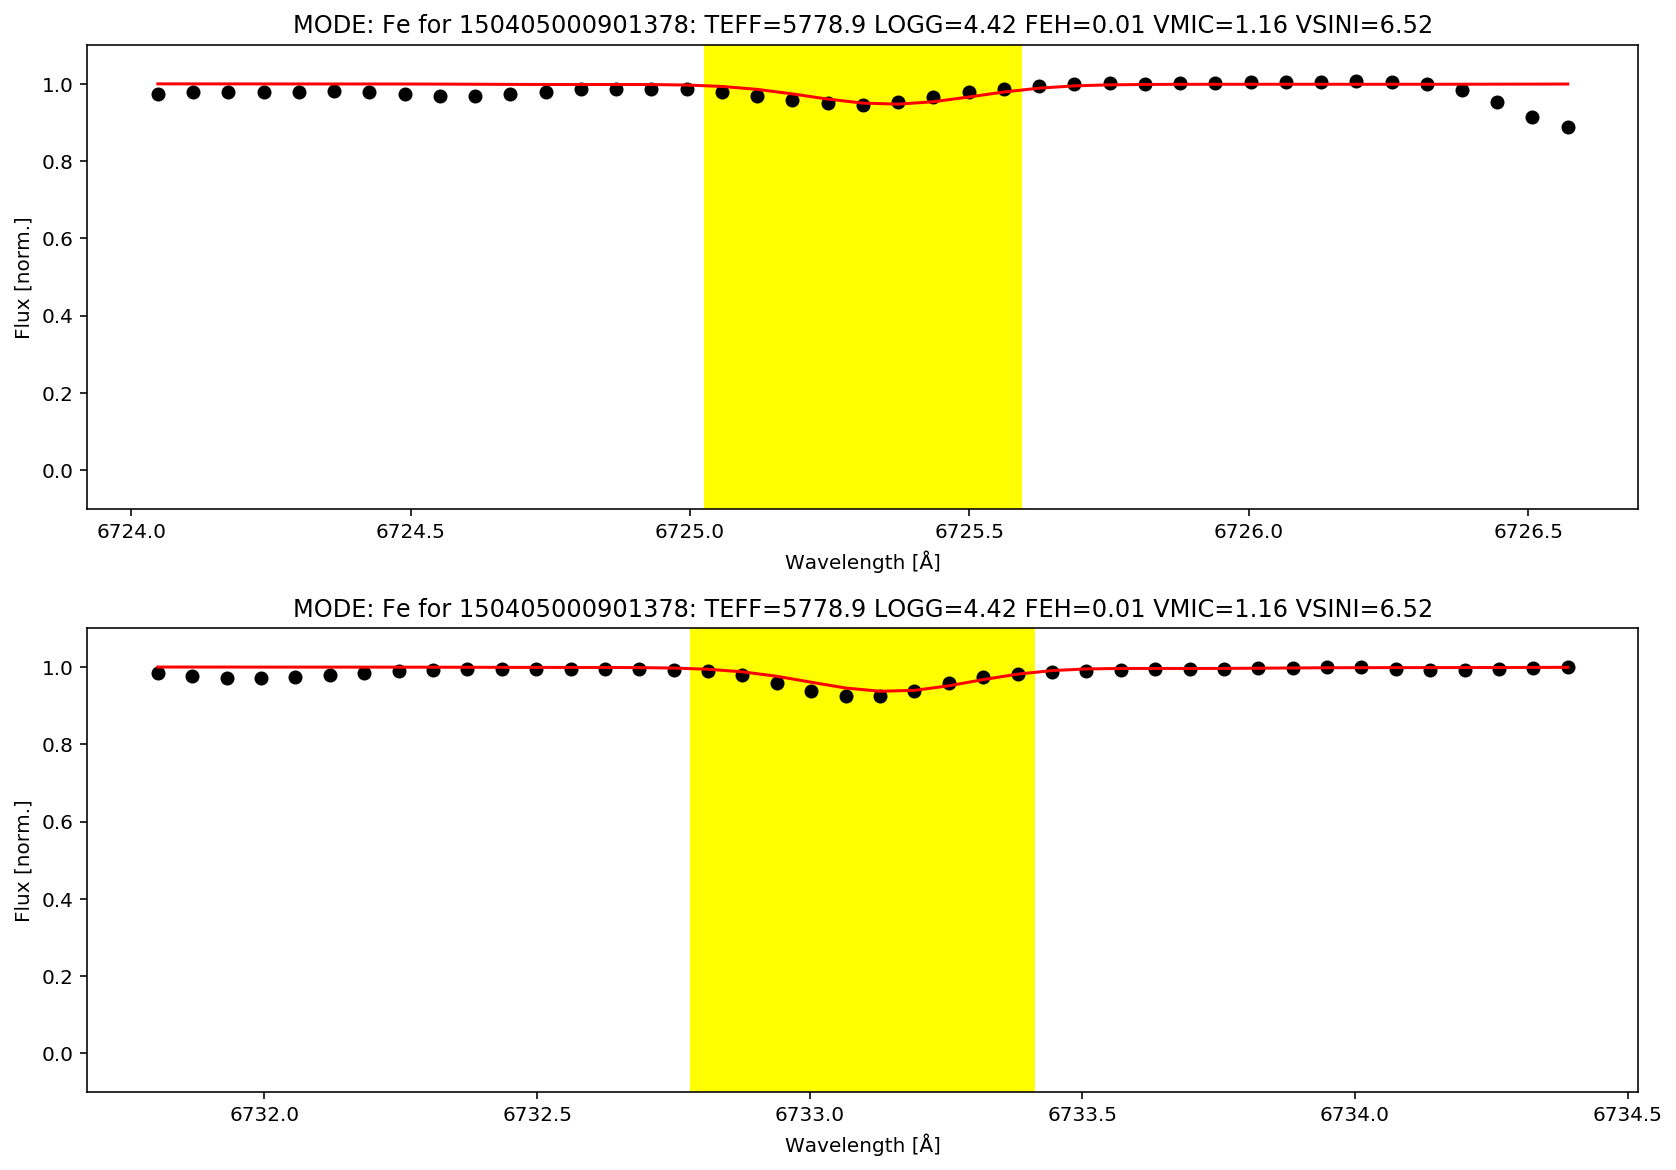

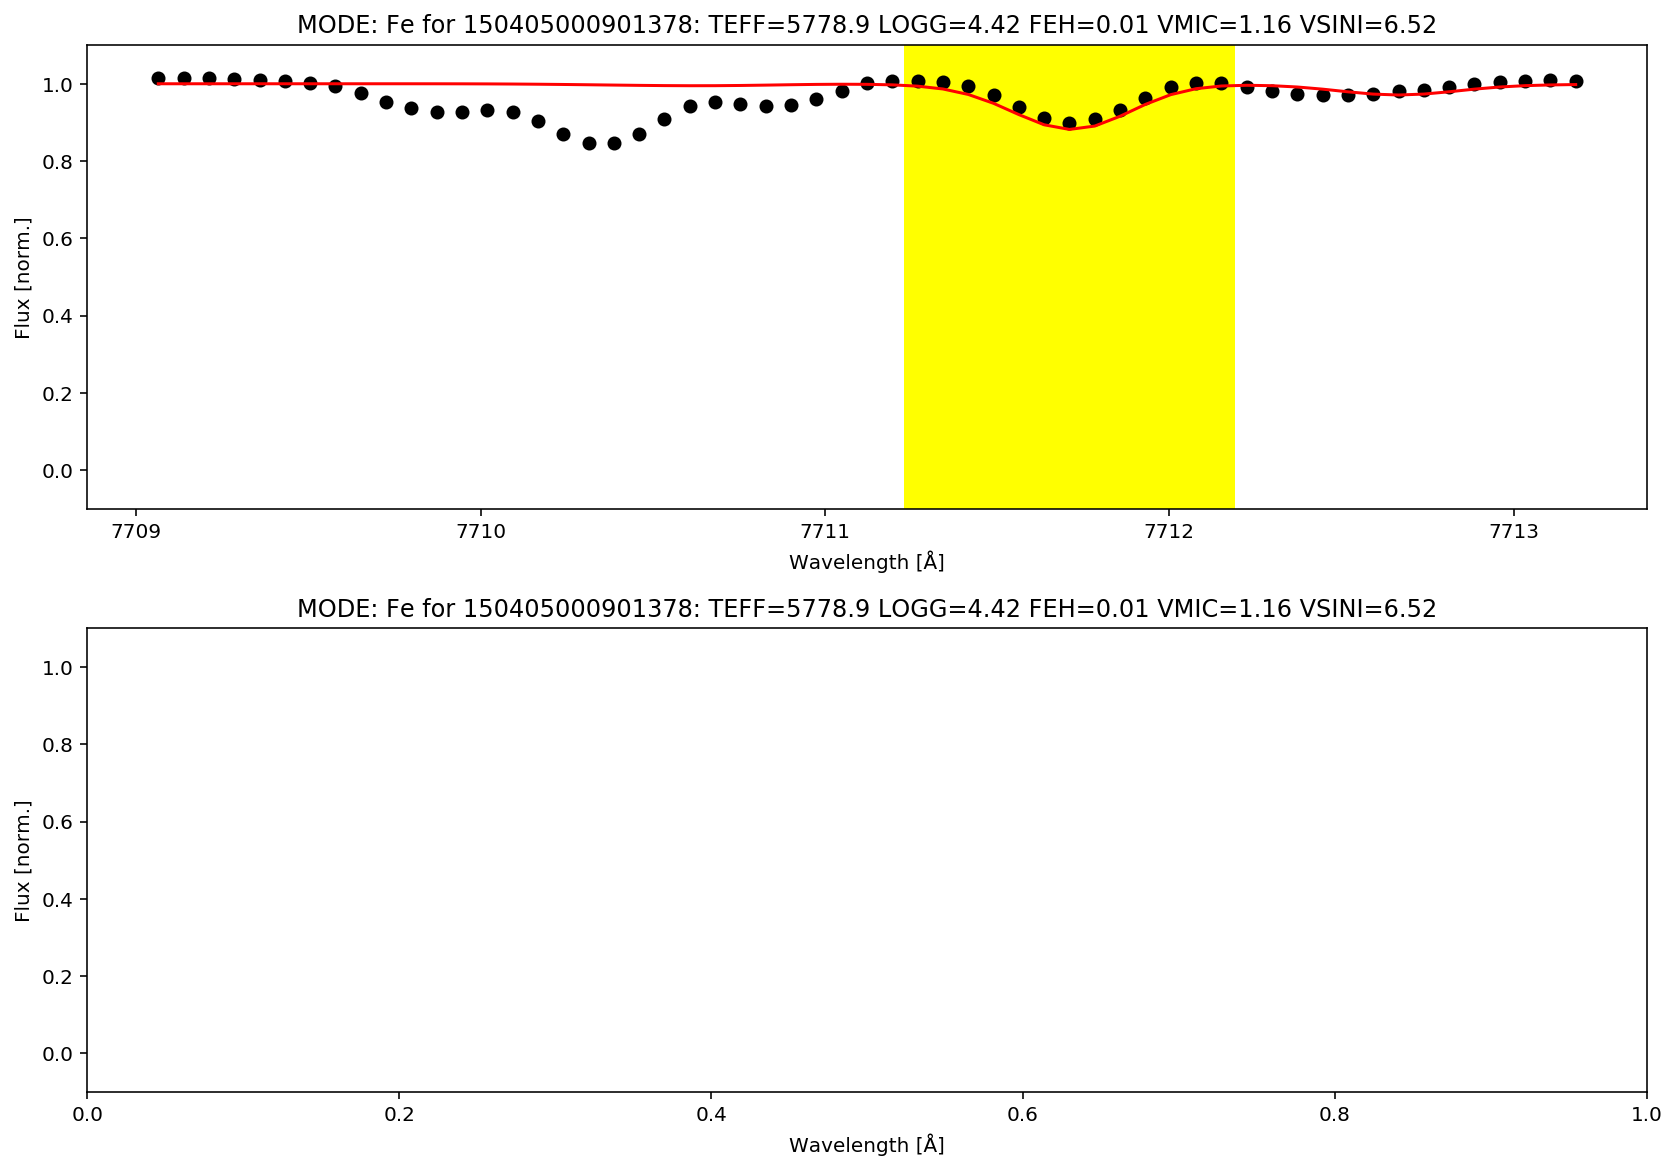

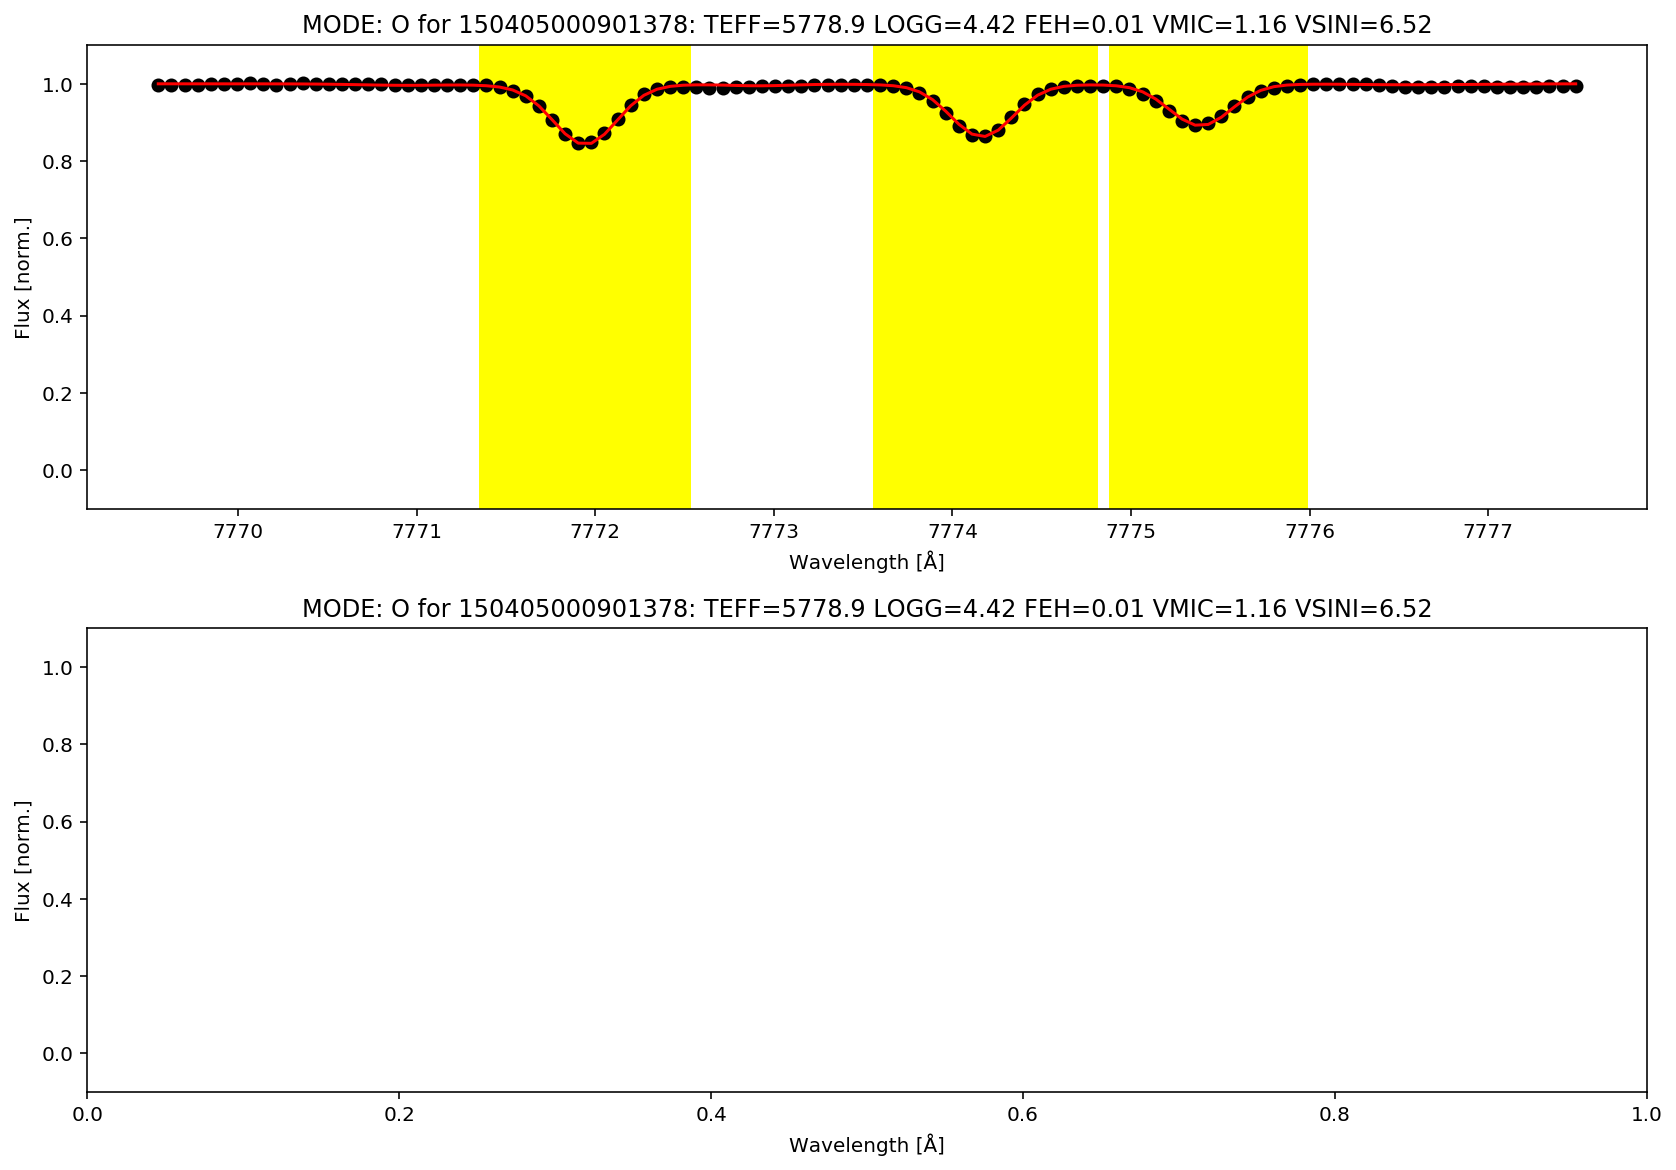

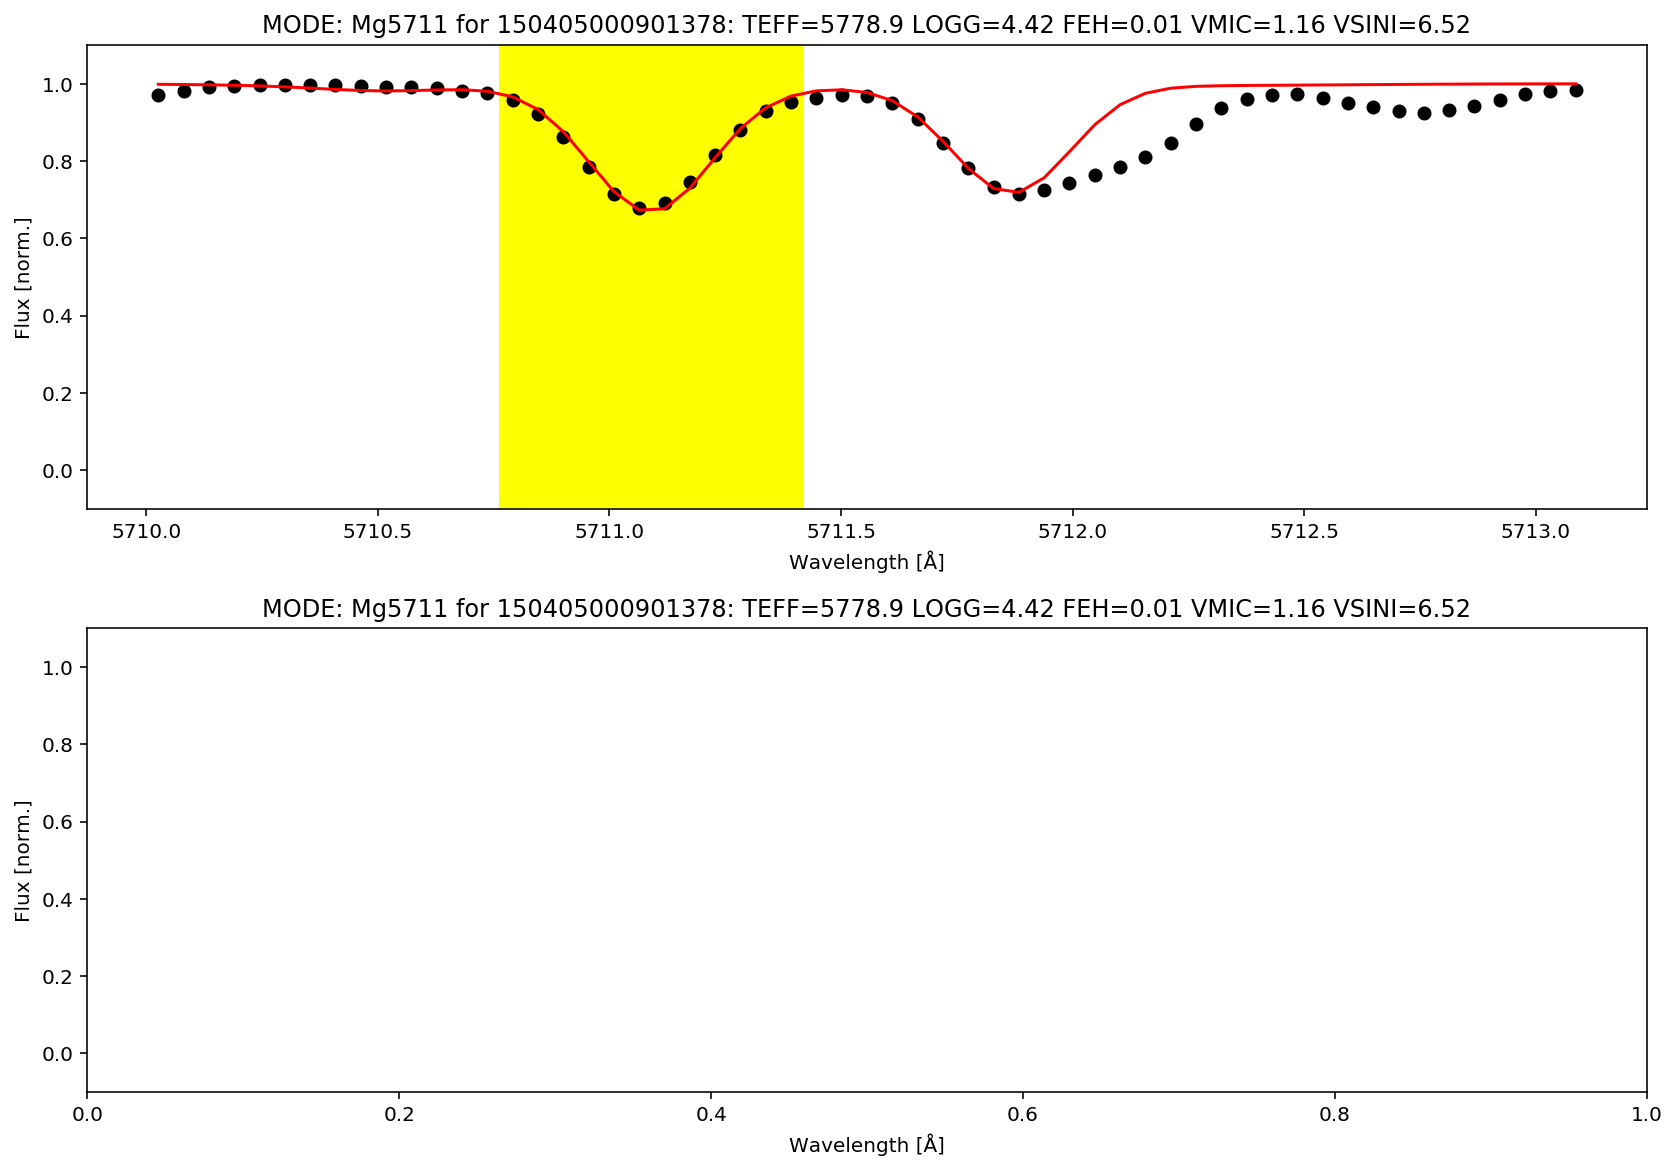

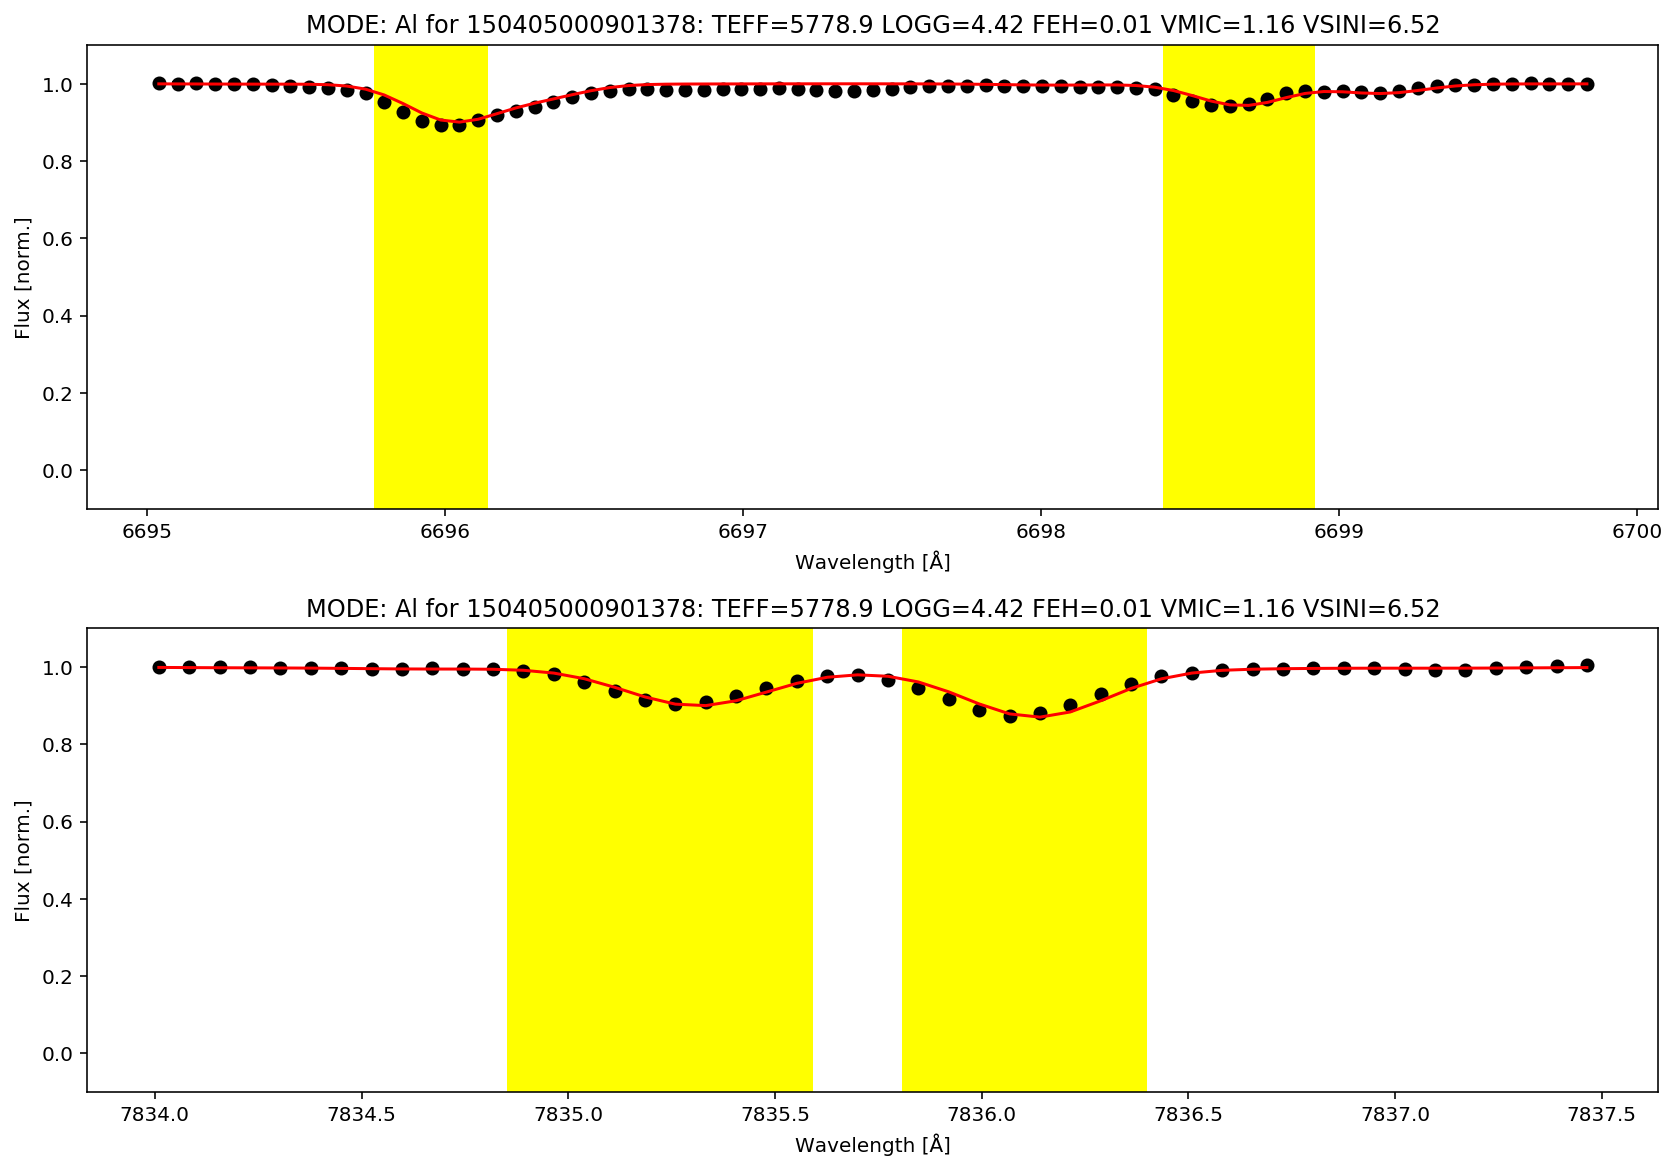

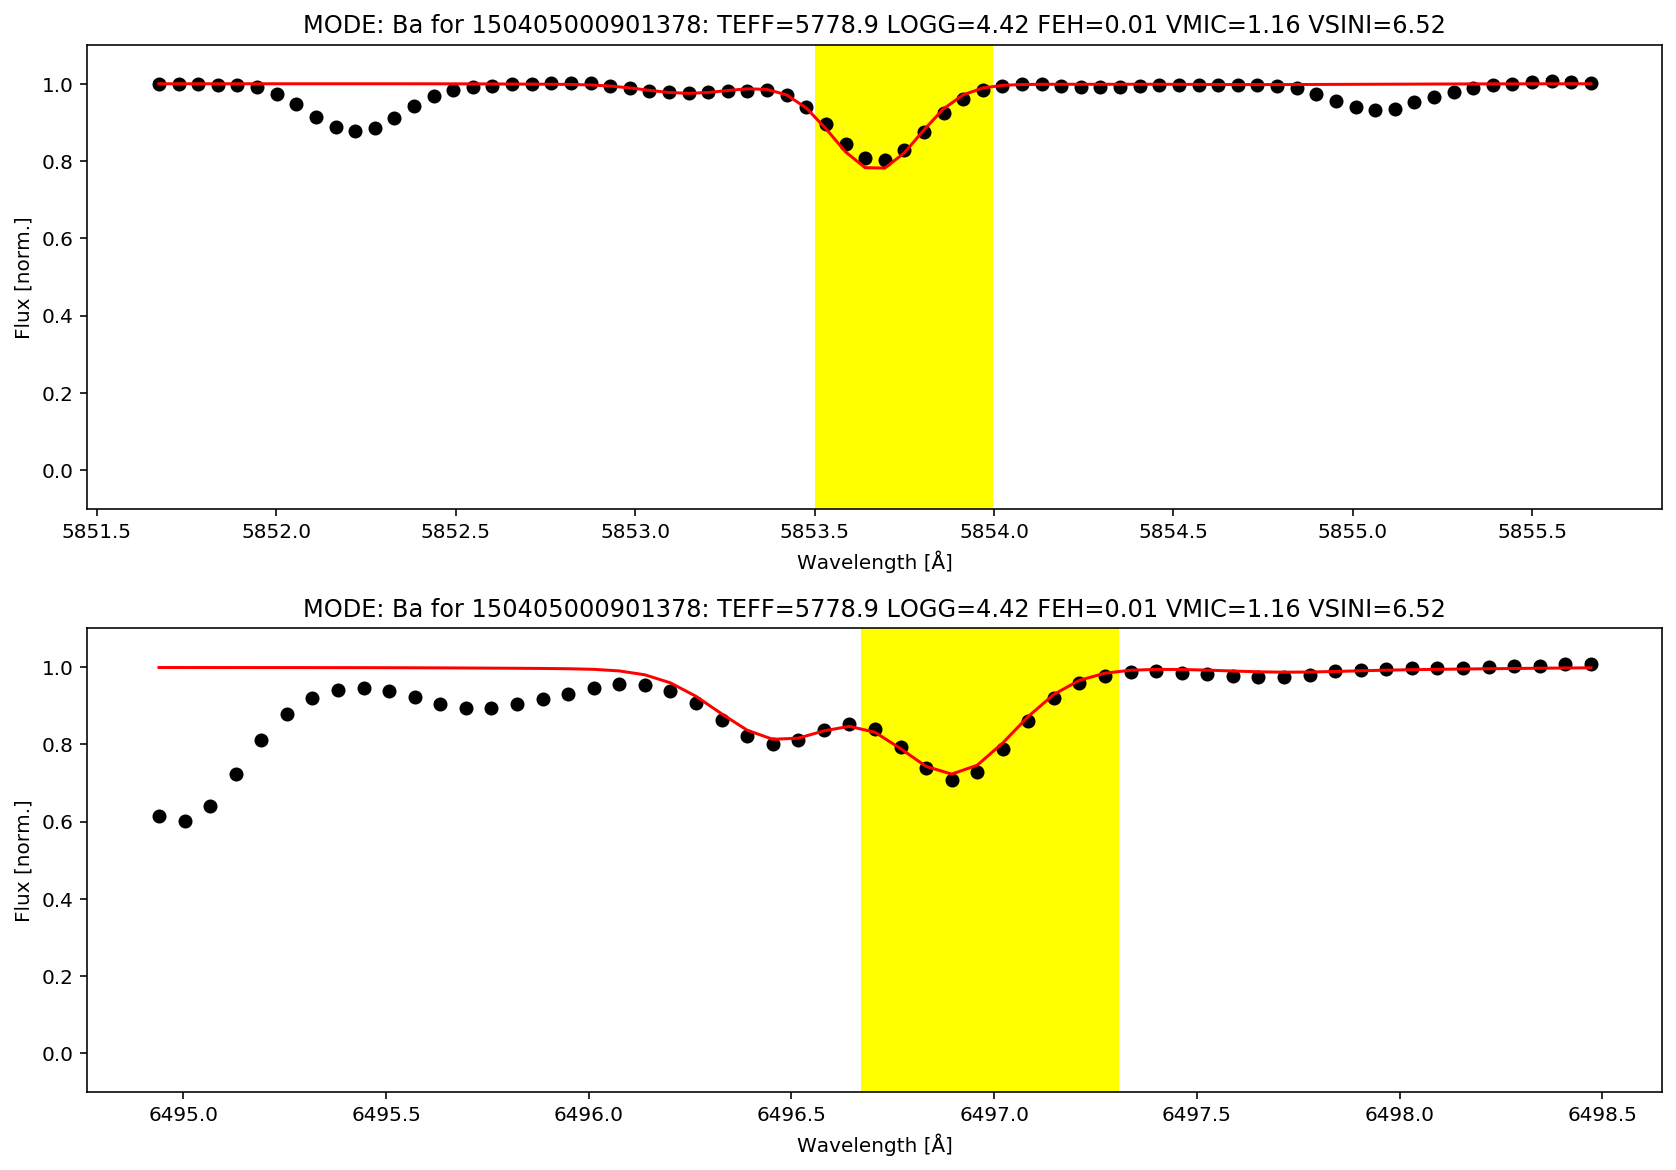

In [15]:
modes = ['Sp','Fe','O','Na','Mg5711','Al','Ba']

for each_mode in modes:

    for each_sobject_id in [
        150405000901378
        ]:

        plot_sme_results(sobject_id=each_sobject_id,mode=each_mode, directory='/Users/svenbuder/GALAH_DR3/tutorials/sme_output/')